<a href="https://colab.research.google.com/github/EiriniNBI/LA_CRDS_Water_Isotope/blob/main/Paper2024Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,335 kB]
Get:14 http://archive.ubuntu.

In [2]:
# Install LaTeX (if not already done)
!apt-get install texlive-fonts-recommended texlive-fonts-extra cm-super
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-cantarell fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core fonts-dejavu-extra
  fonts-droid-fallback fonts-ebgaramond fonts-ebgaramond-extra fonts-font-awesome
  fonts-freefont-otf fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go fonts-junicode fonts-lato
  fonts-linuxlibertine fonts-lmodern fonts-lobster fonts-lobstertwo fonts-noto-color-emoji
  fonts-noto-core fonts-noto-mono fonts-oflb-asana-math fonts-open-sans fonts-roboto-unhinted
  fonts-sil-charis fonts-sil-gentium fonts-sil-gentium-basic fonts-sil-gentiumplus
  fonts-sil-gentiumplus-compact fonts-stix fonts-texgyre fo

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/PhD/2023/DECEMBER/

/content/drive/MyDrive/PhD/2023/DECEMBER


In [5]:
import pandas as pd
import numpy as np
import os
import pytz
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import time
from matplotlib.dates import DateFormatter, HourLocator, MinuteLocator
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D  # Import Line2D for creating custom legend handles
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns  # Import Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter, MinuteLocator
import pytz
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter, MinuteLocator
import pytz
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.dates import DateFormatter, MinuteLocator
import seaborn as sns
import pytz

         DATE          TIME  FRAC_DAYS_SINCE_JAN1  FRAC_HRS_SINCE_JAN1  \
0  2023-12-04  14:30:24.933            337.646122          8103.506926   
1  2023-12-04  14:30:25.786            337.646132          8103.507163   
2  2023-12-04  14:30:26.640            337.646142          8103.507400   
3  2023-12-04  14:30:27.493            337.646152          8103.507637   
4  2023-12-04  14:30:28.346            337.646161          8103.507874   

   JULIAN_DAYS    EPOCH_TIME  ALARM_STATUS  INST_STATUS  CavityPressure  \
0   338.646122  1.701700e+09             0          963       50.001178   
1   338.646132  1.701700e+09             0          963       50.000008   
2   338.646142  1.701700e+09             0          963       49.998456   
3   338.646152  1.701700e+09             0          963       49.996175   
4   338.646161  1.701700e+09             0          963       49.997905   

   CavityTemp  ...   OutletValve  ValveMask          H2O  Delta_18_16  \
0   80.001327  ...  26305.23697

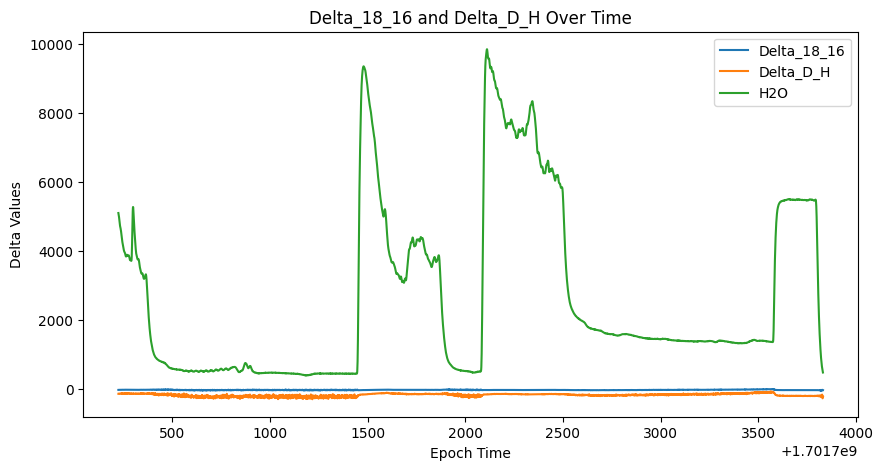

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data; adjust filepath as needed.
# If fixed width, use `pd.read_fwf` instead with appropriate `colspecs`.
filepath = 'LA/12/04/HIDS2383-20231204-143030Z-DataLog_User.dat' #'LA/12/04/HIDS2383-20231204-153036Z-DataLog_User.dat'
data = pd.read_csv(filepath, delim_whitespace=True, header=0)

# Check the first few rows to verify correct loading
print(data.head())

# Convert columns to appropriate data types, if necessary
data['EPOCH_TIME'] = pd.to_numeric(data['EPOCH_TIME'])
data['Delta_18_16'] = pd.to_numeric(data['Delta_18_16'], errors='coerce')  # errors='coerce' to handle non-numeric entries
data['Delta_D_H'] = pd.to_numeric(data['Delta_D_H'], errors='coerce')
data['H2O'] = pd.to_numeric(data['H2O'], errors='coerce')

# Check the data types after conversion
print(data.dtypes)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(data['EPOCH_TIME'], data['Delta_18_16'], label='Delta_18_16')
plt.plot(data['EPOCH_TIME'], data['Delta_D_H'], label='Delta_D_H')
plt.plot(data['EPOCH_TIME'], data['H2O'], label='H2O')
plt.xlabel('Epoch Time')
plt.ylabel('Delta Values')
plt.title('Delta_18_16 and Delta_D_H Over Time')
plt.legend()
plt.show()



In [7]:
data.index.duplicated().any()

False

In [8]:
a =  9940.401441616363
b =  5.3775421106368225e-06
c =  -1.047815565268003

d18Ooffset = a/data['H2O'] + b*data['H2O'] + c
d18Ocorrected = data['Delta_18_16'] - d18Ooffset
data['Delta_18_16_corrected'] =  d18Ocorrected

In [9]:

a= 35924.32299887402
b= -0.00018292625739172748
c= -1.7631697259701014
dDoffset = a/data['H2O'] + b*data['H2O'] + c
dDcorrected = data['Delta_D_H'] - dDoffset
data['Delta_D_H_corrected'] = dDcorrected

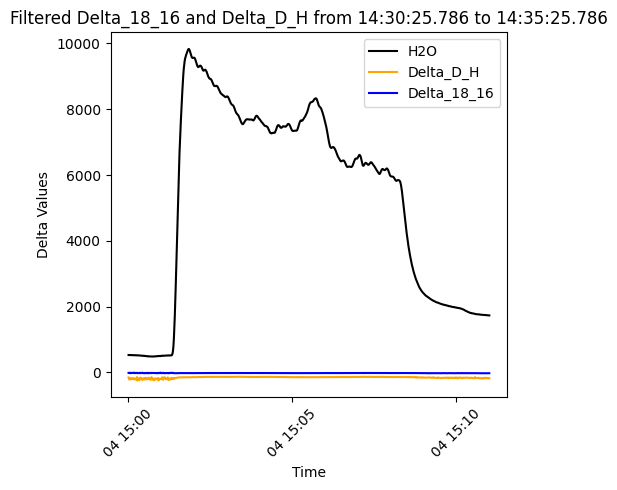

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Create a new 'datetime' column combining 'DATE' and 'TIME'
data['datetime'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])

# Define your specific time range
start_time = '2023-12-04 15:00:00.786'#15:50:00'#
end_time = '2023-12-04 15:11:00.786'#15:51:56'#


hline_start_time = '2023-12-04 15:02:00.786'#15:50:00'#
hline_end_time = '2023-12-04 15:08:00.786'#15:51:56'#
#'', '

# Filter data based on the datetime range
filtered_data = data[(data['datetime'] >= start_time) & (data['datetime'] <= end_time)]

# Plotting the filtered data for Delta_18_16 and Delta_D_H
plt.figure(figsize=(5, 5))
plt.plot(filtered_data['datetime'], filtered_data['H2O'], label='H2O', color='black')
plt.plot(filtered_data['datetime'], filtered_data['Delta_D_H'], label='Delta_D_H', color='orange')
plt.plot(filtered_data['datetime'], filtered_data['Delta_18_16'], label='Delta_18_16', color='blue')
plt.xlabel('Time')
plt.ylabel('Delta Values')
plt.title('Filtered Delta_18_16 and Delta_D_H from 14:30:25.786 to 14:35:25.786')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()


In [11]:

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "sans-serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "font.size": 14
}

In [12]:
# Enable LaTeX rendering and set sans-serif font
plt.rcParams.update({
    "text.usetex": True,

    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{mathptmx}',
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # This line can be adjusted or extended
    # "text.latex.preamble": r"\usepackage{sansmathfonts}",
    # "font.family": "sans-serif",
    # "font.sans-serif": ["Helvetica", "Arial", "DejaVu Sans"], # Specify a list of sans-serif fonts as fallback options
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "font.size": 14
})


In [15]:
filtered_data

,DATE,TIME,FRAC_DAYS_SINCE_JAN1,FRAC_HRS_SINCE_JAN1,JULIAN_DAYS,EPOCH_TIME,ALARM_STATUS,INST_STATUS,CavityPressure,CavityTemp,...,Delta_D_H,CH4,n2_flag,baseline_shift,slope_shift,residuals,Delta_18_16_corrected,Delta_D_H_corrected,datetime,seconds
2079,2023-12-04,15:00:00.176,337.666669,8104.000049,338.666669,1.701702e+09,2,963,50.002240,80.005949,...,-171.374513,-0.323289,1.0,329.398232,-1.244855,0.567072,-31.099991,-237.616976,2023-12-04 15:00:00.176,0.000
2080,2023-12-04,15:00:01.029,337.666679,8104.000286,338.666679,1.701702e+09,2,963,50.003355,80.006004,...,-153.999971,0.233514,1.0,327.329838,-3.114989,0.555002,-33.083486,-220.013594,2023-12-04 15:00:01.029,0.853
2081,2023-12-04,15:00:01.882,337.666688,8104.000523,338.666688,1.701702e+09,2,963,50.003475,80.006004,...,-194.964332,-0.044377,1.0,328.429599,-4.331921,0.654168,-29.796179,-261.382149,2023-12-04 15:00:01.882,1.706
2082,2023-12-04,15:00:02.736,337.666698,8104.000760,338.666698,1.701702e+09,2,963,50.001434,80.006004,...,-218.774599,1.812133,1.0,327.656258,-0.206647,0.463090,-34.284397,-284.926103,2023-12-04 15:00:02.736,2.560
2083,2023-12-04,15:00:03.589,337.666708,8104.000997,338.666708,1.701702e+09,2,963,49.998246,80.006004,...,-211.855930,0.923833,1.0,328.254242,-2.409459,0.694607,-28.106301,-278.354256,2023-12-04 15:00:03.589,3.413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2023-12-04,15:11:35.911,337.674721,8104.193309,338.674721,1.701703e+09,2,963,50.003271,80.003258,...,-170.533336,0.149199,1.0,334.821280,-0.115642,0.605564,-31.039612,-189.684867,2023-12-04 15:11:35.911,695.735
2895,2023-12-04,15:11:36.763,337.674731,8104.193546,338.674731,1.701703e+09,2,963,50.000420,80.003258,...,-180.778088,1.123879,1.0,334.075496,-1.616113,0.715096,-28.622640,-200.009151,2023-12-04 15:11:36.763,696.587
2896,2023-12-04,15:11:37.618,337.674741,8104.193783,338.674741,1.701703e+09,2,963,50.002813,80.003258,...,-173.690967,0.397419,1.0,334.313067,2.542435,0.507349,-28.668581,-192.975164,2023-12-04 15:11:37.618,697.442
2897,2023-12-04,15:11:38.470,337.674751,8104.194020,338.674751,1.701703e+09,2,963,50.003740,80.003258,...,-177.294895,-0.676004,1.0,334.246085,-0.022133,0.559317,-28.428549,-196.628226,2023-12-04 15:11:38.470,698.294


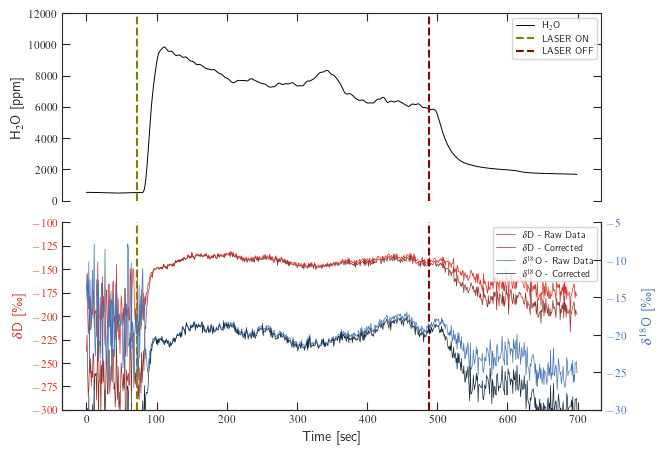

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert DATE and TIME to datetime
data['datetime'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])

sns.set_style("ticks")

# Define the specific time range and lines
start_time = '2023-12-04 15:00:00'
end_time = '2023-12-04 15:11:40'
hline_start_time = '2023-12-04 15:01:12'
hline_end_time = '2023-12-04 15:08:08'
segment_start_time = '2023-12-04 15:02:00'
segment_end_time = '2023-12-04 15:08:00'

# Convert times
segment_start_seconds = (pd.to_datetime(segment_start_time) - pd.to_datetime(start_time)).total_seconds()
segment_end_seconds = (pd.to_datetime(segment_end_time) - pd.to_datetime(start_time)).total_seconds()
hline_start_seconds = (pd.to_datetime(hline_start_time) - pd.to_datetime(start_time)).total_seconds()
hline_end_seconds = (pd.to_datetime(hline_end_time) - pd.to_datetime(start_time)).total_seconds()

# Filter data
filtered_data = data[(data['datetime'] >= start_time) & (data['datetime'] <= end_time)].copy()

# Convert 'datetime' to seconds from the start
filtered_data['seconds'] = (filtered_data['datetime'] - filtered_data['datetime'].iloc[0]).dt.total_seconds()


fig_width_cm = 17  # Reduce width to 90% of double column width
fig_height_cm = 23.3 * 0.5  # Reduce height to 90% of maximum height

# Convert cm to inches
fig_width_in = fig_width_cm / 2.54  # Convert cm to inches
fig_height_in = fig_height_cm / 2.54  # Convert cm to inches

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(fig_width_in, fig_height_in), sharex=True)

# Plot for H2O
ax1.plot(filtered_data['seconds'], filtered_data['H2O'], label=u'H$_{2}$O', color='black', linewidth=0.7)
ax1.set_ylim(0, 12000)
ax1.axvline(hline_start_seconds, color='olive', linestyle='--', label='LASER ON')
ax1.axvline(hline_end_seconds, color='darkred', linestyle='--', label='LASER OFF')
# ax1.axvspan(segment_start_seconds, segment_end_seconds, color='lavender', alpha=1.0, label='Analysis Segment')  # Remove transparency
# ax1.fill_betweenx([200, 11500], segment_start_seconds, segment_end_seconds, color='whitesmoke', label='Analysis Segment')

ax1.set_ylabel(u'H$_{2}$O [ppm]')
ax1.legend()

# Remove the top and right spines
ax1.spines['bottom'].set_visible(False)

# Move ticks to the inside
ax1.tick_params(direction='in', which='both', length=6, top=True, right=True, bottom=False)
ax1.legend(loc='upper right', fontsize='small', frameon=True)

# Plot for Delta values
ax2.plot(filtered_data['seconds'], filtered_data['Delta_D_H'], label=u'$\delta$D - Raw Data', color='#d73027', linewidth=0.5)
ax2.plot(filtered_data['seconds'], filtered_data['Delta_D_H_corrected'], label=u'$\delta$D - Corrected', color='#942E29', linewidth=0.5)


ax2.axvline(hline_start_seconds, color='olive', linestyle='--')
ax2.axvline(hline_end_seconds, color='darkred', linestyle='--')
# ax2.axvspan(segment_start_seconds, segment_end_seconds, color='lavender', alpha=1.0)  # Remove transparency
# ax2.fill_betweenx([-235, -120], segment_start_seconds, segment_end_seconds, color='whitesmoke')  # Remove transparency
ax2.set_xlabel('Time [sec]')
ax2.set_ylabel(u'$\delta$D [‰]', color='#d73027')
ax2.tick_params(axis='y', labelcolor='#d73027')

ax2.spines['top'].set_visible(False)

# Move ticks to the inside
ax2.tick_params(direction='in', which='both', length=6, top=False, right=True, bottom=True)
ax2.set_ylim(-300, -100)

# Twin axis for Delta_18_16
ax3 = ax2.twinx()
ax3.plot(filtered_data['seconds'], filtered_data['Delta_18_16'], label=u'$\delta^{18}$O - Raw Data', color='#4575b4', linewidth=0.5)
ax3.plot(filtered_data['seconds'], filtered_data['Delta_18_16_corrected'], label=u'$\delta^{18}$O - Corrected', color='#132a3d', linewidth=0.5)

ax3.set_ylabel(u'$\delta^{18}$O [‰]', color='#4575b4', labelpad=10)
ax3.tick_params(axis='y', labelcolor='#4575b4')

ax3.spines['top'].set_visible(False)

# Move ticks to the inside
ax3.tick_params(direction='in', which='both', length=6, top=False, right=True, bottom=True)
ax3.set_ylim(-30, -5)

# Gather all legend handles and labels
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize='small', frameon=True)

plt.tight_layout()
plt.savefig('allandata.eps', format='eps', bbox_inches='tight')
plt.show()


In [16]:
pip install allantools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.16.1
    Uninstalling Pygments-2.16.1:
      Successfully uninstalled Pygments-2.16.1
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour

In [14]:
# Ensure LaTeX text rendering and set the font to match your LaTeX document
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # Replace with your LaTeX document font
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'legend.fontsize': 6,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'font.size': 8
})

<ipython-input-20-45b4287c8020>:204: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.2)  # Ensure everything fits within the layout without overlap


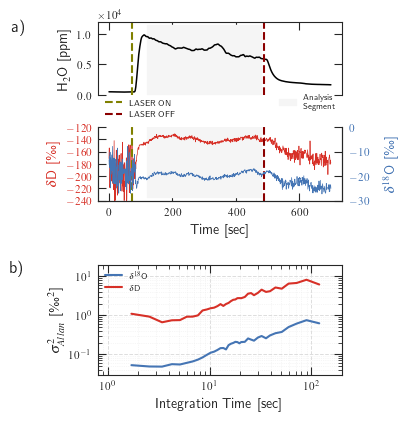

In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import allantools
from matplotlib.ticker import ScalarFormatter

# Convert DATE and TIME to datetime
data['datetime'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])

sns.set_style("ticks")

# Define the specific time range and lines
start_time = '2023-12-04 15:00:00'
end_time = '2023-12-04 15:11:40'
hline_start_time = '2023-12-04 15:01:12'
hline_end_time = '2023-12-04 15:08:08'
segment_start_time = '2023-12-04 15:02:00'
segment_end_time = '2023-12-04 15:08:00'

# Convert times
segment_start_seconds = (pd.to_datetime(segment_start_time) - pd.to_datetime(start_time)).total_seconds()
segment_end_seconds = (pd.to_datetime(segment_end_time) - pd.to_datetime(start_time)).total_seconds()
hline_start_seconds = (pd.to_datetime(hline_start_time) - pd.to_datetime(start_time)).total_seconds()
hline_end_seconds = (pd.to_datetime(hline_end_time) - pd.to_datetime(start_time)).total_seconds()

# Filter data
filtered_data = data[(data['datetime'] >= start_time) & (data['datetime'] <= end_time)].copy()

# Convert 'datetime' to seconds from the start
filtered_data['seconds'] = (filtered_data['datetime'] - filtered_data['datetime'].iloc[0]).dt.total_seconds()

# Plotting function for time series
def plot_time_series(ax1, ax2, ax3):
    ax1.plot(filtered_data['seconds'], filtered_data['H2O'], color='black', linewidth=1.1)
    ax1.set_ylim(0, 12000)
    ax1.axvline(hline_start_seconds, color='olive', linestyle='--')
    ax1.axvline(hline_end_seconds, color='darkred', linestyle='--')
    ax1.fill_betweenx([200, 11500], segment_start_seconds, segment_end_seconds, color='whitesmoke', label='Analysis\nSegment')
    ax1.set_ylabel(u'H$_{2}$O [ppm]')
    # ax1.legend(loc='upper right', fontsize='small', frameon=False, bbox_to_anchor=(1, 1), prop={'size': 6})

    ax1.spines['bottom'].set_visible(False)
    ax1.tick_params(direction='in', which='both', length=6, top=True, right=True, bottom=False, pad=5)
    ax1.set_xticklabels([])
      # Set y-axis to scientific notation
    ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    ax2.plot(filtered_data['seconds'], filtered_data['Delta_D_H'], color='#d73027', linewidth=0.5)
    ax2.axvline(hline_start_seconds, color='olive', linestyle='--', label='LASER ON')
    ax2.axvline(hline_end_seconds, color='darkred', linestyle='--', label='LASER OFF')
    ax2.fill_betweenx([-235, -110], segment_start_seconds, segment_end_seconds, color='whitesmoke', label='Analysis\nSegment')
    ax2.set_xlabel('Time [sec]')
    ax2.set_ylabel(u'$\delta$D [‰]', color='#d73027')
    ax2.tick_params(axis='y', labelcolor='#d73027')

    # Set y-limits explicitly after plotting

    ax2.spines['top'].set_visible(False)
    ax2.tick_params(direction='in', which='both', length=6, top=False, right=False, bottom=True, left=True, pad=5)
    ax2.set_ylim(-240, -120)  # Ensure ylim is set after all plotting commands

    ax2.set_yticks(np.linspace(-240, -120, num=7))  # This creates 7 evenly spaced ticks from -240 to -120
    # ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), frameon=False, fontsize='small', fancybox=True, shadow=True, ncol=5)


    ax3.plot(filtered_data['seconds'], filtered_data['Delta_18_16'], color='#4575b4', linewidth=0.5)
    ax3.set_ylabel(u'$\delta^{18}$O [‰]', color='#4575b4', labelpad=10)
    ax3.tick_params(axis='y', labelcolor='#4575b4')
    ax3.spines['top'].set_visible(False)
    ax3.tick_params(direction='in', which='both', length=6, top=False, right=True, bottom=True, left=False, pad=5)
    ax3.set_ylim(-30, -5)

    # lines, labels = ax2.get_legend_handles_labels()
    # lines2, labels2 = ax3.get_legend_handles_labels()
    # ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize='small', frameon=False)

# Function to compute Allan variance
# def compute_allan_variance(data, rate):
#     ti = 1 / rate
#     N = len(data)
#     allan_var_dict = {}
#     min_segments = 3  # Ensure at least three segments for reliability
#     for m in range(1, N // 2):
#         k = N // m
#         if k < 2 or m < min_segments:
#             continue
#         tau_m = k * ti
#         means = [np.mean(data[i * k:(i + 1) * k]) for i in range(m)]
#         squared_diffs = [(means[i + 1] - means[i])**2 for i in range(len(means) - 1)]
#         av = sum(squared_diffs) / (m - 1) if squared_diffs else 0
#         allan_var_dict[tau_m] = av

#     taus = sorted(allan_var_dict.keys())
#     avars = [allan_var_dict[tau] for tau in taus]
#     return np.array(taus), np.array(avars)


def compute_allan_variance(data, rate):
    ti = 1 / rate
    N = len(data)
    allan_var_dict = {}
    min_segments = 3  # Ensure at least three segments for reliability
    # Loop over different numbers of segments m
    for m in range(1, N):
        k = N // m  # Number of data points in each segment
        if k < 2 or m < min_segments:  # At least two data points per segment are needed to compute a mean
            continue
        # Compute mean values of segments
        means = [np.mean(data[i * k:(i + 1) * k]) for i in range(m)]
        # Compute squared differences of consecutive mean values
        squared_diffs = [(means[i + 1] - means[i])**2 for i in range(len(means) - 1)] #l
        # Calculate Allan variance for this number of segments
        if squared_diffs:
            allan_var = sum(squared_diffs) / (2 * m)  # Use 2m as in the equation
            tau_m = k * ti  # Integration time for this m
            allan_var_dict[tau_m] = allan_var

    # Extract sorted taus and corresponding Allan variances
    taus = sorted(allan_var_dict.keys())
    avars = [allan_var_dict[tau] for tau in taus]
    return np.array(taus), np.array(avars)

# Function to plot Allan variance
def plot_allan_variance(ax):
    method = 'custom'  # or 'allantools'
    plot_style = 'line'  # or 'marker'
    df = data[(data['datetime'] >= segment_start_time) & (data['datetime'] <= segment_end_time)]
    rate = 1.0 / np.diff(df['EPOCH_TIME']).mean()


    # # Interpolation step

    uniform_time_grid = np.arange(df['datetime'].min(), df['datetime'].max(), step=np.timedelta64(int(1/rate*1e9), 'ns'))
    df_interp = pd.DataFrame()
    df_interp['datetime'] = pd.to_datetime(uniform_time_grid)
    df_interp['Delta_18_16'] = np.interp(uniform_time_grid.astype(np.int64), df['datetime'].astype(np.int64), df['Delta_18_16'])
    df_interp['Delta_D_H'] = np.interp(uniform_time_grid.astype(np.int64), df['datetime'].astype(np.int64), df['Delta_D_H'])


    if method == 'custom':
        taus_O, avars_O = compute_allan_variance(df_interp['Delta_18_16'].to_numpy(), rate)
        taus_D, avars_D = compute_allan_variance(df_interp['Delta_D_H'].to_numpy(), rate)
    else:
        (taus_O, avars_O, _, _) = allantools.avar(df_interp['Delta_18_16'].to_numpy(), rate=rate, data_type='freq')
        (taus_D, avars_D, _, _) = allantools.avar(df_interp['Delta_D_H'].to_numpy(), rate=rate, data_type='freq')

    if plot_style == 'line':
        ax.plot(taus_O, avars_O, label=u'$\delta^{18}$O', color='#4575b4', linestyle='-')
        ax.plot(taus_D, avars_D, label=u'$\delta$D', color='#d73027', linestyle='-')
    else:
        ax.loglog(taus_O, avars_O, label=u'$\delta^{18}$O', color='#4575b4', marker='o', linestyle='-')
        ax.loglog(taus_D, avars_D, label=u'$\delta$D', color='#d73027', marker='x', linestyle='--')



    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'Integration Time [sec]')
    ax.set_ylabel(r'$\sigma^2_{Allan}$ [‰$^2$]')
    plt.ylim(3*10**-2, 2*10**1)  # Adjust the y-axis limits
    plt.xlim(0.8, 2*100)
    ax.legend(frameon=False)
    ax.grid(True, which="both", ls="--")

    # Move ticks to the inside
    ax.tick_params(axis='both', which='major', direction='in', length=6, top=True, right=True, bottom=True, left=True, pad=5)
    ax.tick_params(axis='both', which='minor', direction='in', length=3, top=True, right=True, bottom=True, left=True)
    ax.minorticks_on()
    ax.grid(which='major', color='#DDDDDD', linewidth=0.7)
    ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)




fig_width_cm = 8  # Reduce width to 90% of double column width
fig_height_cm = 23.3 * 0.5  # Reduce height to 90% of maximum height

# Convert cm to inches
fig_width_in = fig_width_cm / 2.54  # Convert cm to inches
fig_height_in = fig_height_cm / 2.54  # Convert cm to inches

fig = plt.figure(figsize=(fig_width_in, fig_height_in))
gs = fig.add_gridspec(4, 1, height_ratios=[1, 1, 0.0001, 1.5], hspace=0.5)  # Adjust these ratios for plot spacing

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = ax2.twinx()
ax3.set_ylim(-30, -5)
ax4 = fig.add_subplot(gs[3, 0])

# Apply plot functions
plot_time_series(ax1, ax2, ax3)
ax3.set_ylim(-30, 0)  # Set limits after plotting to ensure they are not overridden

plot_allan_variance(ax4)
ax1.text(-0.3, 1.05, 'a)', transform=ax1.transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
ax4.text(-0.3, 1.05, 'b)', transform=ax4.transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
leg = ax2.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand",  ncol=2,fontsize='small' ,frameon=False, prop={'size': 6})

# Adjust plot settings
plt.subplots_adjust(hspace=0.01)  # Fine-tune the spacing between plots
plt.tight_layout(pad=0.2)  # Ensure everything fits within the layout without overlap

# Save the plot with high resolution suitable for publication
plt.savefig('allan_plot.tiff', format='tiff', dpi=600, bbox_inches='tight')
plt.savefig('allan_plot.eps', format='eps', dpi=600, bbox_inches='tight')

plt.show()




In [185]:
data

,DATE,TIME,FRAC_DAYS_SINCE_JAN1,FRAC_HRS_SINCE_JAN1,JULIAN_DAYS,EPOCH_TIME,ALARM_STATUS,INST_STATUS,CavityPressure,CavityTemp,...,ValveMask,H2O,Delta_18_16,Delta_D_H,CH4,n2_flag,baseline_shift,slope_shift,residuals,datetime
0,2023-12-04,14:30:24.933,337.646122,8103.506926,338.646122,1.701700e+09,0,963,50.001178,80.001327,...,0.0,5098.064006,-16.942232,-130.629474,0.223627,1.0,359.754603,3.499498,0.845825,2023-12-04 14:30:24.933
1,2023-12-04,14:30:25.786,337.646132,8103.507163,338.646132,1.701700e+09,0,963,50.000008,80.001274,...,0.0,5070.696537,-15.815474,-132.398857,1.491196,1.0,359.196270,3.506086,1.209118,2023-12-04 14:30:25.786
2,2023-12-04,14:30:26.640,337.646142,8103.507400,338.646142,1.701700e+09,0,963,49.998456,80.001274,...,0.0,5047.012301,-16.003473,-129.660632,-0.013243,1.0,360.484335,2.548429,0.900295,2023-12-04 14:30:26.640
3,2023-12-04,14:30:27.493,337.646152,8103.507637,338.646152,1.701700e+09,0,963,49.996175,80.001274,...,0.0,5015.800800,-15.814848,-128.344291,0.660832,1.0,358.656920,2.670290,0.928666,2023-12-04 14:30:27.493
4,2023-12-04,14:30:28.346,337.646161,8103.507874,338.646161,1.701700e+09,0,963,49.997905,80.001274,...,0.0,4976.893490,-15.907162,-128.227468,1.438331,1.0,359.409867,1.429297,0.823887,2023-12-04 14:30:28.346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217,2023-12-04,15:30:26.599,337.687808,8104.507389,338.687808,1.701704e+09,2,963,50.001399,79.996513,...,0.0,591.803869,-26.003915,-185.142886,0.902590,1.0,327.914871,-3.084109,0.542057,2023-12-04 15:30:26.599
4218,2023-12-04,15:30:27.454,337.687818,8104.507626,338.687818,1.701704e+09,2,963,50.001838,79.996513,...,0.0,555.113515,-15.158881,-216.319033,2.008904,1.0,327.741925,-1.309175,0.439573,2023-12-04 15:30:27.454
4219,2023-12-04,15:30:28.308,337.687828,8104.507863,338.687828,1.701704e+09,2,963,50.000292,79.996513,...,0.0,530.623497,-19.010198,-260.247010,1.730654,1.0,327.684770,-0.321642,0.488117,2023-12-04 15:30:28.308
4220,2023-12-04,15:30:29.161,337.687838,8104.508101,338.687838,1.701704e+09,2,963,50.001044,79.996513,...,0.0,506.341401,-18.353966,-199.820100,0.322280,1.0,327.893237,-1.888761,0.647732,2023-12-04 15:30:29.161


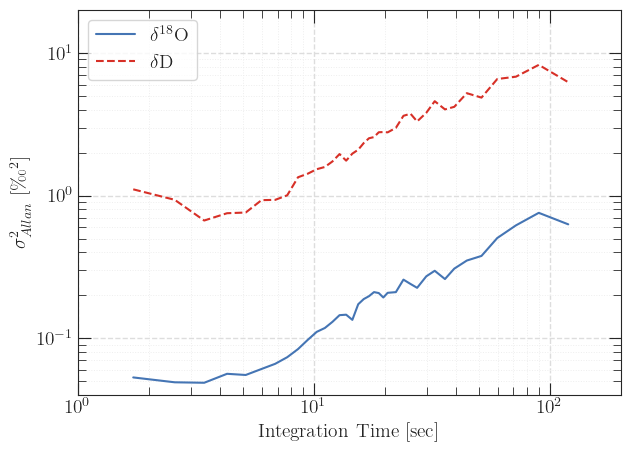

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import allantools

# Ensure LaTeX text rendering and set the font to match your LaTeX document
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # Replace with your LaTeX document font
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.size': 14
})

def set_common_ticks(ax, right=False):
    ax.tick_params(axis='both', which='major', direction='in', length=6, right=right, top=True, bottom=True)
    ax.tick_params(axis='both', which='minor', direction='in', length=3, right=right, top=True, bottom=True)
    ax.minorticks_on()
    ax.grid(which='major', color='#DDDDDD', linewidth=1)
    ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)

# def compute_allan_variance(data, rate):
#     ti = 1 / rate
#     N = len(data)
#     allan_var_dict = {}
#     min_segments = 3  # Ensure at least three segments for reliability
#     for m in range(1, N):
#         k = N // m
#         if k < 2 or m < min_segments:
#             continue
#         tau_m = k * ti
#         means = [np.mean(data[i * k:(i + 1) * k]) for i in range(m)]
#         squared_diffs = [(means[i + 1] - means[i])**2 for i in range(len(means) - 1)]
#         av = sum(squared_diffs) / (m-1) if squared_diffs else 0

#         allan_var_dict[tau_m] = av

#     taus = sorted(allan_var_dict.keys())
#     avars = [allan_var_dict[tau] for tau in taus]
#     return np.array(taus), np.array(avars)

def compute_allan_variance(data, rate):
    ti = 1 / rate
    N = len(data)
    allan_var_dict = {}
    min_segments = 3  # Ensure at least three segments for reliability
    # Loop over different numbers of segments m
    for m in range(1, N):
        k = N // m  # Number of data points in each segment
        if k < 2 or m < min_segments:  # At least two data points per segment are needed to compute a mean
            continue
        # Compute mean values of segments
        means = [np.mean(data[i * k:(i + 1) * k]) for i in range(m)]
        # Compute squared differences of consecutive mean values
        squared_diffs = [(means[i + 1] - means[i])**2 for i in range(len(means) - 1)]
        # Calculate Allan variance for this number of segments
        if squared_diffs:
            allan_var = sum(squared_diffs) / (2 * m)  # Use 2m as in the equation
            tau_m = k * ti  # Integration time for this m
            allan_var_dict[tau_m] = allan_var

    # Extract sorted taus and corresponding Allan variances
    taus = sorted(allan_var_dict.keys())
    avars = [allan_var_dict[tau] for tau in taus]
    return np.array(taus), np.array(avars)


# Assume 'data' and 'segment_start_time', 'segment_end_time' are defined
data['datetime'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])
segment_start_time = '2023-12-04 15:02:00'
segment_end_time = '2023-12-04 15:08:00'

df = data[(data['datetime'] >= segment_start_time) & (data['datetime'] <= segment_end_time)]

# Interpolation step
rate = 1/np.diff(df['EPOCH_TIME']).mean()
uniform_time_grid = np.arange(df['datetime'].min(), df['datetime'].max(), step=np.timedelta64(int(1/rate*1e9), 'ns'))

df_interp = pd.DataFrame()
df_interp['datetime'] = pd.to_datetime(uniform_time_grid)
df_interp['Delta_18_16'] = np.interp(uniform_time_grid.astype(np.int64), df['datetime'].astype(np.int64), df['Delta_18_16'])
df_interp['Delta_D_H'] = np.interp(uniform_time_grid.astype(np.int64), df['datetime'].astype(np.int64), df['Delta_D_H'])



# User selection for method and plotting style
method = 'custom'  # or 'allantools'
plot_style = 'line'  # or 'marker'



if method == 'custom':
    taus_O, avars_O = compute_allan_variance(df_interp['Delta_18_16'].to_numpy(), rate)
    taus_D, avars_D = compute_allan_variance(df_interp['Delta_D_H'].to_numpy(), rate)
else:
    (taus_O, avars_O, _, _) = allantools.avar(df_interp['Delta_18_16'].to_numpy(), rate=rate, data_type='freq')
    (taus_D, avars_D, _, _) = allantools.avar(df_interp['Delta_D_H'].to_numpy(), rate=rate, data_type='freq')

allan_dev_O = np.sqrt(avars_O)
allan_dev_D = np.sqrt(avars_D)
# Plotting configuration
plt.figure(figsize=(7, 5))
if plot_style == 'line':
    plt.plot(taus_O, avars_O, label=u'$\delta^{18}$O', color='#4575b4', linestyle='-')
    plt.plot(taus_D, avars_D, label=u'$\delta$D', color='#d73027', linestyle='--')
else:
    plt.loglog(taus_O, avars_O, label=u'$\delta^{18}$O', color='#4575b4', marker='o', linestyle='-')
    plt.loglog(taus_D, avars_D, label=u'$\delta$D', color='#d73027', marker='x', linestyle='--')

set_common_ticks(plt.gca())

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Integration Time [sec]')
plt.ylabel(r'$\sigma^2_{Allan}$ [‰$^2$]')
plt.xlim(1, 2*100)  # Adjust the y-axis limits

plt.ylim(4*10**-2, 2*10**1)  # Adjust the y-axis limits
plt.legend()
plt.grid(True, which="both", ls="--")

# Move ticks to the inside
plt.tick_params(axis='both', which='major', direction='in', length=9, top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='minor', direction='in', length=6, top=True, right=True, bottom=True, left=True)
plt.minorticks_on()
plt.grid(which='major', color='#DDDDDD', linewidth=1)
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)

# Save the plot
# plt.savefig('allan.eps', format='eps', bbox_inches='tight')

plt.show()


In [70]:
print(df['EPOCH_TIME'].head())



2220    1.701702e+09
2221    1.701702e+09
2222    1.701702e+09
2223    1.701702e+09
2224    1.701702e+09
Name: EPOCH_TIME, dtype: float64


In [69]:
df['EPOCH_TIME']

2220    1.701702e+09
2221    1.701702e+09
2222    1.701702e+09
2223    1.701702e+09
2224    1.701702e+09
            ...     
2637    1.701702e+09
2638    1.701702e+09
2639    1.701702e+09
2640    1.701702e+09
2641    1.701702e+09
Name: EPOCH_TIME, Length: 422, dtype: float64

In [74]:
# import numpy as np

# # Convert your list of unique times into a NumPy array if it's not already one
# times = df['EPOCH_TIME'].unique()

# # Calculate differences between consecutive timestamps
# time_diffs = np.diff(times)

# # Calculate the mean time difference
# mean_time_diff = np.mean(time_diffs)

# # Calculate the sampling rate (assuming the times are in seconds)
# rate = 1 / mean_time_diff

# print("Mean time difference:", mean_time_diff, "seconds")
# print("Calculated sampling rate:", rate, "Hz")

In [75]:
# time_diffs = np.diff(df['EPOCH_TIME'].drop_duplicates())  # Ensure duplicates are removed before calculation
# if len(time_diffs) > 0:
#     rate = 1 / np.mean(time_diffs)
#     print("Calculated sampling rate:", rate, "Hz")
# else:
#     print("No valid time differences to calculate rate.")


In [76]:
# # Check unique timestamp values
# unique_timestamps = np.unique(times)
# print("Unique timestamps:", unique_timestamps)
# print("Number of unique timestamps:", len(unique_timestamps))


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import allantools

# Ensure LaTeX text rendering and set the font to match your LaTeX document
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # Replace with your LaTeX document font
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.size': 14
})

def set_common_ticks(ax, right=False):
    ax.tick_params(axis='both', which='major', direction='in', length=6, right=right, top=True, bottom=True)
    ax.tick_params(axis='both', which='minor', direction='in', length=3, right=right, top=True, bottom=True)
    ax.minorticks_on()
    ax.grid(which='major', color='#DDDDDD', linewidth=1)
    ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)

# Assume 'data' and 'segment_start_time', 'segment_end_time' are defined
data['datetime'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])
segment_start_time = '2023-12-04 15:02:00'
segment_end_time = '2023-12-04 15:08:00'

df = data[(data['datetime'] >= segment_start_time) & (data['datetime'] <= segment_end_time)]

def compute_allan_variance(data, rate):
    ti = 1 / rate
    N = len(data)
    allan_var_dict = {}
    min_segments = 3  # Ensure at least three segments for reliability
    for m in range(1, N // 2):
        k = N // m
        if k < 2 or m < min_segments:
            continue
        tau_m = k * ti
        means = [np.mean(data[i * k:(i + 1) * k]) for i in range(m)]
        squared_diffs = [(means[i + 1] - means[i])**2 for i in range(len(means) - 1)]
        av = sum(squared_diffs) / (m - 1) if squared_diffs else 0
        allan_var_dict[tau_m] = av

    taus = sorted(allan_var_dict.keys())
    avars = [allan_var_dict[tau] for tau in taus]
    return np.array(taus), np.array(avars)

# User selection for method and plotting style
method = 'custom'  # or 'allantools'
plot_style = 'line'  # or 'marker'

rate = 1.0 / np.diff(df['EPOCH_TIME']).mean()
if method == 'custom':
    taus_O, avars_O = compute_allan_variance(df['Delta_18_16'].to_numpy(), rate)
    taus_D, avars_D = compute_allan_variance(df['Delta_D_H'].to_numpy(), rate)
else:
    (taus_O, avars_O, _, _) = allantools.avar(df['Delta_18_16'].to_numpy(), rate=rate, data_type='freq')
    (taus_D, avars_D, _, _) = allantools.avar(df['Delta_D_H'].to_numpy(), rate=rate, data_type='freq')

# Plotting configuration
plt.figure(figsize=(7, 5))
if plot_style == 'line':
    plt.plot(taus_O, avars_O, label=u'$\delta^{18}$O', color='#4575b4', linestyle='-')
    plt.plot(taus_D, avars_D, label=u'$\delta$D', color='#d73027', linestyle='--')
else:
    plt.loglog(taus_O, avars_O, label=u'$\delta^{18}$O', color='#4575b4', marker='o', linestyle='-')
    plt.loglog(taus_D, avars_D, label=u'$\delta$D', color='#d73027', marker='x', linestyle='--')

set_common_ticks(plt.gca())

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Integration Time [sec]')
plt.ylabel(r'$\sigma^2_{Allan}$ [‰$^2$]')
plt.ylim(5*10**-2, 5*10**1)  # Adjust the y-axis limits
plt.legend()
plt.grid(True, which="both", ls="--")

# Move ticks to the inside
plt.tick_params(axis='both', which='major', direction='in', length=9, top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='minor', direction='in', length=6, top=True, right=True, bottom=True, left=True)
plt.minorticks_on()
plt.grid(which='major', color='#DDDDDD', linewidth=1)
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)

# Save the plot
plt.savefig('allan.eps', format='eps', bbox_inches='tight')

plt.show()


NameError: name 'data' is not defined

Correlation between H2O and δD: -0.04691880503771095, P-value: 0.336297410632891
Correlation between H2O and δ18O: -0.3584430251413938, P-value: 3.069117854537434e-14


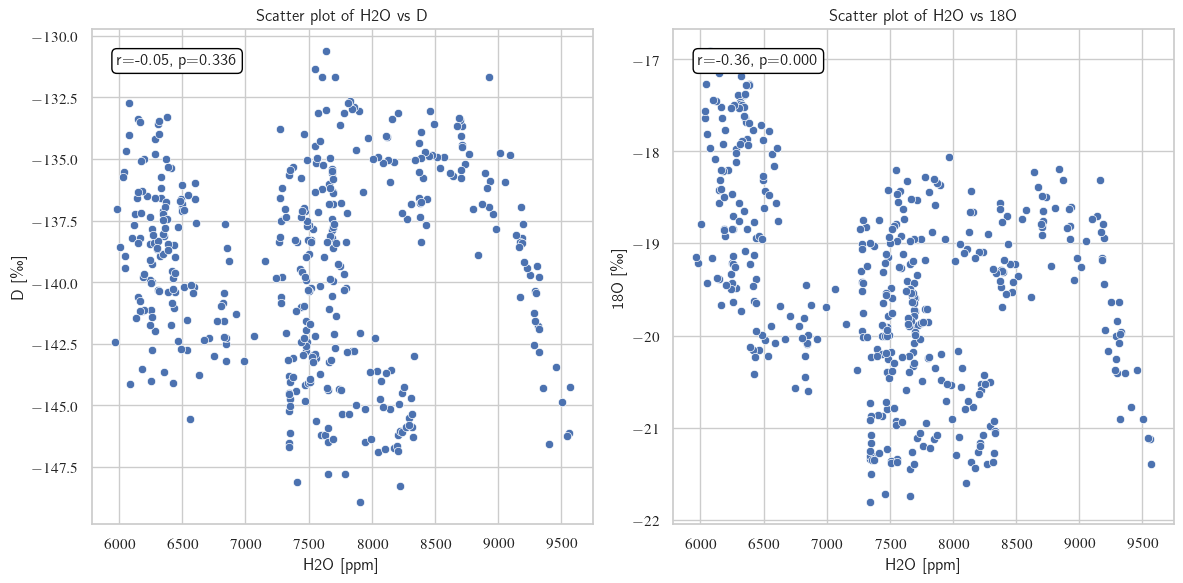

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Sample data loading and preprocessing steps (assuming the 'data' DataFrame is already defined)
# data['datetime'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])

# Time range for the analysis segment
start_time = '2023-12-04 15:02:00'
end_time = '2023-12-04 15:08:00'

# Filter data within the specified time range
filtered_data = data[(data['datetime'] >= pd.to_datetime(start_time)) & (data['datetime'] <= pd.to_datetime(end_time))]

# Calculate Pearson correlation and p-values
corr_h2o_delta_d, p_value_delta_d = pearsonr(filtered_data['H2O'], filtered_data['Delta_D_H'])
corr_h2o_delta_o, p_value_delta_o = pearsonr(filtered_data['H2O'], filtered_data['Delta_18_16'])

# Print correlation results
print(f"Correlation between H2O and δD: {corr_h2o_delta_d}, P-value: {p_value_delta_d}")
print(f"Correlation between H2O and δ18O: {corr_h2o_delta_o}, P-value: {p_value_delta_o}")

# Plotting
sns.set(style="whitegrid")

# Scatter plot for H2O vs δD
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='H2O', y='Delta_D_H', data=filtered_data)
plt.title('Scatter plot of H2O vs D')
plt.xlabel('H2O [ppm]')
plt.ylabel('D [‰]')
plt.grid(True)

# Adding correlation coefficient to the plot
plt.text(0.05, 0.95, f'r={corr_h2o_delta_d:.2f}, p={p_value_delta_d:.3f}', transform=plt.gca().transAxes,
         ha='left', va='top', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Scatter plot for H2O vs δ18O
plt.subplot(1, 2, 2)
sns.scatterplot(x='H2O', y='Delta_18_16', data=filtered_data)
plt.title('Scatter plot of H2O vs 18O')
plt.xlabel('H2O [ppm]')
plt.ylabel('18O [‰]')
plt.grid(True)

# Adding correlation coefficient to the plot
plt.text(0.05, 0.95, f'r={corr_h2o_delta_o:.2f}, p={p_value_delta_o:.3f}', transform=plt.gca().transAxes,
         ha='left', va='top', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

plt.tight_layout()
plt.show()


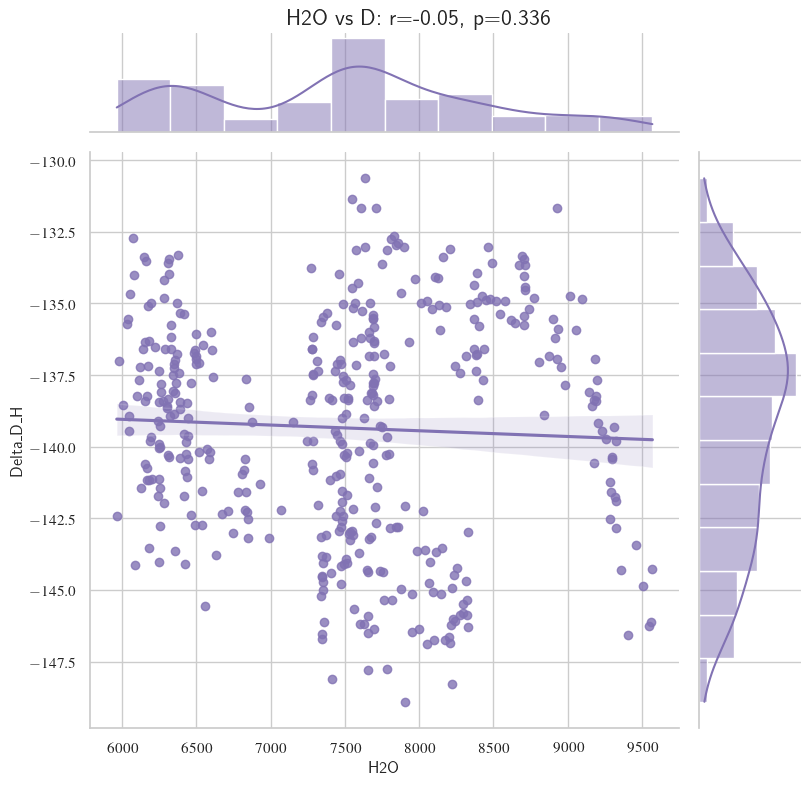

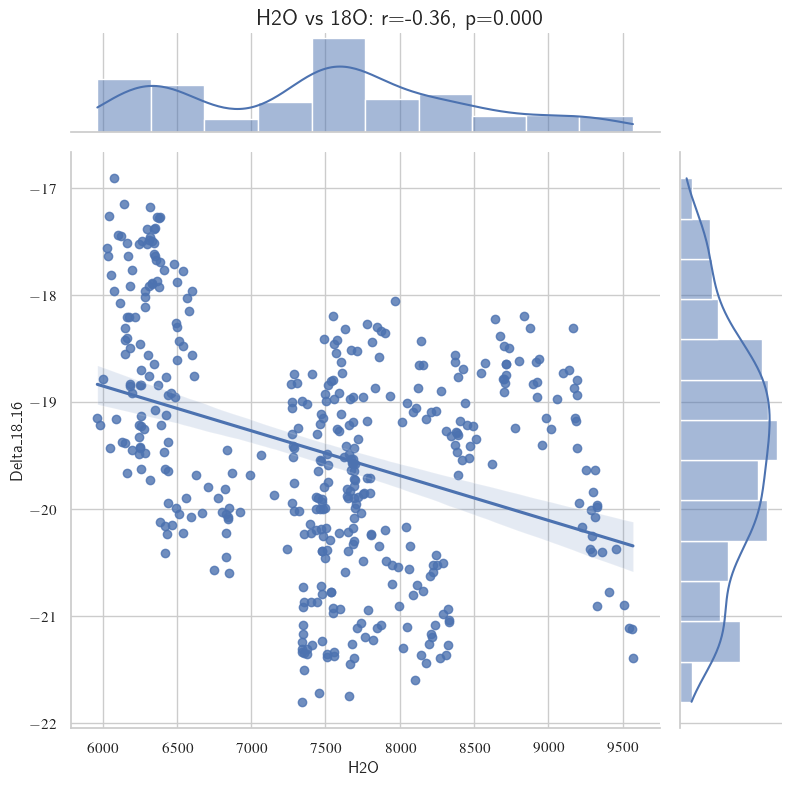

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Sample data loading and preprocessing steps
# data['datetime'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])

# Time range for the analysis segment
start_time = '2023-12-04 15:02:00'
end_time = '2023-12-04 15:08:00'

# Filter data within the specified time range
filtered_data = data[(data['datetime'] >= pd.to_datetime(start_time)) & (data['datetime'] <= pd.to_datetime(end_time))]

# Calculate Pearson correlation and p-values (for displaying in the plots)
corr_h2o_delta_d, p_value_delta_d = pearsonr(filtered_data['H2O'], filtered_data['Delta_D_H'])
corr_h2o_delta_o, p_value_delta_o = pearsonr(filtered_data['H2O'], filtered_data['Delta_18_16'])

# Joint plot for H2O vs δD
g1 = sns.jointplot(x='H2O', y='Delta_D_H', data=filtered_data, kind="reg", color="m", height=8)
g1.fig.suptitle(f'H2O vs D: r={corr_h2o_delta_d:.2f}, p={p_value_delta_d:.3f}', fontsize=16)
g1.fig.subplots_adjust(top=0.95)  # Reduce plot to make room for title
g1.ax_joint.grid(True)  # Add grid to joint axis

# Joint plot for H2O vs δ18O
g2 = sns.jointplot(x='H2O', y='Delta_18_16', data=filtered_data, kind="reg", color="b", height=8)
g2.fig.suptitle(f'H2O vs 18O: r={corr_h2o_delta_o:.2f}, p={p_value_delta_o:.3f}', fontsize=16)
g2.fig.subplots_adjust(top=0.95)  # Reduce plot to make room for title
g2.ax_joint.grid(True)  # Add grid to joint axis

plt.show()


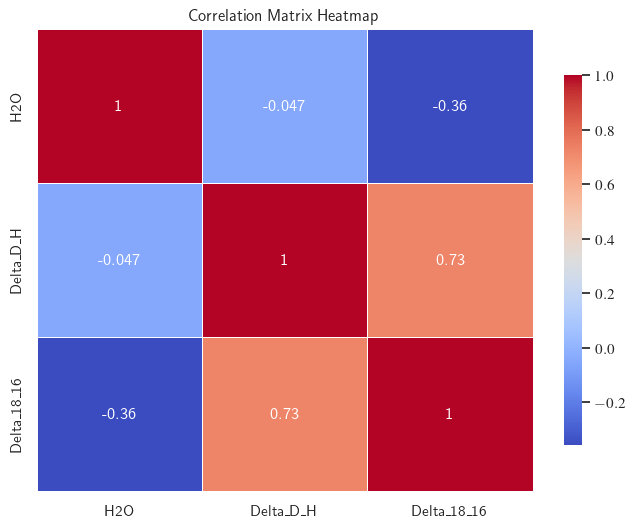

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded and includes the necessary columns
# Sample data loading and preprocessing steps might include:
# data['datetime'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])

# Filter data within the specified time range
start_time = '2023-12-04 15:02:00'
end_time = '2023-12-04 15:08:00'
filtered_data = data[(data['datetime'] >= pd.to_datetime(start_time)) & (data['datetime'] <= pd.to_datetime(end_time))]

# Select columns to correlate
columns_to_correlate = ['H2O', 'Delta_D_H', 'Delta_18_16']
correlation_data = filtered_data[columns_to_correlate]

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()


In [12]:
pip install allantools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 39.1 MB/s eta 0:00:00
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.16.1
    Uninstalling Pygments-2.16.1:
      Successfully uninstalled Pygments-2.16.1
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import allantools

# Ensure LaTeX text rendering and set the font to match your LaTeX document
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # Replace with your LaTeX document font
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.size': 14
})

def set_common_ticks(ax, right=False):
    ax.tick_params(axis='both', which='major', direction='in', length=6, right=right, top=True, bottom=True)
    ax.tick_params(axis='both', which='minor', direction='in', length=3, right=right, top=True, bottom=True)
    ax.minorticks_on()
    ax.grid(which='major', color='#DDDDDD', linewidth=1)
    ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)

def compute_allan_variance(data, rate):
    ti = 1 / rate
    N = len(data)
    allan_var_dict = {}
    min_segments = 3  # Ensure at least three segments for reliability
    for m in range(1, N // 2):
        k = N // m
        if k < 2 or m < min_segments:
            continue
        tau_m = k * ti
        means = [np.mean(data[i * k:(i + 1) * k]) for i in range(m)]
        squared_diffs = [(means[i + 1] - means[i])**2 for i in range(len(means) - 1)]
        av = sum(squared_diffs) / (m - 1) if squared_diffs else 0
        allan_var_dict[tau_m] = av

    taus = sorted(allan_var_dict.keys())
    avars = [allan_var_dict[tau] for tau in taus]
    return np.array(taus), np.array(avars)

# Assume 'data' and 'segment_start_time', 'segment_end_time' are defined
data['datetime'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])
segment_start_time = '2023-12-04 15:02:00'
segment_end_time = '2023-12-04 15:08:00'

df = data[(data['datetime'] >= segment_start_time) & (data['datetime'] <= segment_end_time)]

# Interpolation step
rate = 1.0 / np.diff(df['EPOCH_TIME']).mean()
uniform_time_grid = np.arange(df['datetime'].min().value, df['datetime'].max().value, step=1/rate)

df_interp = pd.DataFrame()
df_interp['datetime'] = pd.to_datetime(uniform_time_grid)
df_interp['Delta_18_16'] = np.interp(uniform_time_grid, df['datetime'].astype(np.int64), df['Delta_18_16'])
df_interp['Delta_D_H'] = np.interp(uniform_time_grid, df['datetime'].astype(np.int64), df['Delta_D_H'])

# User selection for method and plotting style
method = 'custom'  # or 'allantools'
plot_style = 'line'  # or 'marker'

if method == 'custom':
    taus_O, avars_O = compute_allan_variance(df_interp['Delta_18_16'].to_numpy(), rate)
    taus_D, avars_D = compute_allan_variance(df_interp['Delta_D_H'].to_numpy(), rate)
else:
    (taus_O, avars_O, _, _) = allantools.avar(df_interp['Delta_18_16'].to_numpy(), rate=rate, data_type='freq')
    (taus_D, avars_D, _, _) = allantools.avar(df_interp['Delta_D_H'].to_numpy(), rate=rate, data_type='freq')

# Plotting configuration
plt.figure(figsize=(7, 5))
if plot_style == 'line':
    plt.plot(taus_O, avars_O, label=u'$\delta^{18}$O', color='#4575b4', linestyle='-')
    plt.plot(taus_D, avars_D, label=u'$\delta$D', color='#d73027', linestyle='--')
else:
    plt.loglog(taus_O, avars_O, label=u'$\delta^{18}$O', color='#4575b4', marker='o', linestyle='-')
    plt.loglog(taus_D, avars_D, label=u'$\delta$D', color='#d73027', marker='x', linestyle='--')

set_common_ticks(plt.gca())

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Integration Time [sec]')
plt.ylabel(r'$\sigma^2_{Allan}$ [‰$^2$]')
plt.ylim(5*10**-2, 5*10**1)  # Adjust the y-axis limits
plt.legend()
plt.grid(True, which="both", ls="--")

# Move ticks to the inside
plt.tick_params(axis='both', which='major', direction='in', length=9, top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='minor', direction='in', length=6, top=True, right=True, bottom=True, left=True)
plt.minorticks_on()
plt.grid(which='major', color='#DDDDDD', linewidth=1)
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)

# Save the plot
plt.savefig('allan.eps', format='eps', bbox_inches='tight')

plt.show()


In [156]:
# Ensure LaTeX text rendering and set the font to match your LaTeX document
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # Replace with your LaTeX document font
    'axes.labelsize': 14,
    'axes.titlesize': 18,
    'legend.fontsize': 12,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.size': 14
})

In [164]:
plt.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{bm}',  # Load a LaTeX package for bold math (if needed)
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'axes.labelsize': 16,
    'axes.titlesize': 18,  # Increase title size
    'axes.titleweight': 'bold',  # Bold title
    'legend.fontsize': 12,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.size': 14
})

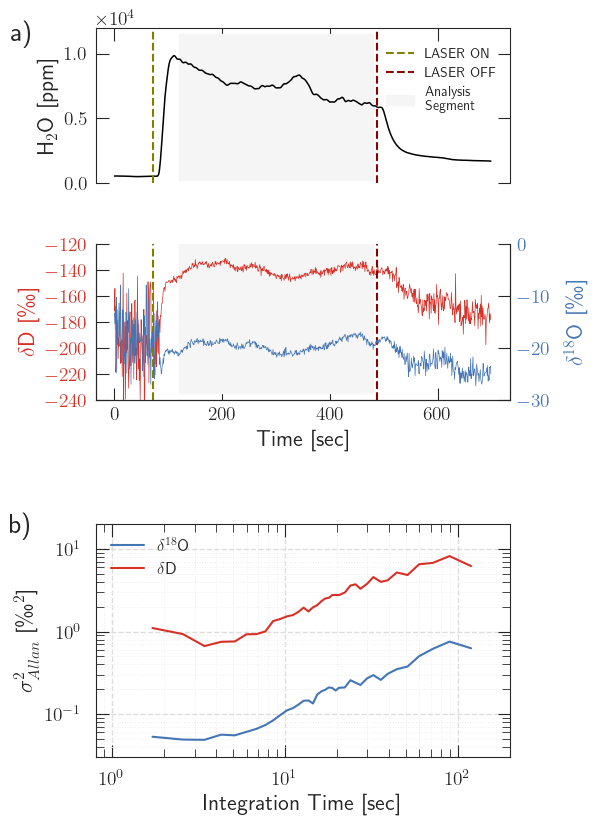

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import allantools
from matplotlib.ticker import ScalarFormatter

# Convert DATE and TIME to datetime
data['datetime'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])

sns.set_style("ticks")

# Define the specific time range and lines
start_time = '2023-12-04 15:00:00'
end_time = '2023-12-04 15:11:40'
hline_start_time = '2023-12-04 15:01:12'
hline_end_time = '2023-12-04 15:08:08'
segment_start_time = '2023-12-04 15:02:00'
segment_end_time = '2023-12-04 15:08:00'

# Convert times
segment_start_seconds = (pd.to_datetime(segment_start_time) - pd.to_datetime(start_time)).total_seconds()
segment_end_seconds = (pd.to_datetime(segment_end_time) - pd.to_datetime(start_time)).total_seconds()
hline_start_seconds = (pd.to_datetime(hline_start_time) - pd.to_datetime(start_time)).total_seconds()
hline_end_seconds = (pd.to_datetime(hline_end_time) - pd.to_datetime(start_time)).total_seconds()

# Filter data
filtered_data = data[(data['datetime'] >= start_time) & (data['datetime'] <= end_time)].copy()

# Convert 'datetime' to seconds from the start
filtered_data['seconds'] = (filtered_data['datetime'] - filtered_data['datetime'].iloc[0]).dt.total_seconds()

# Plotting function for time series
def plot_time_series(ax1, ax2, ax3):
    ax1.plot(filtered_data['seconds'], filtered_data['H2O'], color='black', linewidth=1.1)
    ax1.set_ylim(0, 12000)
    ax1.axvline(hline_start_seconds, color='olive', linestyle='--', label='LASER ON')
    ax1.axvline(hline_end_seconds, color='darkred', linestyle='--', label='LASER OFF')
    ax1.fill_betweenx([200, 11500], segment_start_seconds, segment_end_seconds, color='whitesmoke', label='Analysis\nSegment')
    ax1.set_ylabel(u'H$_{2}$O [ppm]')
    ax1.legend(loc='upper right', fontsize='small', frameon=False, bbox_to_anchor=(1, 0.95), prop={'size': 10})

    ax1.spines['bottom'].set_visible(False)
    ax1.tick_params(direction='in', which='both', length=9, top=True, right=True, bottom=False, pad=5)
    ax1.set_xticklabels([])
      # Set y-axis to scientific notation
    ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    ax2.plot(filtered_data['seconds'], filtered_data['Delta_D_H'], label=u'$\delta$D', color='#d73027', linewidth=0.5)
    ax2.axvline(hline_start_seconds, color='olive', linestyle='--')
    ax2.axvline(hline_end_seconds, color='darkred', linestyle='--')
    ax2.fill_betweenx([-235, -110], segment_start_seconds, segment_end_seconds, color='whitesmoke')
    ax2.set_xlabel('Time [sec]')
    ax2.set_ylabel(u'$\delta$D [‰]', color='#d73027')
    ax2.tick_params(axis='y', labelcolor='#d73027')
    # Set y-limits explicitly after plotting

    ax2.spines['top'].set_visible(False)
    ax2.tick_params(direction='in', which='both', length=9, top=False, right=False, bottom=True, left=True, pad=5)
    ax2.set_ylim(-240, -120)  # Ensure ylim is set after all plotting commands

    ax2.set_yticks(np.linspace(-240, -120, num=7))  # This creates 7 evenly spaced ticks from -240 to -120


    ax3.plot(filtered_data['seconds'], filtered_data['Delta_18_16'], label=u'$\delta^{18}$O', color='#4575b4', linewidth=0.5)
    ax3.set_ylabel(u'$\delta^{18}$O [‰]', color='#4575b4', labelpad=10)
    ax3.tick_params(axis='y', labelcolor='#4575b4')
    ax3.spines['top'].set_visible(False)
    ax3.tick_params(direction='in', which='both', length=9, top=False, right=True, bottom=True, left=False, pad=5)
    ax3.set_ylim(-30, -5)

    # lines, labels = ax2.get_legend_handles_labels()
    # lines2, labels2 = ax3.get_legend_handles_labels()
    # ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize='small', frameon=False)

# Function to compute Allan variance
# def compute_allan_variance(data, rate):
#     ti = 1 / rate
#     N = len(data)
#     allan_var_dict = {}
#     min_segments = 3  # Ensure at least three segments for reliability
#     for m in range(1, N // 2):
#         k = N // m
#         if k < 2 or m < min_segments:
#             continue
#         tau_m = k * ti
#         means = [np.mean(data[i * k:(i + 1) * k]) for i in range(m)]
#         squared_diffs = [(means[i + 1] - means[i])**2 for i in range(len(means) - 1)]
#         av = sum(squared_diffs) / (m - 1) if squared_diffs else 0
#         allan_var_dict[tau_m] = av

#     taus = sorted(allan_var_dict.keys())
#     avars = [allan_var_dict[tau] for tau in taus]
#     return np.array(taus), np.array(avars)


def compute_allan_variance(data, rate):
    ti = 1 / rate
    N = len(data)
    allan_var_dict = {}
    min_segments = 3  # Ensure at least three segments for reliability
    # Loop over different numbers of segments m
    for m in range(1, N):
        k = N // m  # Number of data points in each segment
        if k < 2 or m < min_segments:  # At least two data points per segment are needed to compute a mean
            continue
        # Compute mean values of segments
        means = [np.mean(data[i * k:(i + 1) * k]) for i in range(m)]
        # Compute squared differences of consecutive mean values
        squared_diffs = [(means[i + 1] - means[i])**2 for i in range(len(means) - 1)]
        # Calculate Allan variance for this number of segments
        if squared_diffs:
            allan_var = sum(squared_diffs) / (2 * m)  # Use 2m as in the equation
            tau_m = k * ti  # Integration time for this m
            allan_var_dict[tau_m] = allan_var

    # Extract sorted taus and corresponding Allan variances
    taus = sorted(allan_var_dict.keys())
    avars = [allan_var_dict[tau] for tau in taus]
    return np.array(taus), np.array(avars)

# Function to plot Allan variance
def plot_allan_variance(ax):
    method = 'custom'  # or 'allantools'
    plot_style = 'line'  # or 'marker'

    rate = 1.0 / np.diff(df['EPOCH_TIME']).mean()


    # # Interpolation step

    uniform_time_grid = np.arange(df['datetime'].min(), df['datetime'].max(), step=np.timedelta64(int(1/rate*1e9), 'ns'))
    df_interp = pd.DataFrame()
    df_interp['datetime'] = pd.to_datetime(uniform_time_grid)
    df_interp['Delta_18_16'] = np.interp(uniform_time_grid.astype(np.int64), df['datetime'].astype(np.int64), df['Delta_18_16'])
    df_interp['Delta_D_H'] = np.interp(uniform_time_grid.astype(np.int64), df['datetime'].astype(np.int64), df['Delta_D_H'])


    if method == 'custom':
        taus_O, avars_O = compute_allan_variance(df_interp['Delta_18_16'].to_numpy(), rate)
        taus_D, avars_D = compute_allan_variance(df_interp['Delta_D_H'].to_numpy(), rate)
    else:
        (taus_O, avars_O, _, _) = allantools.avar(df_interp['Delta_18_16'].to_numpy(), rate=rate, data_type='freq')
        (taus_D, avars_D, _, _) = allantools.avar(df_interp['Delta_D_H'].to_numpy(), rate=rate, data_type='freq')

    if plot_style == 'line':
        ax.plot(taus_O, avars_O, label=u'$\delta^{18}$O', color='#4575b4', linestyle='-')
        ax.plot(taus_D, avars_D, label=u'$\delta$D', color='#d73027', linestyle='-')
    else:
        ax.loglog(taus_O, avars_O, label=u'$\delta^{18}$O', color='#4575b4', marker='o', linestyle='-')
        ax.loglog(taus_D, avars_D, label=u'$\delta$D', color='#d73027', marker='x', linestyle='--')



    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'Integration Time [sec]')
    ax.set_ylabel(r'$\sigma^2_{Allan}$ [‰$^2$]')
    plt.ylim(3*10**-2, 2*10**1)  # Adjust the y-axis limits
    plt.xlim(0.8, 2*100)
    ax.legend(frameon=False)
    ax.grid(True, which="both", ls="--")

    # Move ticks to the inside
    ax.tick_params(axis='both', which='major', direction='in', length=9, top=True, right=True, bottom=True, left=True, pad=10)
    ax.tick_params(axis='both', which='minor', direction='in', length=6, top=True, right=True, bottom=True, left=True)
    ax.minorticks_on()
    ax.grid(which='major', color='#DDDDDD', linewidth=1)
    ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)



# # Create the figure with better spacing
# fig = plt.figure(figsize=(6, 11))
# gs = fig.add_gridspec(4, 1, height_ratios=[1, 1, 0.01, 1.5])  # Adjust these ratios as needed for your desired gaps

# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[1, 0])
# ax3 = ax2.twinx()
# ax4 = fig.add_subplot(gs[3, 0])
# ax3.set_ylim(-30, -5)

# plot_time_series(ax1, ax2, ax3)
# plot_allan_variance(ax4)



# # Add labels (a) and (b)
# ax1.text(-0.15, 1.05, 'a)', transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
# ax4.text(-0.15, 1.05, 'b)', transform=ax4.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
# plt.subplots_adjust(hspace=0.01)  # Play with this value to get the spacing you want
# plt.tight_layout(pad=0.5)
# plt.savefig('allan_plot.eps', format='eps', bbox_inches='tight')
# plt.show()


fig_width_cm = 17.1 * 0.9  # Reduce width to 90% of double column width
fig_height_cm = 23.3 * 0.9  # Reduce height to 90% of maximum height

# Convert cm to inches
fig_width_in = fig_width_cm / 2.54  # Convert cm to inches
fig_height_in = fig_height_cm / 2.54  # Convert cm to inches

fig = plt.figure(figsize=(fig_width_in, fig_height_in))
gs = fig.add_gridspec(4, 1, height_ratios=[1, 1, 0.01, 1.5])  # Adjust these ratios for plot spacing

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = ax2.twinx()
ax3.set_ylim(-30, -5)
ax4 = fig.add_subplot(gs[3, 0])

# Apply plot functions
plot_time_series(ax1, ax2, ax3)
ax3.set_ylim(-30, 0)  # Set limits after plotting to ensure they are not overridden

plot_allan_variance(ax4)
ax1.text(-0.15, 1.05, 'a)', transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
ax4.text(-0.15, 1.05, 'b)', transform=ax4.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Adjust plot settings
plt.subplots_adjust(hspace=0.01)  # Fine-tune the spacing between plots
plt.tight_layout(pad=0.5)  # Ensure everything fits within the layout without overlap

# Save the plot with high resolution suitable for publication
# plt.savefig('allan_plot.tiff', format='tiff', dpi=600, bbox_inches='tight')
plt.savefig('allan_plot.eps', format='eps', dpi=600, bbox_inches='tight')

plt.show()

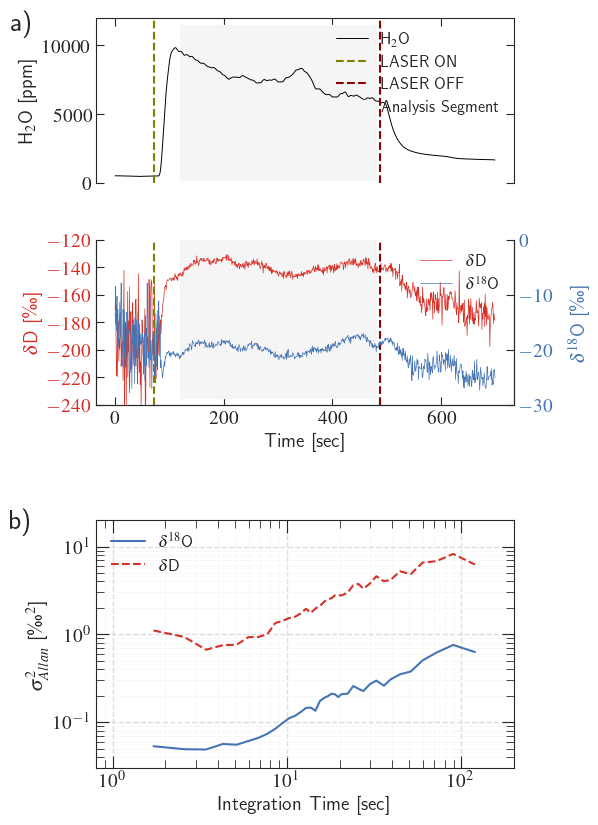

In [107]:
fig_width_cm = 17.1 * 0.9  # Reduce width to 90% of double column width
fig_height_cm = 23.3 * 0.9  # Reduce height to 90% of maximum height

# Convert cm to inches
fig_width_in = fig_width_cm / 2.54  # Convert cm to inches
fig_height_in = fig_height_cm / 2.54  # Convert cm to inches

fig = plt.figure(figsize=(fig_width_in, fig_height_in))
gs = fig.add_gridspec(4, 1, height_ratios=[1, 1, 0.01, 1.5])  # Adjust these ratios for plot spacing

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = ax2.twinx()
ax3.set_ylim(-30, -5)
ax4 = fig.add_subplot(gs[3, 0])

# Apply plot functions
plot_time_series(ax1, ax2, ax3)
ax3.set_ylim(-30, 0)  # Set limits after plotting to ensure they are not overridden

plot_allan_variance(ax4)
ax1.text(-0.15, 1.05, 'a)', transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
ax4.text(-0.15, 1.05, 'b)', transform=ax4.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Adjust plot settings
plt.subplots_adjust(hspace=0.01)  # Fine-tune the spacing between plots
plt.tight_layout(pad=0.5)  # Ensure everything fits within the layout without overlap

# Save the plot with high resolution suitable for publication
# plt.savefig('reduced_allan_plot.tiff', format='tiff', dpi=600, bbox_inches='tight')
plt.show()


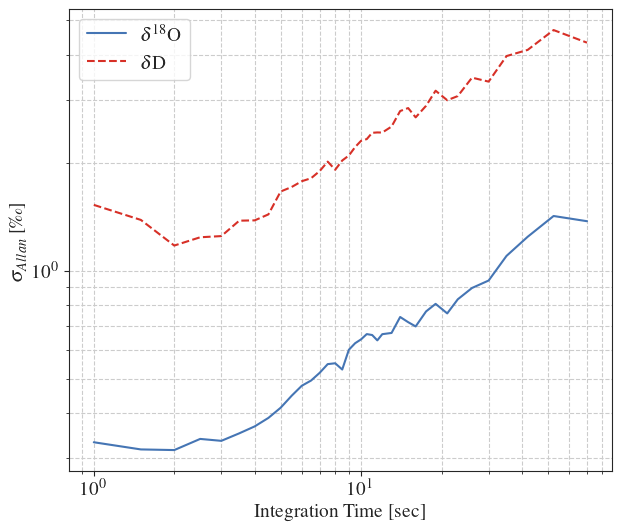

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import allantools

# Ensure LaTeX text rendering and set the font to match your LaTeX document
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # Replace with your LaTeX document font
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.size': 14
})

# Assume 'data' and 'segment_start_time', 'segment_end_time' are defined
data['datetime'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])
segment_start_time = '2023-12-04 15:02:00'
segment_end_time = '2023-12-04 15:08:00'

df = data[(data['datetime'] >= segment_start_time) & (data['datetime'] <= segment_end_time)]

def compute_allan_variance(data, rate):
    ti = 1 / rate
    N = len(data)
    allan_var_dict = {}
    min_segments = 3  # Ensure at least three segments for reliability
    for m in range(1, N // 2):
        k = N // m
        if k < 2 or m < min_segments:
            continue
        tau_m = k * ti
        means = [np.mean(data[i * k:(i + 1) * k]) for i in range(m)]
        squared_diffs = [(means[i + 1] - means[i])**2 for i in range(len(means) - 1)]
        av = sum(squared_diffs) / (m - 1) if squared_diffs else 0
        allan_var_dict[tau_m] = av

    taus = sorted(allan_var_dict.keys())
    adevs = [np.sqrt(allan_var_dict[tau]) for tau in taus]
    return np.array(taus), np.array(adevs)

# User selection for method and plotting style
method = 'custom'  # or 'allantools'
plot_style = 'line'  # or 'marker'

rate = 1.0 / np.diff(df['EPOCH_TIME']).mean()
if method == 'custom':
    taus_O, adevs_O = compute_allan_variance(df['Delta_18_16'].to_numpy(), rate)
    taus_D, adevs_D = compute_allan_variance(df['Delta_D_H'].to_numpy(), rate)
else:
    (taus_O, adevs_O, _, _) = allantools.adev(df['Delta_18_16'].to_numpy(), rate=rate, data_type='freq')
    (taus_D, adevs_D, _, _) = allantools.adev(df['Delta_D_H'].to_numpy(), rate=rate, data_type='freq')

# Plotting configuration
plt.figure(figsize=(7, 6))
if plot_style == 'line':
    plt.plot(taus_O, adevs_O, label=u'$\delta^{18}$O', color='#4575b4', linestyle='-')
    plt.plot(taus_D, adevs_D, label=u'$\delta$D', color='#d73027', linestyle='--')
else:
    plt.loglog(taus_O, adevs_O, label=u'$\delta^{18}$O', color='#4575b4', marker='o', linestyle='-')
    plt.loglog(taus_D, adevs_D, label=u'$\delta$D', color='#d73027', marker='x', linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Integration Time [sec]')
plt.ylabel(r'$\sigma_{Allan}$ [‰]')
# plt.title(r'Allan Deviation for $\Delta^{18}$O and $\delta$D')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


In [ ]:
# Select only the necessary columns
f_data = data[(data['datetime'] >= segment_start_time) & (data['datetime'] <= segment_end_time)]
columns_to_save = f_data[['EPOCH_TIME', 'Delta_18_16', 'Delta_D_H']]

# Save to a txt file with space delimiter
columns_to_save.to_csv('AllanVarData.txt', sep=' ', index=False, header=True)

In [ ]:
pip install allantools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [ ]:
data=columns_to_save.copy()

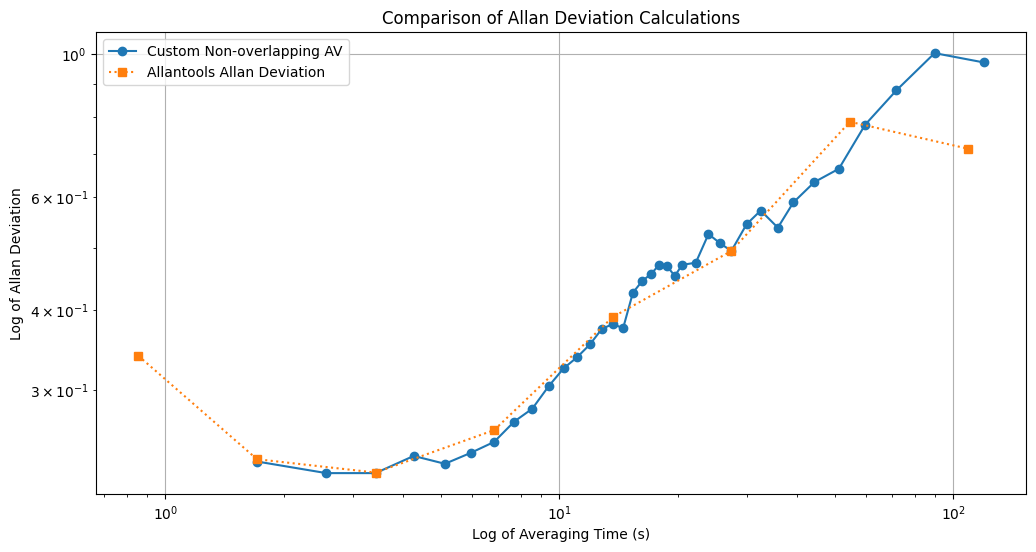

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import allantools

f_data = data[(data['datetime'] >= segment_start_time) & (data['datetime'] <= segment_end_time)]
df=f_data.copy()



def compute_non_overlap_av(data, ti):
    N = len(data)
    allan_var_dict = {}
    min_segments = 3  # Minimum number of segments to ensure statistical reliability
    for m in range(1, N // 2):
        k = N // m
        if k < 2 or m < min_segments:
            continue
        tau_m = k * ti
        # Calculate means of non-overlapping segments
        means = [np.mean(data[i * k:(i + 1) * k]) for i in range(m)]
        squared_diffs = [(means[i + 1] - means[i])**2 for i in range(len(means) - 1)]
        av = sum(squared_diffs) / (2*(m-1)) if squared_diffs else 0
        if tau_m in allan_var_dict:
            allan_var_dict[tau_m].append(av)
        else:
            allan_var_dict[tau_m] = [av]

    taus = sorted(allan_var_dict.keys())
    adevs = [np.sqrt(np.mean(allan_var_dict[tau])) for tau in taus]
    return np.array(taus), np.array(adevs)



# Compute Allan variances using custom functions
ti = np.diff(df['EPOCH_TIME']).mean()
taus_non, adevs_non = compute_non_overlap_av(df['Delta_18_16'].to_numpy(), ti)

# Using allantools for comparison
(taus_tools, adevs_tools, _, _) = allantools.adev(df['Delta_18_16'].to_numpy(), rate=1/ti, data_type='freq')

# Plot results
plt.figure(figsize=(12, 6))
plt.loglog(taus_non, adevs_non, label='Custom Non-overlapping AV', marker='o', linestyle='-')
plt.loglog(taus_tools, adevs_tools, label='Allantools Allan Deviation', marker='s', linestyle=':')
plt.xlabel('Log of Averaging Time (s)')
plt.ylabel('Log of Allan Deviation')
plt.title('Comparison of Allan Deviation Calculations')
plt.legend()
plt.grid(True)
plt.show()


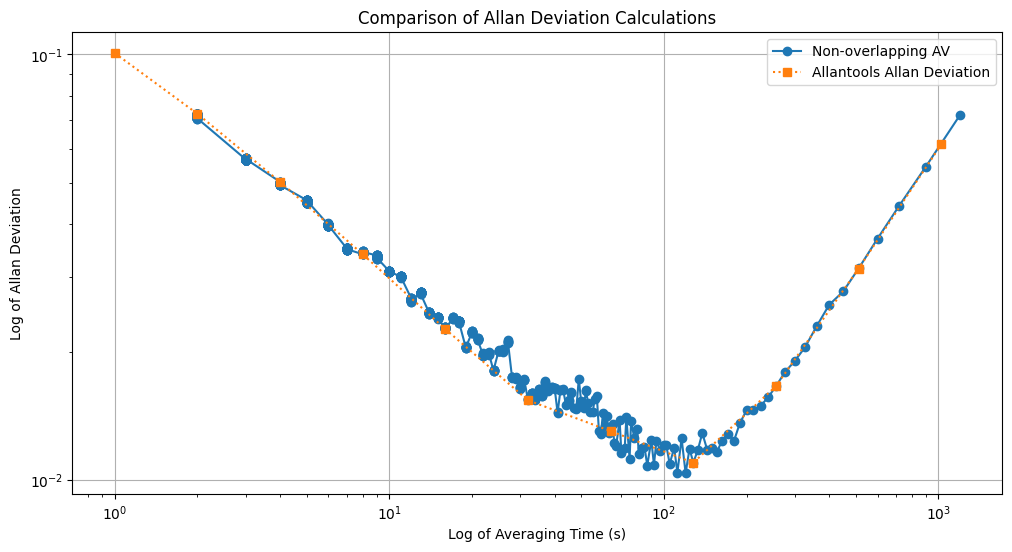

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import allantools


# data=columns_to_save.copy()
# df=data.copy()

# Function Definitions
def compute_non_overlap_av(data, ti):
    N = len(data)
    allan_var = []
    taus = []
    for m in range(1, N ):
        k = N // m
        if k < 2 or m < 3:
            continue
        tau_m = k * ti
        taus.append(tau_m)
        means = np.array([np.mean(data[i * k:(i + 1) * k]) for i in range(m)])
        squared_diffs = np.diff(means)**2
        av = np.sum(squared_diffs) / (2 * (m-1))
        allan_var.append(av)
    return np.array(taus), np.sqrt(allan_var)



# def compute_non_overlap_av(data, ti):
#     N = len(data)
#     allan_var = []
#     taus = []
#     for m in range(1, N // 2):
#         k = N // m
#         if k < 2 or m < 3:
#             continue
#         tau_m = k * ti
#         taus.append(tau_m)
#         # Calculate means of non-overlapping segments
#         means = [np.mean(data[i * k:(i + 1) * k]) for i in range(m)]
#         if len(means) % 2 != 0:
#             means = means[:-1]  # Ensure even number of means for pairing
#         squared_diffs = [(means[i + 1] - means[i])**2 for i in range(0, len(means), 2)]
#         # Prevent division by zero
#         if squared_diffs:
#             av = sum(squared_diffs) / (len(squared_diffs))
#         else:
#             av = 0  # No variance if no valid differences exist
#         allan_var.append(av)
#     return np.array(taus), np.sqrt(allan_var)



def compute_tau_overlap_av(data, ti):
    N = len(data)
    allan_var = []
    taus = []
    for m in range(1, N // 2):
        k = N // m
        if k < 2:
            continue
        tau_m = k * ti
        taus.append(tau_m)
        means = np.array([np.mean(data[i * k:(i + 1) * k]) for i in range(m - 1)])
        squared_diffs = np.diff(means)**2
        av = np.sum(squared_diffs) / (2 * (m - 1))
        allan_var.append(av)
    return np.array(taus), np.sqrt(allan_var)

def compute_max_overlap_av(data, ti):
    N = len(data)
    allan_var = []
    taus = []
    for m in range(1, N // 2):
        k = N // m
        if k < 2:
            continue
        tau_m = k * ti
        taus.append(tau_m)
        means = np.array([np.mean(data[i: i + k]) for i in range(0, N - k + 1, k // 2)])
        squared_diffs = np.diff(means)**2
        av = np.sum(squared_diffs) / (2 * len(means))
        allan_var.append(av)
    return np.array(taus), np.sqrt(allan_var)

# Generate synthetic data for testing
np.random.seed(42)
time = np.arange(0, 3600, 1)
frequency = 0.05
noise_level = 0.1
data = np.sin(2 * np.pi * frequency * time / 3600) + np.random.normal(0, noise_level, size=len(time))
df = pd.DataFrame({'EPOCH_TIME': time, 'Delta_18_16': data})

# Compute Allan variances using custom functions
ti = np.diff(df['EPOCH_TIME']).mean()
taus_non, adevs_non = compute_non_overlap_av(df['Delta_18_16'].to_numpy(), ti)
# taus_tau, adevs_tau = compute_tau_overlap_av(df['Delta_18_16'].to_numpy(), ti)
# taus_max, adevs_max = compute_max_overlap_av(df['Delta_18_16'].to_numpy(), ti)

# Using allantools for comparison
(taus_tools, adevs_tools, _, _) = allantools.adev(df['Delta_18_16'].to_numpy(), rate=1/ti, data_type='freq')

# Plot results
plt.figure(figsize=(12, 6))
plt.loglog(taus_non, adevs_non, label='Non-overlapping AV', marker='o', linestyle='-')
# plt.loglog(taus_tau, adevs_tau, label='Tau-overlapping AV', marker='x', linestyle='--')
# plt.loglog(taus_max, adevs_max, label='Maximum-overlap AV', marker='^', linestyle='-.')
plt.loglog(taus_tools, adevs_tools, label='Allantools Allan Deviation', marker='s', linestyle=':')
plt.xlabel('Log of Averaging Time (s)')
plt.ylabel('Log of Allan Deviation')
plt.title('Comparison of Allan Deviation Calculations')
plt.legend()
plt.grid(True)
plt.show()


# **Data analysis - Main**

In [166]:

def load_and_process_multiple_directories(directory_paths, output_filenames):
    all_final_dfs = []

    for directory_path, output_filename in zip(directory_paths, output_filenames):
        all_dfs = []

        # Loop through files in the directory
        for filename in os.listdir(directory_path):
            if filename.endswith(".dat"):
                filepath = os.path.join(directory_path, filename)
                print(filepath)
                # Load data from the current file
                data = np.loadtxt(filepath, dtype="S").astype(str)

                header = data[0, :]
                data = data[1:, :]

                df = pd.DataFrame(data=data, columns=header)
                df = df[['DATE', 'TIME', 'H2O', 'Delta_18_16', 'Delta_D_H']].copy()  # Ensure to make a copy here

                df["DATETIME"] = df['DATE'] + ' ' + df['TIME']
                df['DATETIME'] = pd.to_datetime(df["DATETIME"], format="%Y-%m-%d %H:%M:%S.%f")
                df.set_index('DATETIME', inplace=True)

                # Delete the 'DATE' and 'TIME' columns
                df.drop(['DATE', 'TIME'], axis=1, inplace=True)

                # Convert columns to numeric if needed
                df['H2O'] = pd.to_numeric(df["H2O"])
                df['Delta_18_16'] = pd.to_numeric(df["Delta_18_16"])
                df['Delta_D_H'] = pd.to_numeric(df["Delta_D_H"])
                print(df.shape[0])

                # Remove duplicate timestamps within the individual DataFrame
                df = df[~df.index.duplicated(keep='first')]

                # Append the current DataFrame to the list
                all_dfs.append(df)


        # Concatenate all DataFrames into a single DataFrame
        final_df = pd.concat(all_dfs)
        print(final_df.index.duplicated().any())
        # Remove duplicate timestamps after concatenation
        final_df = final_df[~final_df.index.duplicated(keep='first')]
        print(final_df.index.duplicated().any())
        # Handle time zone conversion
        utc_tz = pytz.utc
        cest_tz = pytz.timezone('Europe/Paris')  # Assuming CEST timezone

        # Convert the datetime column to UTC if it's not already in UTC
        if final_df.index.tzinfo is None:
            final_df.index = final_df.index.tz_localize(utc_tz)

        # Convert the datetime column to CEST
        final_df.index = final_df.index.tz_convert(cest_tz)

        # Sort the DataFrame by the 'DATETIME' index in ascending order
        final_df.sort_index(ascending=True, inplace=True)

        # Save the final DataFrame to a CSV file
        final_df.to_csv(output_filename, sep='\t', encoding='utf-8')

        # Add the processed DataFrame to the list
        all_final_dfs.append(final_df)

    return all_final_dfs

# Usage example:
directory_paths = ["LA/12/06", "LA/12/07", "LA/12/04"]
output_filenames = ["all_data1.csv", "all_data2.csv", "all_data3.csv"]
processed_data_list = load_and_process_multiple_directories(directory_paths, output_filenames)


LA/12/06/HIDS2383-20231206-003349Z-DataLog_User (1).dat
4224
LA/12/06/HIDS2383-20231206-003349Z-DataLog_User.dat
4224
LA/12/06/HIDS2383-20231206-013355Z-DataLog_User (1).dat
4224
LA/12/06/HIDS2383-20231206-013355Z-DataLog_User.dat
4224
LA/12/06/HIDS2383-20231206-023401Z-DataLog_User (1).dat
4224
LA/12/06/HIDS2383-20231206-023401Z-DataLog_User.dat
4224
LA/12/06/HIDS2383-20231206-033407Z-DataLog_User (1).dat
4224
LA/12/06/HIDS2383-20231206-033407Z-DataLog_User.dat
4224
LA/12/06/HIDS2383-20231206-043413Z-DataLog_User (1).dat
4224
LA/12/06/HIDS2383-20231206-043413Z-DataLog_User.dat
4224
LA/12/06/HIDS2383-20231206-053418Z-DataLog_User (1).dat
4224
LA/12/06/HIDS2383-20231206-053418Z-DataLog_User.dat
4224
LA/12/06/HIDS2383-20231206-063424Z-DataLog_User (1).dat
4224
LA/12/06/HIDS2383-20231206-063424Z-DataLog_User.dat
4224
LA/12/06/HIDS2383-20231206-073430Z-DataLog_User (1).dat
4224
LA/12/06/HIDS2383-20231206-073430Z-DataLog_User.dat
4224
LA/12/06/HIDS2383-20231206-083436Z-DataLog_User (1).dat


In [167]:
df8=processed_data_list[0]
df9=processed_data_list[1]
df7=processed_data_list[2]

In [168]:
print(df8.index.duplicated().any())


df = df8.copy()

# Calculate the mean difference between consecutive datetime indices
time_diffs = np.diff(df.index.to_pydatetime())  # Convert index to datetime and find differences
mean_interval = np.mean(time_diffs)  # Calculate mean of differences
frequency_hz = 1 / mean_interval.total_seconds()  # Convert mean interval to seconds and find its reciprocal

# Print the calculated frequency
print("Calculated sampling frequency:", frequency_hz, "Hz")


# Assuming df is your DataFrame with a timezone-aware DATETIME index
# Create a timezone-aware start and end time if your DataFrame's index is timezone-aware
start_time = pd.Timestamp('2023-12-06 15:22:00', tz='Europe/Paris')  # Adjust the timezone as per your DataFrame
end_time = pd.Timestamp('2023-12-06 15:22:40', tz='Europe/Paris')

# If your DataFrame's index is timezone-naive, you can make these timestamps timezone-naive:
# start_time = pd.Timestamp('2023-12-04 16:01:12').tz_localize(None)
# end_time = pd.Timestamp('2023-12-04 16:08:08').tz_localize(None)

# Filter the DataFrame
filtered_df = df[start_time:end_time]

# Calculate the number of data points
number_of_data_points = len(filtered_df)

# Calculate the number of seconds in the interval
time_interval_seconds = (end_time - start_time).total_seconds()

# Print the results
print(f"Number of data points: {number_of_data_points}")
print(f"Time interval in seconds: {time_interval_seconds}")

False
Calculated sampling frequency: 1.171405980027528 Hz
Number of data points: 47
Time interval in seconds: 40.0


In [169]:


def filter_localize_and_convert_to_seconds(df, start_time, end_time):
    """
    Filters the DataFrame for a specified time range, removes timezone information,
    and converts the DateTime index to seconds since the first data point.

    Args:
    df (pd.DataFrame): DataFrame to filter.
    start_time (str): Start time in HH:MM format.
    end_time (str): End time in HH:MM format.

    Returns:
    pd.DataFrame: Filtered DataFrame with timezone information removed and index converted to seconds.
    """
    # Filter data within the specified time range
    filtered_df = df.between_time(start_time, end_time)

    # # Remove timezone information
    # filtered_df.index = filtered_df.index.tz_localize(None)

    # Convert DateTime index to seconds since the first data point
    filtered_df['Seconds'] = (filtered_df.index - filtered_df.index[0]).total_seconds()

    return filtered_df

# Example usage:
df8_processed = filter_localize_and_convert_to_seconds(df8, "11:15", "17:48") # 11:15 15:18
df9_processed = filter_localize_and_convert_to_seconds(df9, "11:22", "16:29")# 13:38
df7_processed = filter_localize_and_convert_to_seconds(df7, "15:50", "16:52")#

# If you need to review the processed data or use it elsewhere:
print(df8_processed)
print(df9_processed)


                                          H2O  Delta_18_16   Delta_D_H  \
DATETIME                                                                 
2023-12-06 11:15:00.440000+01:00  1084.969971   -18.406838 -217.257284   
2023-12-06 11:15:01.295000+01:00  1073.419757   -19.385944 -205.358026   
2023-12-06 11:15:02.148000+01:00  1058.243524   -18.879586 -201.439591   
2023-12-06 11:15:03+01:00         1046.631144   -18.114099 -178.245874   
2023-12-06 11:15:03.855000+01:00  1037.169285   -20.294797 -187.905599   
...                                       ...          ...         ...   
2023-12-06 17:47:56.466000+01:00   438.051039   -23.227105 -353.481565   
2023-12-06 17:47:57.319000+01:00   443.725981   -35.916199 -326.222134   
2023-12-06 17:47:58.173000+01:00   441.047257   -35.612293 -369.970817   
2023-12-06 17:47:59.026000+01:00   442.269414   -35.141358 -314.766677   
2023-12-06 17:47:59.878000+01:00   443.959225   -41.892963 -355.514590   

                                    S

<ipython-input-169-592f9adae12a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Seconds'] = (filtered_df.index - filtered_df.index[0]).total_seconds()
<ipython-input-169-592f9adae12a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Seconds'] = (filtered_df.index - filtered_df.index[0]).total_seconds()
<ipython-input-169-592f9adae12a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [170]:
# Assume 'df' is your DataFrame with a datetime-index
timezone = df9_processed.index.tz

print("The timezone of the DataFrame's index is:", timezone)

The timezone of the DataFrame's index is: Europe/Paris


In [171]:
import pandas as pd
import pytz

def convert_intervals_to_seconds(df, intervals, timezone='Europe/Paris'):
    """
    Converts time intervals into seconds relative to the DataFrame's first index,
    with careful handling of timezone localization and conversion.

    Args:
    df (pd.DataFrame): DataFrame with a datetime-index.
    intervals (list of tuples): List containing tuples of (start_time, end_time, ID, role).
    timezone (str): Timezone to localize the start and end times if they're naive.

    Returns:
    list: List of tuples with the format (start_seconds, end_seconds, ID, role).
    """
    tz = pytz.timezone(timezone)
    if df.index.tzinfo is None:
        # If the DataFrame's index is naive, assume it's in the specified timezone
        df.index = df.index.tz_localize(tz)
    else:
        # If the DataFrame's index is already localized, ensure it's in the right timezone
        df.index = df.index.tz_convert(tz)

    reference_time = df.index[0]

    intervals_seconds = [
        ((pd.to_datetime(start, format="%Y-%m-%d %H:%M:%S").tz_localize(tz) - reference_time).total_seconds(),
         (pd.to_datetime(end, format="%Y-%m-%d %H:%M:%S").tz_localize(tz) - reference_time).total_seconds(),
         ID, role)
        for start, end, ID, role in intervals
    ]

    return intervals_seconds


# Example usage with your data:
df8_intervals = [
      ('2023-12-06 15:21:16', '2023-12-06 15:22:34', 'TD M1 1', ''),
    ('2023-12-06 15:24:23', '2023-12-06 15:25:45', 'TD M1 2', ''),
    ('2023-12-06 15:27:53', '2023-12-06 15:29:24', 'TD M1 3', ''),
    ('2023-12-06 15:32:43', '2023-12-06 15:34:02', 'TD S1 1', 'Calibration'),
    ('2023-12-06 15:37:25', '2023-12-06 15:38:45', 'TD S1 2', ''),
    ('2023-12-06 15:40:13', '2023-12-06 15:41:30', 'TD S1 3', ''),
    ('2023-12-06 15:44:47', '2023-12-06 15:46:04', 'NVL M1 1', ''),
    ('2023-12-06 15:47:53', '2023-12-06 15:49:12', 'NVL M1 2', ''),
    ('2023-12-06 15:51:09', '2023-12-06 15:52:22', 'NVL M1 3', ''),
    ('2023-12-06 15:54:51', '2023-12-06 15:56:10', 'NVL S1 1', ''),
    ('2023-12-06 15:58:25', '2023-12-06 15:59:46', 'NVL S1 2', ''),
    ('2023-12-06 16:01:11', '2023-12-06 16:02:29', 'NVL S1 3', ''),
    ('2023-12-06 16:04:15', '2023-12-06 16:05:34', 'NS M1 1', ''),
    ('2023-12-06 16:07:15', '2023-12-06 16:08:34', 'NS M1 2', ''),
    ('2023-12-06 16:09:47', '2023-12-06 16:11:09', 'NS M1 3', ''),
    ('2023-12-06 16:14:00', '2023-12-06 16:15:14', 'NS S1 1', 'Calibration'),
    ('2023-12-06 16:16:48', '2023-12-06 16:18:05', 'NS S1 2', ''),
    ('2023-12-06 16:19:15', '2023-12-06 16:20:33', 'NS S1 3', ''),
    ('2023-12-06 16:24:27', '2023-12-06 16:25:44', 'NS M2 1', ''),
    ('2023-12-06 16:27:09', '2023-12-06 16:28:18', 'NS M2 2', ''),
    ('2023-12-06 16:29:52', '2023-12-06 16:31:09', 'NS M2 3', ''),
    ('2023-12-06 16:32:58', '2023-12-06 16:34:28', 'NS S2 1', ''),
    ('2023-12-06 16:37:52', '2023-12-06 16:39:21', 'NS S2 2', ''),
    ('2023-12-06 16:41:07', '2023-12-06 16:42:36', 'NS S2 3', ''),
    ('2023-12-06 16:55:45', '2023-12-06 16:57:27', 'NVL M2 1', ''),
    ('2023-12-06 17:02:27', '2023-12-06 17:03:43', 'NVL M2 2', ''),
    ('2023-12-06 17:06:56', '2023-12-06 17:08:24', 'NVL M2 3', ''),
    ('2023-12-06 17:10:07', '2023-12-06 17:11:25', 'NVL S2 1', ''),
    ('2023-12-06 17:14:01', '2023-12-06 17:15:28', 'NVL S2 2', ''),
    ('2023-12-06 17:19:01', '2023-12-06 17:20:26', 'NVL S2 3', ''),
    ('2023-12-06 17:25:35', '2023-12-06 17:26:55', 'TD M2 1', ''),
    ('2023-12-06 17:28:51', '2023-12-06 17:30:14', 'TD M2 2', ''),
    ('2023-12-06 17:31:52', '2023-12-06 17:33:10', 'TD M2 3', ''),
    ('2023-12-06 17:35:25', '2023-12-06 17:36:45', 'TD S2 1', ''),
    ('2023-12-06 17:40:08', '2023-12-06 17:41:22', 'TD S2 2', ''),
    ('2023-12-06 17:43:34', '2023-12-06 17:44:50', 'TD S2 3', '')
]

df9_intervals = [
    ( '2023-12-07 11:24:57', '2023-12-07 11:26:16', 'TD M1 1', ''),
    ( '2023-12-07 11:28:21', '2023-12-07 11:29:39', 'TD M1 2', ''),
    ( '2023-12-07 11:31:17', '2023-12-07 11:32:37', 'TD M1 3', ''),
    ('2023-12-07 11:37:07', '2023-12-07 11:38:23', 'TD S1 1', 'Calibration'),
    ( '2023-12-07 11:40:18', '2023-12-07 11:41:36', 'TD S1 2', ''),
    ( '2023-12-07 11:43:39', '2023-12-07 11:44:56', 'TD S1 3', ''),
    ( '2023-12-07 11:50:09', '2023-12-07 11:51:26', 'NVL M1 1', ''),
    ( '2023-12-07 11:53:17', '2023-12-07 11:54:35', 'NVL M1 2', ''),
    ( '2023-12-07 11:56:15', '2023-12-07 11:57:33', 'NVL M1 3', ''),
    ( '2023-12-07 11:59:22', '2023-12-07 12:00:40', 'NVL S1 1', ''),
    ( '2023-12-07 12:02:40', '2023-12-07 12:04:04', 'NVL S1 2', ''),
    ( '2023-12-07 12:05:41', '2023-12-07 12:07:03', 'NVL S1 3', ''),
    ( '2023-12-07 12:10:10', '2023-12-07 12:11:39', 'NS M1 1', ''),
    ( '2023-12-07 12:13:36', '2023-12-07 12:15:04', 'NS M1 2', ''),
    ( '2023-12-07 12:16:41', '2023-12-07 12:18:08', 'NS M1 3', ''),
    ( '2023-12-07 12:22:15', '2023-12-07 12:23:33', 'NS S1 1', 'Calibration'),
    ( '2023-12-07 12:25:31', '2023-12-07 12:26:48', 'NS S1 2', ''),
    ( '2023-12-07 12:28:40', '2023-12-07 12:30:00', 'NS S1 3', ''),
    ( '2023-12-07 12:36:47', '2023-12-07 12:38:06', 'NS M2 1', ''),
    ( '2023-12-07 12:40:26', '2023-12-07 12:41:45', 'NS M2 2', ''),
    ( '2023-12-07 12:43:44', '2023-12-07 12:45:02', 'NS M2 3', ''),
    ( '2023-12-07 12:46:47', '2023-12-07 12:48:06', 'NS S2 1', ''),
    ( '2023-12-07 12:50:15', '2023-12-07 12:51:32', 'NS S2 2', ''),
    ( '2023-12-07 12:53:20', '2023-12-07 12:54:39', 'NS S2 3', ''),
    ( '2023-12-07 12:57:17', '2023-12-07 12:58:31', 'NVL M2 1', ''),
    ( '2023-12-07 13:00:47', '2023-12-07 13:02:05', 'NVL M2 2', ''),
    ( '2023-12-07 13:04:12', '2023-12-07 13:05:30', 'NVL M2 3', ''),
    ( '2023-12-07 13:07:24', '2023-12-07 13:08:44', 'NVL S2 1', ''),
    ( '2023-12-07 13:10:43', '2023-12-07 13:12:14', 'NVL S2 2', ''),
    ( '2023-12-07 13:14:08', '2023-12-07 13:15:37', 'NVL S2 3', ''),
    ( '2023-12-07 13:17:30', '2023-12-07 13:18:47', 'TD M2 1', ''),
    ( '2023-12-07 13:21:48', '2023-12-07 13:23:04', 'TD M2 2', ''),
    ( '2023-12-07 13:24:42', '2023-12-07 13:25:58', 'TD M2 3', ''),
    ( '2023-12-07 13:27:57', '2023-12-07 13:29:13', 'TD S2 1', ''),
    ( '2023-12-07 13:31:05', '2023-12-07 13:32:22', 'TD S2 2', ''),
    ( '2023-12-07 13:33:51', '2023-12-07 13:35:07', 'TD S2 3', '')
]



df7_intervals = [
    ( '2023-12-04 15:50:38', '2023-12-04 15:57:37', 'LongPulse1', ''),
    ( '2023-12-04 16:01:12', '2023-12-04 16:08:08', 'LongPulse2', ''),
    ( '2023-12-04 16:49:35', '2023-12-04 16:51:56', 'ShortPulse', ''),

]



df8_seconds = convert_intervals_to_seconds(df8_processed, df8_intervals)
df9_seconds = convert_intervals_to_seconds(df9_processed, df9_intervals)
df7_seconds = convert_intervals_to_seconds(df7_processed, df7_intervals)

print(df8_seconds)
print(df9_seconds)


[(14775.56, 14853.56, 'TD M1 1', ''), (14962.56, 15044.56, 'TD M1 2', ''), (15172.56, 15263.56, 'TD M1 3', ''), (15462.56, 15541.56, 'TD S1 1', 'Calibration'), (15744.56, 15824.56, 'TD S1 2', ''), (15912.56, 15989.56, 'TD S1 3', ''), (16186.56, 16263.56, 'NVL M1 1', ''), (16372.56, 16451.56, 'NVL M1 2', ''), (16568.56, 16641.56, 'NVL M1 3', ''), (16790.56, 16869.56, 'NVL S1 1', ''), (17004.56, 17085.56, 'NVL S1 2', ''), (17170.56, 17248.56, 'NVL S1 3', ''), (17354.56, 17433.56, 'NS M1 1', ''), (17534.56, 17613.56, 'NS M1 2', ''), (17686.56, 17768.56, 'NS M1 3', ''), (17939.56, 18013.56, 'NS S1 1', 'Calibration'), (18107.56, 18184.56, 'NS S1 2', ''), (18254.56, 18332.56, 'NS S1 3', ''), (18566.56, 18643.56, 'NS M2 1', ''), (18728.56, 18797.56, 'NS M2 2', ''), (18891.56, 18968.56, 'NS M2 3', ''), (19077.56, 19167.56, 'NS S2 1', ''), (19371.56, 19460.56, 'NS S2 2', ''), (19566.56, 19655.56, 'NS S2 3', ''), (20444.56, 20546.56, 'NVL M2 1', ''), (20846.56, 20922.56, 'NVL M2 2', ''), (21115.

In [172]:
df=df8_processed.copy()
# Calculate the mean difference between consecutive Seconds values
time_diffs = np.diff(df['Seconds'].unique())  # Use unique to avoid duplicates
mean_interval = np.mean(time_diffs)  # Calculate mean of differences
sampling_rate_hz = 1 / mean_interval  # Calculate the sampling rate in Hz

# Print the calculated sampling rate
print("Calculated sampling rate:", sampling_rate_hz, "Hz")

# Calculate the time differences between consecutive datetime entries
time_diffs = df.index.to_series().diff().dropna()

# Convert the time differences to total seconds
time_diffs_seconds = time_diffs.dt.total_seconds()

# Calculate the mean time difference in seconds
mean_interval_seconds = time_diffs_seconds.mean()

# Calculate the sampling rate in Hz (samples per second)
sampling_rate_hz = 1 / mean_interval_seconds

# Print the calculated sampling rate
print("Calculated sampling rate:", sampling_rate_hz, "Hz")

Calculated sampling rate: 1.1715716040390785 Hz
Calculated sampling rate: 1.1715716040390787 Hz


In [173]:
df.sort_index(inplace=True)

# Extract the last 30 seconds of data
end_time = df.index[-1]
start_time = end_time - pd.Timedelta(seconds=30)
last_30_seconds_df = df[start_time:end_time]

# Calculate the actual time period in seconds
actual_duration_seconds = (last_30_seconds_df.index[-1] - last_30_seconds_df.index[0]).total_seconds()

# Calculate the number of data points
number_of_data_points = len(last_30_seconds_df)

# Calculate the sampling rate
if number_of_data_points > 1:
    time_diffs = last_30_seconds_df.index.to_series().diff().dropna().dt.total_seconds()
    mean_interval_seconds = time_diffs.mean()
    sampling_rate_hz = 1 / mean_interval_seconds
else:
    sampling_rate_hz = 0  # Not enough data points to calculate sampling rate

# Print the results
print("Last 30 seconds data period in seconds:", actual_duration_seconds)
print("Number of data points in the last 30 seconds:", number_of_data_points)
print("Calculated sampling rate in the last 30 seconds:", sampling_rate_hz, "Hz")

# Optional: Display the new DataFrame
print("New DataFrame with the last 30 seconds of data:")


Last 30 seconds data period in seconds: 29.869
Number of data points in the last 30 seconds: 36
Calculated sampling rate in the last 30 seconds: 1.1717834544176235 Hz
New DataFrame with the last 30 seconds of data:


# end of checking data

409
2.4736412360728717
9.998255812211246


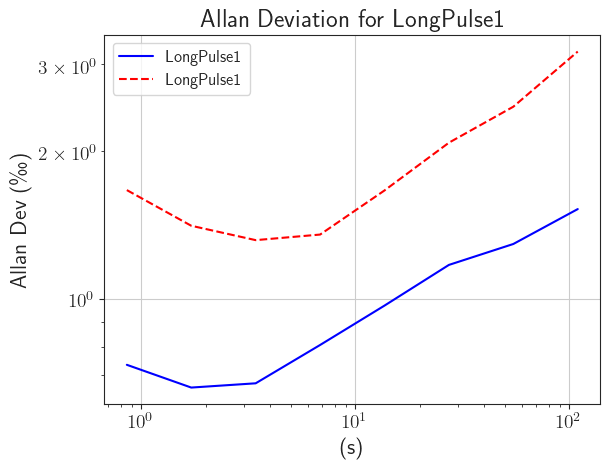

410
1.0688859690901789
3.90620815881122


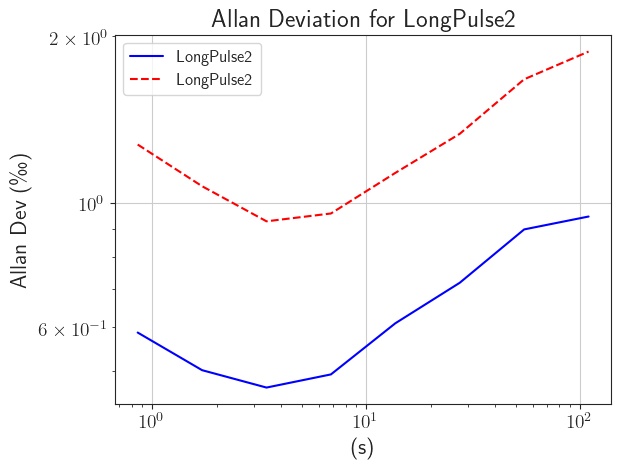

70
0.82784119153193
3.5119459094672045


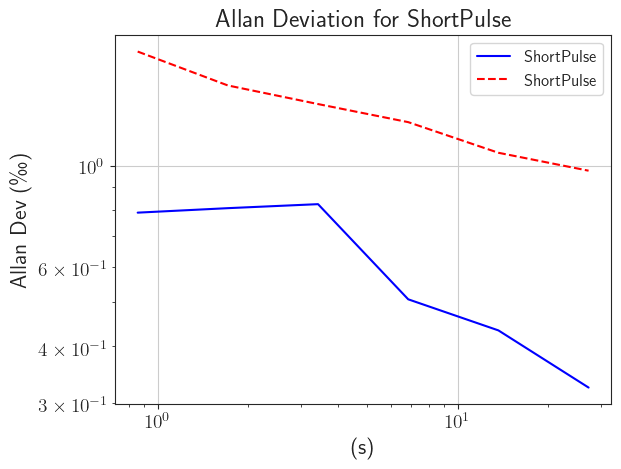

In [175]:
import pandas as pd
import allantools
import matplotlib.pyplot as plt

# Assuming df9_processed is already loaded with columns for 'Delta_18_16' and 'Delta_D_H'.
df = df7_processed.copy()

# Define the intervals with specific requirements for the time window.
df7_intervals = [
    ('2023-12-04 15:50:38', '2023-12-04 15:57:37', 'LongPulse1', ''),
    ('2023-12-04 16:01:12', '2023-12-04 16:08:08', 'LongPulse2', ''),
    ('2023-12-04 16:49:35', '2023-12-04 16:51:56', 'ShortPulse', ''),
]

# Process each interval with specified time adjustments.
for index, (start, end, label, comment) in enumerate(df7_intervals):
    start_time = pd.to_datetime(start).tz_localize('Europe/Paris')
    end_time = pd.to_datetime(end).tz_localize('Europe/Paris')

    # Adjust the pre_end_time based on the label or index
    if index < 2:  # First two intervals for 400 seconds
        pre_end_time = end_time - pd.Timedelta(seconds=350)
    else:  # Last interval for 60 seconds
        pre_end_time = end_time - pd.Timedelta(seconds=60)

    interval_data = df.loc[pre_end_time:end_time]

    if not interval_data.empty:
        # Extract δ^18O and δD data series
        data_series_d18O = interval_data['Delta_18_16'].values
        data_series_dD = interval_data['Delta_D_H'].values
        print(len(data_series_d18O))

        print(data_series_d18O.std(ddof=1))
        print(data_series_dD.std(ddof=1))

        # Compute Allan deviation for both series
        taus_d18O, adevs_d18O, errors_d18O, ns_d18O = allantools.oadev(data_series_d18O,  rate=1.17, data_type='freq')
        taus_dD, adevs_dD, errors_dD, ns_dD = allantools.oadev(data_series_dD, rate=1.17, data_type='freq')

        # Plotting Allan deviation for both isotopes in the same plot
        plt.figure()
        plt.loglog(taus_d18O, np.sqrt(adevs_d18O), 'b-', label=f'{label}', linewidth=1.5)
        plt.loglog(taus_dD, np.sqrt(adevs_dD), 'r--', label=f'{label}', linewidth=1.5)
        plt.xlabel(' (s)')
        plt.ylabel('Allan Dev (‰)')
        plt.title(f'Allan Deviation for {label}')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for interval {label}.")


In [176]:
df8_ice_intervals = [
    ( '2023-12-06 11:16:46', '2023-12-06 11:17:59', 'TETRIST 1', ''),
    ( '2023-12-06 11:21:34', '2023-12-06 11:22:50', 'TETRIST 2', ''),
    ( '2023-12-06 11:28:18', '2023-12-06 11:29:34', 'TETRIST 3', ''),
    ('2023-12-06 11:38:19', '2023-12-06 11:39:37', 'TETRIST 4', ''),
    ( '2023-12-06 11:43:02', '2023-12-06 11:44:23', 'TETRIST 5', ''),
    ( '2023-12-06 11:46:20', '2023-12-06 11:47:38', 'TETRIST 6', ''),
    ( '2023-12-06 11:51:56', '2023-12-06 11:53:13',  'TETRIST 7', ''),
    ( '2023-12-06 11:56:02', '2023-12-06 11:57:21',  'TETRIST 8', ''),
    ( '2023-12-06 11:59:06', '2023-12-06 12:00:24', 'TETRIST 9', ''),

    ( '2023-12-06 12:38:13', '2023-12-06 12:39:24', 'TETRIST 10', ''),
    ( '2023-12-06 12:41:04', '2023-12-06 12:42:21', 'TETRIST 11', ''),
    ( '2023-12-06 12:44:06', '2023-12-06 12:45:24', 'TETRIST 12', ''),
    ( '2023-12-06 12:47:25', '2023-12-06 12:48:40', 'TETRIST 13', ''),
    ( '2023-12-06 12:49:48', '2023-12-06 12:51:04', 'TETRIST 14', ''),
    ( '2023-12-06 12:52:40', '2023-12-06 12:53:59', 'TETRIST 15', ''),
    ( '2023-12-06 12:57:39', '2023-12-06 12:58:56', 'TETRIST 16', ''),
    ( '2023-12-06 13:00:54', '2023-12-06 13:02:14',  'TETRIST 17', ''),
    ( '2023-12-06 13:04:01', '2023-12-06 13:05:24', 'TETRIST 18', ''),
]

df8_ice_seconds = convert_intervals_to_seconds(df8_processed, df8_ice_intervals)


df9_ice_intervals = [
    ( '2023-12-07 15:58:59', '2023-12-07 16:00:20', 'TETRIST 1', ''),
    ( '2023-12-07 16:02:46', '2023-12-07 16:04:01', 'TETRIST 2', ''),
    ( '2023-12-07 16:05:46', '2023-12-07 16:07:01', 'TETRIST 3', ''),
    ( '2023-12-07 16:08:40', '2023-12-07 16:09:59', 'TETRIST 4', ''),
    ( '2023-12-07 16:11:32', '2023-12-07 16:12:48', 'TETRIST 5', ''),
    ( '2023-12-07 16:14:37', '2023-12-07 16:15:51',  'TETRIST 6', ''),
    ( '2023-12-07 16:20:05', '2023-12-07 16:21:22',  'TETRIST 7', ''),
    ( '2023-12-07 16:23:23', '2023-12-07 16:24:43',  'TETRIST 8', ''),
    ( '2023-12-07 16:26:22', '2023-12-07 16:27:45', 'TETRIST 9', ''),

]

df9_ice_seconds = convert_intervals_to_seconds(df9_processed, df9_ice_intervals)

# Plots for paper

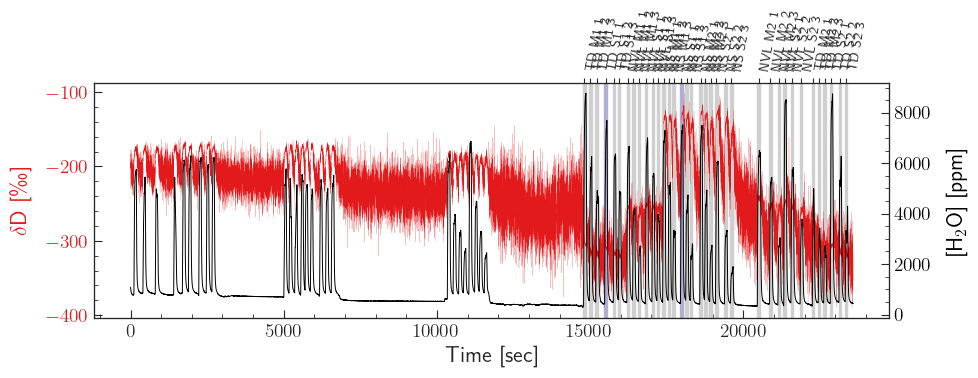

In [177]:


# Set seaborn style
sns.set_style("ticks")

# Function to set common tick parameters and grid
def set_common_ticks1(ax):
    ax.tick_params(axis='both', which='major', direction='in', length=6, right=False, top=False, bottom=True)
    ax.tick_params(axis='both', which='minor', direction='in', length=3, right=False, top=False, bottom=True)
    ax.minorticks_on()
    # ax.grid(which='major', color='#DDDDDD', linewidth=1)
    # ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)

def set_common_ticks2(ax):
    ax.tick_params(axis='both', which='major', direction='in', length=6, right=True, top=False, bottom=True)
    ax.tick_params(axis='both', which='minor', direction='in', length=3, right=True, top=False, bottom=True)
    ax.minorticks_on()



fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df8_processed['Seconds'], df8_processed['Delta_D_H'], color='#e31a1c', linewidth=0.1)#'#d31f11' #d62728 '#e41a1c'
ax.tick_params(axis='y', labelcolor='#e31a1c')
ax.set_ylabel(u'$\delta$D [‰]', color='#e31a1c', labelpad=10)


# Highlight intervals and annotate them
for start, end, id, role in df8_seconds:
    color = '#afaed4' if id in ['TD S1 1', 'NS S1 1'] else '#cfcfcf'  # Specific color for certain IDs #'#ff7c43'
    ax.axvspan(start, end, color=color, alpha=1)
    mid_point = (start + end) / 2
    label = f"{role}"
    # ax.text(mid_point, ax.get_ylim()[1] * 0.95, label, horizontalalignment='center', verticalalignment='top', fontsize=8, color='black', rotation=90)

# for start, end, id, role in df8_ice_seconds:
#     color = '#afaed4' if id in ['TD S1 1', 'NS S1 1'] else '#cfcfcf'  # Specific color for certain IDs #'#ff7c43'
#     ax.axvspan(start, end, color=color, alpha=1)
#     mid_point = (start + end) / 2
#     label = f"{role}"

# Water
ax3 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax3.set_ylabel('H2O', color='black')  # we already handled the x-label with ax1
ax3.plot(df8_processed['Seconds'], df8_processed['H2O'], color='black', linewidth=0.7)
ax3.tick_params(axis='y', labelcolor='black')
ax3.set_ylabel(u'[H$_2$O] [ppm]', color='black', labelpad=10)

set_common_ticks1(ax)
set_common_ticks2(ax3)


ax.set_xlabel('Time [sec]')

# Adjust secondary x-axis for role-based labels
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks([(start + end) / 2 for start, end, _, _ in df8_seconds])
ax2.set_xticklabels([id for _, _, id, _ in df8_seconds], rotation=80, ha='left', fontsize=10)


fig.tight_layout()
plt.show()

# Save the figure with adjusted layout
fig.savefig('data8_7.eps', format='eps', bbox_inches='tight')  # Adjusting bounding box to include all elements


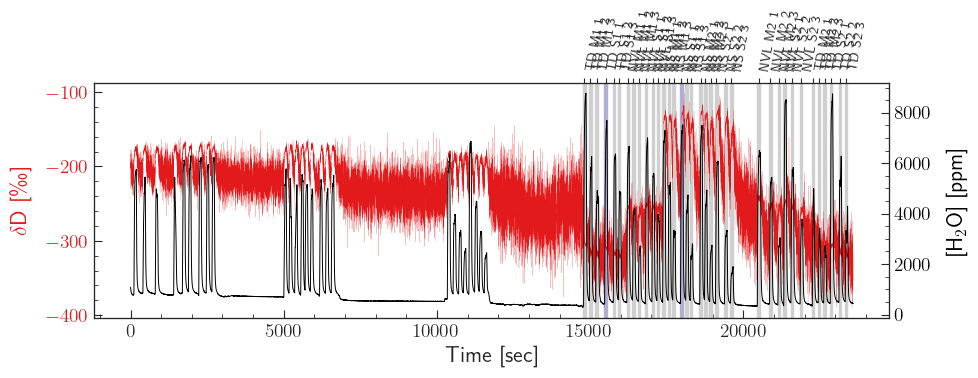

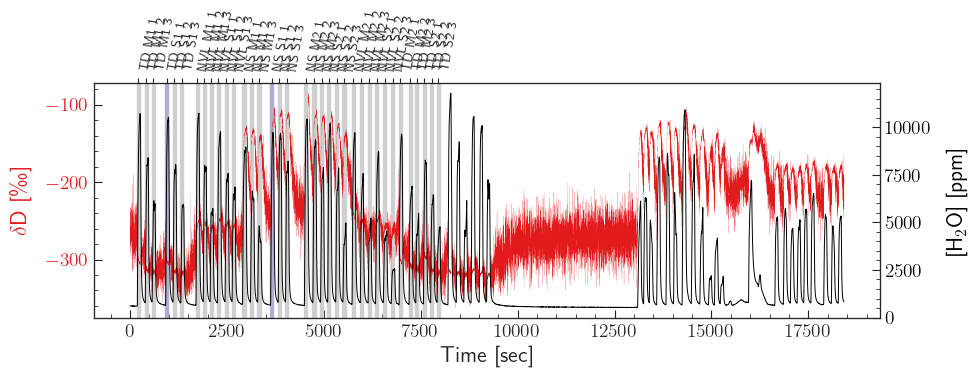

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("ticks")

def plot_data(df, intervals, filename):
    # Function to set common tick parameters and grid
    def set_common_ticks(ax, right=False):
        ax.tick_params(axis='both', which='major', direction='in', length=6, right=right, top=False, bottom=True)
        ax.tick_params(axis='both', which='minor', direction='in', length=3, right=right, top=False, bottom=True)
        ax.minorticks_on()

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(df['Seconds'], df['Delta_D_H'], color='#e31a1c', linewidth=0.1)
    ax.tick_params(axis='y', labelcolor='#e31a1c')
    ax.set_ylabel(u'$\delta$D [‰]', color='#e31a1c', labelpad=10)

    # Highlight intervals and annotate them
    for start, end, id, role in intervals:
        color = '#afaed4' if id in ['TD S1 1', 'NS S1 1'] else '#cfcfcf'  # Specific color for certain IDs
        ax.axvspan(start, end, color=color, alpha=1)


    # Water plot on twin axis
    ax3 = ax.twinx()
    ax3.plot(df['Seconds'], df['H2O'], color='black', linewidth=0.7)
    ax3.tick_params(axis='y', labelcolor='black')
    ax3.set_ylabel(u'[H$_2$O] [ppm]', color='black', labelpad=10)

    set_common_ticks(ax)
    set_common_ticks(ax3, right=True)

    ax.set_xlabel('Time [sec]')

    # Adjust secondary x-axis for role-based labels
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks([(start + end) / 2 for start, end, _, _ in intervals])
    ax2.set_xticklabels([id for _, _, id, _ in intervals], rotation=80, ha='left', fontsize=10)

    fig.tight_layout()
    plt.show()

    # Save the figure with adjusted layout
    fig.savefig(filename, format='eps', bbox_inches='tight')

# Example usage:
plot_data(df8_processed, df8_seconds, 'data8_7.eps')
plot_data(df9_processed, df9_seconds, 'data9_7.eps')


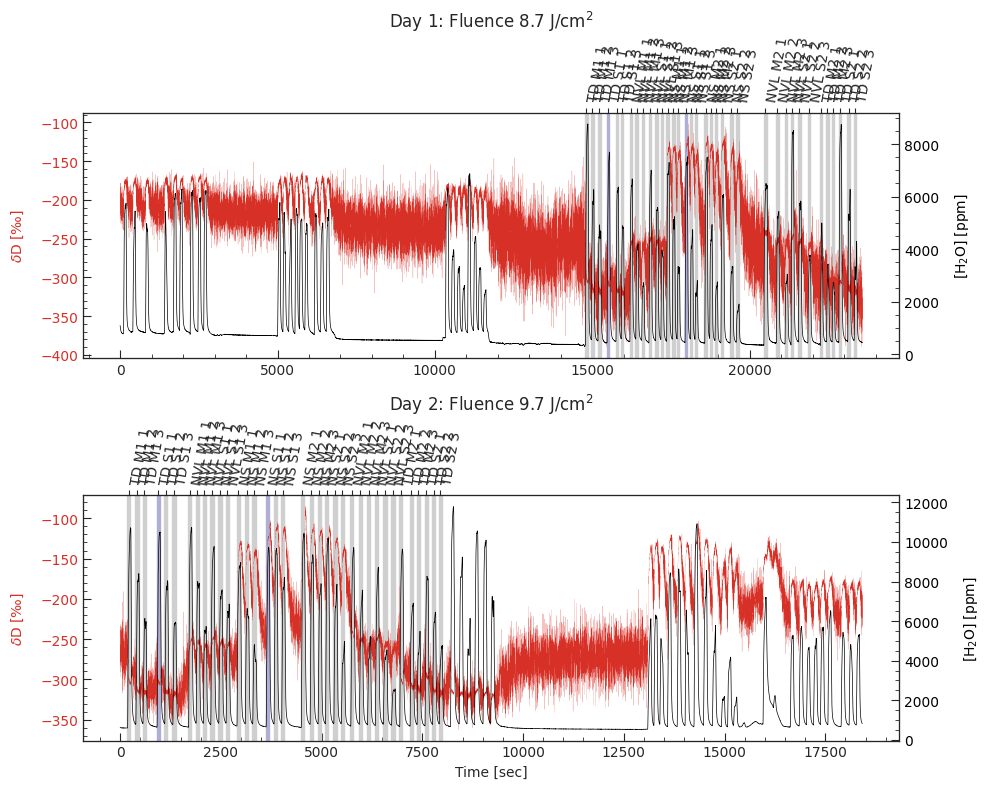

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("ticks")

def plot_combined_data(dfs, intervals, filename):
    def set_common_ticks(ax, right=False):
        ax.tick_params(axis='both', which='major', direction='in', length=6, right=right, top=False, bottom=True)
        ax.tick_params(axis='both', which='minor', direction='in', length=3, right=right, top=False, bottom=True)
        ax.minorticks_on()

    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
# Define titles and fluence levels
    titles = [u'Day 1: Fluence 8.7 J/cm$^{2}$', u'Day 2: Fluence 9.7 J/cm$^{2}$']
    for i, (df, interval) in enumerate(zip(dfs, intervals)):
        ax = axs[i]
        ax.plot(df['Seconds'], df['Delta_D_H'], color='#d73027', linewidth=0.1)
        ax.tick_params(axis='y', labelcolor='#d73027')
        ax.set_ylabel(u'$\delta$D [‰]', color='#d73027', labelpad=10)#'#e31a1c'
        ax.set_title(titles[i])

        # Highlight intervals and annotate them
        for start, end, id, role in interval:
            color = '#afaed4' if id in ['TD S1 1', 'NS S1 1'] else '#cfcfcf'  # Specific color for certain IDs
            ax.axvspan(start, end, color=color, alpha=1)

        # Water plot on twin axis
        ax3 = ax.twinx()
        ax3.plot(df['Seconds'], df['H2O'], color='black', linewidth=0.5)
        ax3.tick_params(axis='y', labelcolor='black')
        ax3.set_ylabel(u'[H$_2$O] [ppm]', color='black', labelpad=10)

        set_common_ticks(ax)
        set_common_ticks(ax3, right=True)

        if i == len(dfs) - 1:  # Only set x-label for the last subplot
            ax.set_xlabel('Time [sec]')

        # Adjust secondary x-axis for role-based labels
        ax2 = ax.twiny()
        ax2.set_xlim(ax.get_xlim())
        ax2.set_xticks([(start + end) / 2 for start, end, _, _ in interval])
        ax2.set_xticklabels([id for _, _, id, _ in interval], rotation=80, ha='left', fontsize=10)

    fig.tight_layout()
    plt.show()

    # Save the figure with adjusted layout
    fig.savefig(filename, format='eps', bbox_inches='tight')

# Example usage:
plot_combined_data([df8_processed, df9_processed], [df8_seconds, df9_seconds], 'combined_days_data.eps')


# Calibration Data Plots

In [ ]:


def create_calibration_dfs(df, intervals_seconds_with_ids):
    # Initialize separate DataFrames for each calibration ID
    dfs = {}

    # Filter and populate the DataFrames
    for start, end, id, role in intervals_seconds_with_ids:
        if role == 'Calibration':
            calibration_df = df[(df['Seconds'] >= start) & (df['Seconds'] <= end)].copy()
            calibration_df['ID'] = id
            dfs[id] = calibration_df

    return dfs

# Example usage for both DataFrames with their respective intervals:
df8_calibrations = create_calibration_dfs(df8_processed, df8_seconds)
df9_calibrations = create_calibration_dfs(df9_processed, df9_seconds)

# Display the results for specific IDs, ensuring they exist in the dictionary
print("Data for TD S1 1 in df8:")
print(df9_calibrations.get('TD S1 1', 'No data available'))

print("\nData for NS S1 1 in df9:")
print(df9_calibrations.get('NS S1 1', 'No data available'))


Data for TD S1 1 in df8:
                                           H2O  Delta_18_16   Delta_D_H  \
DATETIME                                                                  
2023-12-07 11:37:07.216000+01:00    648.120049   -38.813819 -330.576145   
2023-12-07 11:37:08.069000+01:00    644.422313   -32.745563 -303.433069   
2023-12-07 11:37:08.923000+01:00    644.556248   -35.578620 -276.934654   
2023-12-07 11:37:09.776000+01:00    643.502895   -31.815715 -254.829073   
2023-12-07 11:37:10.630000+01:00    648.350352   -41.569708 -296.604174   
...                                        ...          ...         ...   
2023-12-07 11:38:18.933000+01:00  10421.973373   -38.815318 -305.800333   
2023-12-07 11:38:19.786000+01:00  10428.447180   -38.543607 -305.756421   
2023-12-07 11:38:20.640000+01:00  10433.080678   -38.212027 -307.084320   
2023-12-07 11:38:21.493000+01:00  10445.353334   -38.606315 -306.700155   
2023-12-07 11:38:22.345000+01:00  10460.841951   -38.765567 -304.732372   


## Extented

In [ ]:
import pandas as pd

def create_calibration_dfs(df, intervals_seconds_with_ids):
    # Initialize separate DataFrames for each calibration ID
    dfs = {}

    # Filter and populate the DataFrames
    for start, end, id, role in intervals_seconds_with_ids:
        if role == 'Calibration':
            # Extend the end time by 30 seconds
            extended_end = end + 60
            calibration_df = df[(df['Seconds'] >= start) & (df['Seconds'] <= extended_end)].copy()
            calibration_df['ID'] = id
            dfs[id] = calibration_df

    return dfs

# Example usage for both DataFrames with their respective intervals:
# You'll need to define df8_processed, df9_processed, df8_seconds, and df9_seconds before running this script.
df8_calibrations = create_calibration_dfs(df8_processed, df8_seconds)
df9_calibrations = create_calibration_dfs(df9_processed, df9_seconds)

# Display the results for specific IDs, ensuring they exist in the dictionary
print("Data for TD S1 1 in df8:")
print(df9_calibrations.get('TD S1 1', 'No data available'))

print("\nData for NS S1 1 in df9:")
print(df9_calibrations.get('NS S1 1', 'No data available'))


Data for TD S1 1 in df8:
                                          H2O  Delta_18_16   Delta_D_H  \
DATETIME                                                                 
2023-12-07 11:37:07.216000+01:00   648.120049   -38.813819 -330.576145   
2023-12-07 11:37:08.069000+01:00   644.422313   -32.745563 -303.433069   
2023-12-07 11:37:08.923000+01:00   644.556248   -35.578620 -276.934654   
2023-12-07 11:37:09.776000+01:00   643.502895   -31.815715 -254.829073   
2023-12-07 11:37:10.630000+01:00   648.350352   -41.569708 -296.604174   
...                                       ...          ...         ...   
2023-12-07 11:39:19.532000+01:00  1431.809966   -39.162043 -296.953728   
2023-12-07 11:39:20.385000+01:00  1405.756368   -40.238171 -291.000430   
2023-12-07 11:39:21.239000+01:00  1382.629939   -42.334503 -286.232832   
2023-12-07 11:39:22.092000+01:00  1354.704375   -39.752917 -291.742310   
2023-12-07 11:39:22.946000+01:00  1334.013953   -40.456206 -304.564853   

            

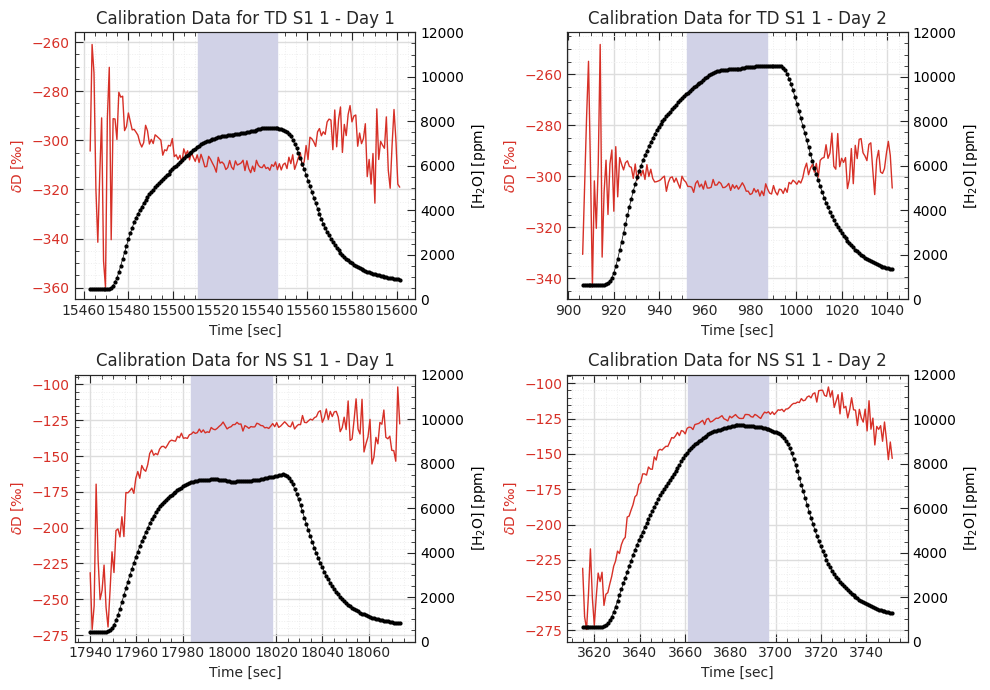

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("ticks")

def set_common_ticks(ax, right=False):
    ax.tick_params(axis='both', which='major', direction='in', length=6, right=right, top=True, bottom=True)
    ax.tick_params(axis='both', which='minor', direction='in', length=3, right=right, top=True, bottom=True)
    ax.minorticks_on()
    ax.grid(which='major', color='#DDDDDD', linewidth=1)
    ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)


def set_common_ticks(ax, right=False, no_grid=False):
    ax.tick_params(axis='both', which='major', direction='in', length=6, right=right, top=True, bottom=True)
    ax.tick_params(axis='both', which='minor', direction='in', length=3, right=right, top=True, bottom=True)
    ax.minorticks_on()
    if not no_grid:
        ax.grid(which='major', color='#DDDDDD', linewidth=1)
        ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)


def plot_on_axes(df, ax, title):
    if df.empty:
        print("No data to plot for:", title)
        return

    # Plot Delta_D_H on the given ax
    ax.plot(df['Seconds'], df['Delta_D_H'], color='#d73027', linewidth=1)
    ax.set_xlabel('Time [sec]')
    ax.set_ylabel(u'$\delta$D [‰]', color='#d73027')
    ax.tick_params(axis='y', labelcolor='#d73027')

    # Highlight the last 30 seconds in a different color
    ax.axvspan(df['Seconds'].max() - 90, df['Seconds'].max()-60, color='#d1d2e7', alpha=1)

    # Water plot on twin axis
    ax2 = ax.twinx()
    ax2.plot(df['Seconds'], df['H2O'], color='black', linewidth=0.5, marker='o', linestyle='-', markersize=2)
    ax2.set_ylabel(u'[H$_2$O] [ppm]', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.set_ylim(0, 12000)

 # Set common tick settings
    set_common_ticks(ax)
    set_common_ticks(ax2, right=True, no_grid=True)  # Disable grid on twin axes


    # Set subplot title
    ax.set_title(title)

def plot_calibration_data(dfs_with_titles):
    rows = 2  # Number of rows
    cols = len(dfs_with_titles) // rows + (len(dfs_with_titles) % rows > 0)  # Calculate columns required per row
    fig, axes = plt.subplots(rows, cols, figsize=(10, 7))
    axes = axes.flatten()  # Flatten if multiple axes

    for ax, (df, title) in zip(axes, dfs_with_titles):
        plot_on_axes(df, ax, title)

    # Hide unused subplots if any
    for ax in axes[len(dfs_with_titles):]:
        ax.set_visible(False)

    fig.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
    fig.savefig('calibration_data.eps', format='eps', bbox_inches='tight')

# Example usage: Adjust the following to match actual data preparation functions
# df8_calibrations = create_calibration_dfs(df8_processed, df8_seconds)
# df9_calibrations = create_calibration_dfs(df9_processed, df9_seconds)

plot_calibration_data([
    (df8_calibrations.get('TD S1 1', pd.DataFrame()), 'Calibration Data for TD S1 1 - Day 1'),
    (df9_calibrations.get('TD S1 1', pd.DataFrame()), 'Calibration Data for TD S1 1 - Day 2'),
    (df8_calibrations.get('NS S1 1', pd.DataFrame()), 'Calibration Data for NS S1 1 - Day 1'),
    (df9_calibrations.get('NS S1 1', pd.DataFrame()), 'Calibration Data for NS S1 1 - Day 2')
])


# Calibration Sets

In [ ]:
def create_calibration_dfs(df, intervals_seconds_with_ids, calibration_ids):
    # Initialize separate DataFrames for each calibration ID
    dfs = {}

    # Filter and populate the DataFrames based on calibration_ids
    for start, end, id, role in intervals_seconds_with_ids:
        if id in calibration_ids:
            calibration_df = df[(df['Seconds'] >= start) & (df['Seconds'] <= end)].copy()
            calibration_df['ID'] = id
            dfs[id] = calibration_df

    return dfs

def set_calibration_role(df_seconds, calibration_ids):
    # Create a modified version of df_seconds with updated roles
    modified_seconds = []
    for start, end, id, role in df_seconds:
        if id in calibration_ids:
            modified_seconds.append((start, end, id, 'Calibration'))
        else:
            modified_seconds.append((start, end, id, role))
    return modified_seconds


def extract_last_30_seconds(df):
    if df.empty:
        return None  # Return None if the DataFrame is empty

    # Calculate the last 30 seconds range
    end_seconds = df['Seconds'].max()
    start_seconds = max(df['Seconds'].min(), end_seconds - 30)  # Ensure it does not go below the start of the data

    # Filter the DataFrame to only include the last 30 seconds
    return df[(df['Seconds'] >= start_seconds) & (df['Seconds'] <= end_seconds)]

def calculate_stats(df):
    """ Calculate mean and standard deviation for H2O, Delta_18_16, and Delta_D_H. """
    means = df[['H2O', 'Delta_18_16', 'Delta_D_H']].mean()
    stds = df[['H2O', 'Delta_18_16', 'Delta_D_H']].std()
    stats_df = pd.DataFrame({
        'Mean H2O': [means['H2O']],
        'Std H2O': [stds['H2O']],
        'Mean Delta_18_16': [means['Delta_18_16']],
        'Std Delta_18_16': [stds['Delta_18_16']],
        'Mean Delta_D_H': [means['Delta_D_H']],
        'Std Delta_D_H': [stds['Delta_D_H']]
    })
    return stats_df.reset_index(drop=True)


def process_and_calculate_stats(df_processed, df_seconds, calibration_ids):
    # Create calibration dataframes
    calibrations = create_calibration_dfs(df_processed, df_seconds, calibration_ids)

    # Extract last 30 seconds from each calibration DataFrame
    last_30_seconds_data = {key: extract_last_30_seconds(df) for key, df in calibrations.items()}

    # Calculate statistics for the last 30 seconds of each calibration segment
    stats_data = {key: calculate_stats(df) for key, df in last_30_seconds_data.items() if df is not None}

    # Combine stats into a single DataFrame for easy viewing
    final_stats_df = pd.concat(stats_data.values(), keys=stats_data.keys(), names=['Calibration ID', 'Index']).reset_index(level='Index', drop=True)

    return final_stats_df



def calculate_coefficients(stats_df, calibration_ids, true_values):
    coefficients = {}
    for isotope in ['Delta_18_16', 'Delta_D_H']:  # Isotopes handled
        for cal_id in calibration_ids:  # Iterating through each calibration ID
            if cal_id in stats_df.index:
                x_cal = stats_df.loc[cal_id, f'Mean {isotope}']
                # Correcting isotope key extraction
                iso_key = 'd18' if '18' in isotope else 'dD'
                y_cal = true_values[cal_id.split()[0]][iso_key]  # Correct key based on iso_key

                # Ensure calculations only proceed if there's more than one calibration point
                if isotope not in coefficients:
                    coefficients[isotope] = {'Slope': 0, 'Intercept': 0, 'last_x': x_cal, 'last_y': y_cal}
                else:
                    # Calculating differences
                    x_diff = x_cal - coefficients[isotope]['last_x']
                    y_diff = y_cal - coefficients[isotope]['last_y']

                    # Avoid division by zero
                    if x_diff != 0:
                        slope = y_diff / x_diff
                        intercept = y_cal - (slope * x_cal)
                        coefficients[isotope]['Slope'] = slope
                        coefficients[isotope]['Intercept'] = intercept

                    # Update last values
                    coefficients[isotope]['last_x'] = x_cal
                    coefficients[isotope]['last_y'] = y_cal

    # Cleaning up the dictionary to remove last_x and last_y before returning
    for key in list(coefficients.keys()):
        del coefficients[key]['last_x']
        del coefficients[key]['last_y']

    return coefficients


def display_coefficients(coefficients):
    for isot, vals in coefficients.items():
        print(f"{isot} Calibration: Slope (a) = {vals['Slope']:.2f}, Intercept (b) = {vals['Intercept']:.2f}")




def apply_calibration(df, coefficients):
    # Check if the DataFrame is empty or coefficients are missing
    if df.empty or not coefficients:
        return df

    # Apply the calibration formula to the respective columns
    df['Delta_18_16_cal'] = df['Delta_18_16'] * coefficients['Delta_18_16']['Slope'] + coefficients['Delta_18_16']['Intercept']
    df['Delta_D_H_cal'] = df['Delta_D_H'] * coefficients['Delta_D_H']['Slope'] + coefficients['Delta_D_H']['Intercept']

    return df



def analyze_intervals(df, intervals_seconds_with_ids, true_values):
    results_df = pd.DataFrame()  # Initialize an empty DataFrame for results

    # Process each interval
    for start, end, ID, _ in intervals_seconds_with_ids:
        last_30_start = max(start, end - 30)  # Last 30 seconds of the interval
        mask = (df['Seconds'] >= last_30_start) & (df['Seconds'] <= end)
        interval_data = df.loc[mask]

        # Calculate means and standard deviations
        mean_h2o = interval_data['H2O'].mean()
        std_h2o = interval_data['H2O'].std()
        mean_delta_18_16 = interval_data['Delta_18_16_cal'].mean()
        std_delta_18_16 = interval_data['Delta_18_16_cal'].std()
        mean_delta_d_h = interval_data['Delta_D_H_cal'].mean()
        std_delta_d_h = interval_data['Delta_D_H_cal'].std()

        # Determine sample type from ID and calculate accuracy for both isotopes
        sample_type = ID.split()[0]  # Extract 'TD', 'NS', or 'NVL' from the ID
        accuracy_d18 = true_values[sample_type]['d18'] - mean_delta_18_16
        accuracy_dD = true_values[sample_type]['dD'] - mean_delta_d_h

        # Append results to the DataFrame
        new_row = pd.DataFrame({
            'ID': [ID],
            'Mean H2O': [mean_h2o],
            'Std H2O': [std_h2o],
            'Mean Delta_18_16': [mean_delta_18_16],
            'Std Delta_18_16': [std_delta_18_16],
            'Mean Delta_D_H': [mean_delta_d_h],
            'Std Delta_D_H': [std_delta_d_h],
            'Accuracy Delta_18_16': [accuracy_d18],
            'Accuracy Delta_D_H': [accuracy_dD]
        })
        results_df = pd.concat([results_df, new_row], ignore_index=True)

    return results_df

# True values for calibration as previously specified
true_values = {
    'TD': {'d18': -38.82, 'dD': -307.00},
    'NS': {'d18': -15.36, 'dD': -112.62},
    'NVL': {'d18': -31.15, 'dD': -240.02}
}



def calculate_overall_metrics(results_df):
    # Calculate the mean of the standard deviations for each isotope (precision measure)
    precision_d18 = results_df['Std Delta_18_16'].mean()
    precision_dD = results_df['Std Delta_D_H'].mean()

    # Calculate the mean of the accuracies for each isotope (accuracy measure)
    accuracy_d18 = results_df['Accuracy Delta_18_16'].mean()
    accuracy_dD = results_df['Accuracy Delta_D_H'].mean()

    # Create a DataFrame to display these results
    metrics_df = pd.DataFrame({
        'Isotope': ['Delta_18_16', 'Delta_D_H'],
        'Mean Precision (std dev)': [precision_d18, precision_dD],
        'Mean Accuracy': [accuracy_d18, accuracy_dD]
    })

    return metrics_df







calibration_ids = ['TD S1 1', 'NS S1 1']


df8_calibrations = create_calibration_dfs(df8_processed, df8_seconds, calibration_ids)
df9_calibrations = create_calibration_dfs(df9_processed, df9_seconds, calibration_ids)
modified_seconds = set_calibration_role(df9_seconds, calibration_ids)




final_stats_df9 = process_and_calculate_stats(df9_processed, modified_seconds, calibration_ids)
coefficients_df9 = calculate_coefficients(final_stats_df9, calibration_ids, true_values)
display_coefficients(coefficients_df9)


# Calibrate df9_processed
df9_calibrated = apply_calibration(df9_processed, coefficients_df9)

print("\nCalibrated df9_processed:")
print(df9_calibrated.head())


results_df9 = analyze_intervals(df9_processed, df9_seconds, true_values)
print("\nFinal Statistics and Accuracies for df9:")
print(results_df9)



results_df9 = analyze_intervals(df9_processed, df9_seconds, true_values)
metrics_df9 = calculate_overall_metrics(results_df9)
print("\nOverall Metrics for df9:")
print(metrics_df9)




Delta_18_16 Calibration: Slope (a) = 0.98, Intercept (b) = -1.44
Delta_D_H Calibration: Slope (a) = 1.09, Intercept (b) = 23.99

Calibrated df9_processed:
                                         H2O  Delta_18_16   Delta_D_H  \
DATETIME                                                                
2023-12-07 11:22:00.769000+01:00  617.665947   -31.307238 -296.662260   
2023-12-07 11:22:01.622000+01:00  614.146810   -25.912771 -257.986673   
2023-12-07 11:22:02.476000+01:00  616.540248   -30.240096 -286.559672   
2023-12-07 11:22:03.329000+01:00  615.114306   -25.446713 -238.505817   
2023-12-07 11:22:04.183000+01:00  615.859866   -28.517917 -275.300486   

                                  Seconds  Delta_18_16_cal  Delta_D_H_cal  
DATETIME                                                                   
2023-12-07 11:22:00.769000+01:00    0.000       -31.977530    -299.059180  
2023-12-07 11:22:01.622000+01:00    0.853       -26.715614    -256.944113  
2023-12-07 11:22:02.476000+01

In [ ]:
def evaluate_calibration_sets(df, df_seconds, calibration_sets, true_values):
    results = {}

    for calibration_ids in calibration_sets:
        # Set calibration role for the current set
        modified_seconds = set_calibration_role(df_seconds, calibration_ids)

        # Process and calculate statistics
        final_stats_df = process_and_calculate_stats(df, modified_seconds, calibration_ids)

        # Calculate calibration coefficients
        coefficients = calculate_coefficients(final_stats_df, calibration_ids, true_values)

        # Apply calibration
        df_calibrated = apply_calibration(df, coefficients)

        # Analyze intervals to determine performance metrics
        results_df = analyze_intervals(df_calibrated, modified_seconds, true_values)

        # Calculate overall metrics
        metrics = calculate_overall_metrics(results_df)

        # Store results keyed by calibration ID set for comparison
        results[str(calibration_ids)] = metrics

    return results


In [ ]:
# True values must be defined as per your specific calibration needs
true_values = {
    'TD': {'d18': -38.82, 'dD': -307.00},
    'NS': {'d18': -15.36, 'dD': -112.62},
    'NVL': {'d18': -31.15, 'dD': -240.02}
}

# Calibration sets to be evaluated
calibration_sets = [
    ['TD M1 1', 'NS M1 1'],
    ['TD M1 2', 'NS M1 2'],
    ['TD S1 1', 'NS S1 1'],
    ['TD S1 2', 'NS S1 2'],
    ['TD M2 1', 'NS M2 1'],
    ['TD M2 2', 'NS M2 2'],
    ['TD S2 1', 'NS S2 1'],
    ['TD S2 2', 'NS S2 2']
]

# Evaluate calibration sets for df9 (example)
results_df9 = evaluate_calibration_sets(df9_processed, df9_seconds, calibration_sets, true_values)
results_df8 = evaluate_calibration_sets(df8_processed, df8_seconds, calibration_sets, true_values)

# # Print results for each set
# for key, value in results_df9.items():
#     print(f"Results for calibration set {key}:")
#     print(value)
#     print("\n")


NameError: name 'evaluate_calibration_sets' is not defined

In [ ]:
# Define the LaTeX table structure
latex_table = """
\\begin{table}[H]
\\centering
\\tbl{Calibration Sets - Fluence 8.7 $J/cm^{2}$}
\\begin{tabular}{llrr}
\\toprule
Calibration Set & Isotope & Mean std & Mean Dev \\\\
\\midrule
"""

# Iterating over the dictionary to populate the table
for key, df in results_df8.items():
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        isotope_label = "$\\delta^{18}$" if "18" in row['Isotope'] else "$\\delta D$"
        latex_table += f"{key} & {isotope_label} & {row['Mean Precision (std dev)']:.6f} & {row['Mean Accuracy']:.6f} \\\\\n"
        # if index < len(df) - 1:
        #     latex_table += "\\cline{2-4}\n"

    # Add space between sets
    latex_table += "\\midrule\n"

# Closing the table structure
latex_table += """
\\bottomrule
\\end{tabular}
\\label{tab:nvlpeakresults}
\\end{table}
"""

# Output the LaTeX table text
print(latex_table)



\begin{table}[H]
\centering
\tbl{Calibration Sets - Fluence 8.7 $J/cm^{2}$}
\begin{tabular}{llrr}
\toprule
Calibration Set & Isotope & Mean std & Mean Dev \\
\midrule
['TD M1 1', 'NS M1 1'] & $\delta^{18}$ & 0.542715 & 0.135457 \\
['TD M1 1', 'NS M1 1'] & $\delta D$ & 3.226889 & 6.256395 \\
\midrule
['TD M1 2', 'NS M1 2'] & $\delta^{18}$ & 0.526447 & -0.215331 \\
['TD M1 2', 'NS M1 2'] & $\delta D$ & 2.999002 & -0.951239 \\
\midrule
['TD S1 1', 'NS S1 1'] & $\delta^{18}$ & 0.524285 & -0.073847 \\
['TD S1 1', 'NS S1 1'] & $\delta D$ & 3.034439 & 4.974580 \\
\midrule
['TD S1 2', 'NS S1 2'] & $\delta^{18}$ & 0.518874 & -0.243480 \\
['TD S1 2', 'NS S1 2'] & $\delta D$ & 2.959458 & -1.424898 \\
\midrule
['TD M2 1', 'NS M2 1'] & $\delta^{18}$ & 0.631807 & 2.500067 \\
['TD M2 1', 'NS M2 1'] & $\delta D$ & 3.406045 & 20.797341 \\
\midrule
['TD M2 2', 'NS M2 2'] & $\delta^{18}$ & 0.563156 & 0.802494 \\
['TD M2 2', 'NS M2 2'] & $\delta D$ & 3.102558 & 5.205697 \\
\midrule
['TD S2 1', 'NS S2 1']

#**Calibration**

In [ ]:



def create_calibration_dfs(df, intervals_seconds_with_ids):
    # Initialize separate DataFrames for each calibration ID
    dfs = {}

    # Filter and populate the DataFrames
    for start, end, id, role in intervals_seconds_with_ids:
        if role == 'Calibration':
            calibration_df = df[(df['Seconds'] >= start) & (df['Seconds'] <= end)].copy()
            calibration_df['ID'] = id
            # print(id)
            dfs[id] = calibration_df

    return dfs

def extract_last_30_seconds(df):
    if df.empty:
        return None  # Return None if the DataFrame is empty

    # Calculate the last 30 seconds range
    end_seconds = df['Seconds'].max()
    # print(end_seconds)
    start_seconds = max(df['Seconds'].min(), end_seconds - 30)  # Ensure it does not go below the start of the data
    # print(end_seconds-start_seconds)
    # Filter the DataFrame to only include the last 30 seconds
    return df[(df['Seconds'] >= start_seconds) & (df['Seconds'] <= end_seconds)]
    # print(df.shape[0])

def calculate_stats(df):
    """ Calculate mean and standard deviation for H2O, Delta_18_16, and Delta_D_H. """
    means = df[['H2O', 'Delta_18_16', 'Delta_D_H']].mean()
    stds = df[['H2O', 'Delta_18_16', 'Delta_D_H']].std(ddof=1)
    stats_df = pd.DataFrame({
        'Mean H2O': [means['H2O']],
        'Std H2O': [stds['H2O']],
        'Mean Delta_18_16': [means['Delta_18_16']],
        'Std Delta_18_16': [stds['Delta_18_16']],
        'Mean Delta_D_H': [means['Delta_D_H']],
        'Std Delta_D_H': [stds['Delta_D_H']]
    })
    return stats_df.reset_index(drop=True)


def process_and_calculate_stats(df_processed, df_seconds):
    # Create calibration dataframes
    calibrations = create_calibration_dfs(df_processed, df_seconds)


    # Extract last 30 seconds from each calibration DataFrame
    last_30_seconds_data = {key: extract_last_30_seconds(df) for key, df in calibrations.items()}
    # print(len(last_30_seconds_data))

    # Calculate statistics for the last 30 seconds of each calibration segment
    stats_data = {key: calculate_stats(df) for key, df in last_30_seconds_data.items() if df is not None}

    # Combine stats into a single DataFrame for easy viewing
    final_stats_df = pd.concat(stats_data.values(), keys=stats_data.keys(), names=['Calibration ID', 'Index']).reset_index(level='Index', drop=True)

    return final_stats_df


# Apply the processing to both df8 and df9
final_stats_df8 = process_and_calculate_stats(df8_processed, df8_seconds)
final_stats_df9 = process_and_calculate_stats(df9_processed, df9_seconds)

# Display the results for both DataFrames
print("Final Statistics for df8:")
print(final_stats_df8)
print("\nFinal Statistics for df9:")
print(final_stats_df9)


def calculate_coefficients(stats_df, true_values):
    coefficients = {}
    for isotope, iso_key in zip(['Delta_18_16', 'Delta_D_H'], ['d18', 'dD']):
        # Calculating for TD
        x_TD = stats_df.loc['TD S1 1', f'Mean {isotope}']
        y_TD = true_values['TD'][iso_key]

        # Calculating for NS
        x_NS = stats_df.loc['NS S1 1', f'Mean {isotope}']
        y_NS = true_values['NS'][iso_key]

        # Coefficient calculation
        a, b = (y_NS - y_TD) / (x_NS - x_TD), y_TD - (y_NS - y_TD) / (x_NS - x_TD) * x_TD
        coefficients[isotope] = {'Slope': a, 'Intercept': b}

    return coefficients

def display_coefficients(coefficients):
    for isot, vals in coefficients.items():
        print(f"{isot} Calibration: Slope (a) = {vals['Slope']:.2f}, Intercept (b) = {vals['Intercept']:.2f}")



# True values for calibration
true_values = {
    'TD': {'d18': -38.82, 'dD': -307.00},
    'NS': {'d18': -15.36, 'dD': -112.62}
}

# Apply the coefficient calculation to df8 and df9
coefficients_df8 = calculate_coefficients(final_stats_df8, true_values)
coefficients_df9 = calculate_coefficients(final_stats_df9, true_values)

# Output results for both data sets
print("Coefficients for df8:")
display_coefficients(coefficients_df8)

print("\nCoefficients for df9:")
display_coefficients(coefficients_df9)



def apply_calibration(df, coefficients):
    if df.empty or not coefficients:
        return df

    # Make a copy to ensure changes do not affect the original unexpectedly
    df = df.copy()

    # Apply the calibration formula to the respective columns
    df['Delta_18_16_cal'] = df['Delta_18_16'] * coefficients['Delta_18_16']['Slope'] + coefficients['Delta_18_16']['Intercept']
    df['Delta_D_H_cal'] = df['Delta_D_H'] * coefficients['Delta_D_H']['Slope'] + coefficients['Delta_D_H']['Intercept']

    return df



# Calibrate df8_processed
df8_calibrated = apply_calibration(df8_processed, coefficients_df8)

# Calibrate df9_processed
df9_calibrated = apply_calibration(df9_processed, coefficients_df9)

# Optionally display the first few rows to inspect the results
print("Calibrated df8_processed:")
print(df8_calibrated.head())

print("\nCalibrated df9_processed:")
print(df9_calibrated.head())




Final Statistics for df8:
                   Mean H2O     Std H2O  Mean Delta_18_16  Std Delta_18_16  \
Calibration ID                                                               
TD S1 1         7374.373484  212.905474        -39.334970         0.302412   
NS S1 1         7247.340516   35.304759        -15.755564         0.361172   

                Mean Delta_D_H  Std Delta_D_H  
Calibration ID                                 
TD S1 1            -309.891088       1.838190  
NS S1 1            -130.330010       2.349146  

Final Statistics for df9:
                    Mean H2O     Std H2O  Mean Delta_18_16  Std Delta_18_16  \
Calibration ID                                                                
TD S1 1         10087.820525  374.235847        -38.322074         0.357730   
NS S1 1          9437.097530  333.189008        -14.271103         0.301077   

                Mean Delta_D_H  Std Delta_D_H  
Calibration ID                                 
TD S1 1            -303.95456

In [ ]:
# calibrations = create_calibration_dfs(df8_processed, df8_seconds)
# specific_df = calibrations['TD S1 1']
# analysis['Delta_18_16'].std(ddof=1)
# print(extract_last_30_seconds(specific_df).shape[0])
# analysis= extract_last_30_seconds(specific_df)
# d=calculate_stats(analysis)
# d

TD S1 1
NS S1 1


0.3024118964819733

In [ ]:
import pandas as pd

def extract_last_30_seconds(df):
    if df.empty:
        return None  # Return None if the DataFrame is empty

    # Calculate the last 30 seconds range
    end_seconds = df['Seconds'].max()
    start_seconds = max(df['Seconds'].min(), end_seconds - 30)  # Ensure it does not go below the start of the data

    # Filter the DataFrame to only include the last 30 seconds
    filtered_df = df[(df['Seconds'] >= start_seconds) & (df['Seconds'] <= end_seconds)]

    # Check for duplicates
    duplicates = filtered_df.duplicated(subset=['Seconds'], keep=False)
    if duplicates.any():
        print("Warning: Duplicate timestamps found in the last 30 seconds interval.")
        print(filtered_df[duplicates])

    return filtered_df

# Assume df8_processed is already defined and loaded
df = extract_last_30_seconds(df8_processed)
print("Number of rows in the last 30 seconds:", df.shape[0])


Number of rows in the last 30 seconds: 36


In [ ]:
import pandas as pd
import numpy as np

def extract_last_30_seconds(df):
    if df.empty:
        return None  # Return None if the DataFrame is empty

    # Calculate the last 30 seconds range
    end_seconds = df['Seconds'].max()
    start_seconds = max(df['Seconds'].min(), end_seconds - 30)  # Ensure it does not go below the start of the data

    # Filter the DataFrame to only include the last 30 seconds
    filtered_df = df[(df['Seconds'] >= start_seconds) & (df['Seconds'] <= end_seconds)]

    # Remove duplicate timestamps
    filtered_df = filtered_df[~filtered_df.index.duplicated(keep='first')]

    return filtered_df

# Assume df8_processed is already defined and loaded
df = extract_last_30_seconds(df8_processed)
if df is not None:
    print("Number of rows in the last 30 seconds:", df.shape[0])

    # Calculate the actual time period in seconds
    actual_duration_seconds = (df['Seconds'].max() - df['Seconds'].min())
    print("Actual duration in seconds:", actual_duration_seconds)

    # Calculate the number of data points
    number_of_data_points = len(df)
    print("Number of data points in the last 30 seconds:", number_of_data_points)

    # Calculate the sampling rate
    if number_of_data_points > 1:
        time_diffs = df['Seconds'].diff().dropna()
        mean_interval_seconds = time_diffs.mean()
        sampling_rate_hz = 1 / mean_interval_seconds
    else:
        sampling_rate_hz = 0  # Not enough data points to calculate sampling rate

    print("Calculated sampling rate in the last 30 seconds:", sampling_rate_hz, "Hz")

    # Optional: Display the new DataFrame
    print("New DataFrame with the last 30 seconds of data:")
    print(df)
else:
    print("The DataFrame is empty or the last 30 seconds could not be extracted.")


Number of rows in the last 30 seconds: 36
Actual duration in seconds: 29.868999999998778
Number of data points in the last 30 seconds: 36
Calculated sampling rate in the last 30 seconds: 1.1717834544176715 Hz
New DataFrame with the last 30 seconds of data:
                                         H2O  Delta_18_16   Delta_D_H  \
DATETIME                                                                
2023-12-06 17:47:30.009000+01:00  455.770101   -35.379057 -352.294777   
2023-12-06 17:47:30.862000+01:00  455.865748   -33.261612 -318.382336   
2023-12-06 17:47:31.716000+01:00  453.163499   -31.458905 -340.961073   
2023-12-06 17:47:32.569000+01:00  454.218430   -33.965385 -326.929274   
2023-12-06 17:47:33.423000+01:00  456.930254   -39.737348 -272.941701   
2023-12-06 17:47:34.276000+01:00  453.074787   -32.521615 -288.618038   
2023-12-06 17:47:35.130000+01:00  453.157055   -33.035339 -304.835664   
2023-12-06 17:47:35.983000+01:00  453.659323   -31.102468 -344.614340   
2023-12-06 17

In [ ]:
def analyze_intervals(df, intervals_seconds_with_ids, true_values):
    results_df = pd.DataFrame()  # Initialize an empty DataFrame for results

    # Process each interval
    for start, end, ID, _ in intervals_seconds_with_ids:
        last_30_start = max(start, end - 30)  # Last 30 seconds of the interval
        mask = (df['Seconds'] >= last_30_start) & (df['Seconds'] <= end)
        interval_data = df.loc[mask]

        # Calculate means and standard deviations
        mean_h2o = interval_data['H2O'].mean()
        std_h2o = interval_data['H2O'].std(ddof=1)
        mean_delta_18_16 = interval_data['Delta_18_16_cal'].mean()
        std_delta_18_16 = interval_data['Delta_18_16_cal'].std(ddof=1)
        mean_delta_d_h = interval_data['Delta_D_H_cal'].mean()
        std_delta_d_h = interval_data['Delta_D_H_cal'].std(ddof=1)

        # Determine sample type from ID and calculate accuracy for both isotopes
        sample_type = ID.split()[0]  # Extract 'TD', 'NS', or 'NVL' from the ID
        accuracy_d18 = true_values[sample_type]['d18'] - mean_delta_18_16
        accuracy_dD = true_values[sample_type]['dD'] - mean_delta_d_h

        # Append results to the DataFrame
        new_row = pd.DataFrame({
            'ID': [ID],
            'Mean H2O': [mean_h2o],
            'Std H2O': [std_h2o],
            'Mean Delta_18_16': [mean_delta_18_16],
            'Std Delta_18_16': [std_delta_18_16],
            'Mean Delta_D_H': [mean_delta_d_h],
            'Std Delta_D_H': [std_delta_d_h],
            'Accuracy Delta_18_16': [accuracy_d18],
            'Accuracy Delta_D_H': [accuracy_dD]
        })
        results_df = pd.concat([results_df, new_row], ignore_index=True)

    return results_df

# True values for calibration as previously specified
true_values = {
    'TD': {'d18': -38.82, 'dD': -307.00},
    'NS': {'d18': -15.36, 'dD': -112.62},
    'NVL': {'d18': -31.15, 'dD': -240.02},
    'TETRIST': {'d18': -21.34, 'dD': -165.4}
}



# Analyze intervals for both dataframes
results_df8_r = analyze_intervals(df8_calibrated, df8_seconds, true_values)
results_df9_r = analyze_intervals(df9_calibrated, df9_seconds, true_values)

# Print the resulting DataFrames
print("Final Statistics and Accuracies for df8:")
print(results_df8_r)
print("\nFinal Statistics and Accuracies for df9:")
print(results_df9_r)


Final Statistics and Accuracies for df8:
          ID     Mean H2O     Std H2O  Mean Delta_18_16  Std Delta_18_16  \
0    TD M1 1  8480.504129  224.796747        -38.262907         0.359722   
1    TD M1 2  5822.770044  142.127485        -38.917450         0.455123   
2    TD M1 3  4605.293698  146.229002        -38.910131         0.606161   
3    TD S1 1  7374.373484  212.905474        -38.820000         0.300880   
4    TD S1 2  6242.052341   57.657594        -39.108274         0.391294   
5    TD S1 3  4816.656640   42.451153        -39.076481         0.498220   
6   NVL M1 1  6403.974420   67.192547        -31.192593         0.371647   
7   NVL M1 2  4045.436067   51.541051        -31.511759         0.578490   
8   NVL M1 3  2624.686214   50.577607        -31.335998         0.782953   
9   NVL S1 1  6737.765308  146.673007        -31.238230         0.313735   
10  NVL S1 2  5520.285912   47.549733        -31.335977         0.371288   
11  NVL S1 3  3802.983140   62.881892        -3

In [ ]:
import pandas as pd

def analyze_intervals(df, intervals_seconds_with_ids, true_values):
    results_df = pd.DataFrame()  # Initialize an empty DataFrame for results

    # Process each interval
    for start, end, ID, _ in intervals_seconds_with_ids:
        last_30_start = max(start, end - 30)  # Last 30 seconds of the interval
        mask = (df['Seconds'] >= last_30_start) & (df['Seconds'] <= end)
        interval_data = df.loc[mask]

        # Calculate means and standard deviations
        mean_h2o = interval_data['H2O'].mean()
        std_h2o = interval_data['H2O'].std(ddof=1)
        mean_delta_18_16 = interval_data['Delta_18_16_cal'].mean()
        std_delta_18_16 = interval_data['Delta_18_16_cal'].std(ddof=1)
        mean_delta_d_h = interval_data['Delta_D_H_cal'].mean()
        std_delta_d_h = interval_data['Delta_D_H_cal'].std(ddof=1)

        # Determine sample type from ID and calculate accuracy for both isotopes
        sample_type = ID.split()[0]  # Extract 'TD', 'NS', or 'NVL' from the ID
        accuracy_d18 = true_values[sample_type]['d18'] - mean_delta_18_16
        accuracy_dD = true_values[sample_type]['dD'] - mean_delta_d_h

        # Calculate the actual seconds in the interval
        actual_duration_seconds = interval_data['Seconds'].max() - interval_data['Seconds'].min()
        print(actual_duration_seconds)
        # Calculate the number of data points in the interval
        number_of_data_points = len(interval_data)
        print(number_of_data_points)


        # Calculate the sampling rate (data points per second)
        sampling_rate = number_of_data_points / actual_duration_seconds if actual_duration_seconds > 0 else 0
        print(sampling_rate)
        # Append results to the DataFrame
        new_row = pd.DataFrame({
            'ID': [ID],
            'Mean H2O': [mean_h2o],
            'Std H2O': [std_h2o],
            'Mean Delta_18_16': [mean_delta_18_16],
            'Std Delta_18_16': [std_delta_18_16],
            'Mean Delta_D_H': [mean_delta_d_h],
            'Std Delta_D_H': [std_delta_d_h],
            'Accuracy Delta_18_16': [accuracy_d18],
            'Accuracy Delta_D_H': [accuracy_dD],
            'Actual Duration (s)': [actual_duration_seconds],
            'Number of Data Points': [number_of_data_points],
            'Sampling Rate (Hz)': [sampling_rate]
        })
        results_df = pd.concat([results_df, new_row], ignore_index=True)

    return results_df

# True values for calibration as previously specified
true_values = {
    'TD': {'d18': -38.82, 'dD': -307.00},
    'NS': {'d18': -15.36, 'dD': -112.62},
    'NVL': {'d18': -31.15, 'dD': -240.02},
    'TETRIST': {'d18': -21.34, 'dD': -165.4}
}

# Example usage (assuming df8_calibrated, df8_seconds, df9_calibrated, and df9_seconds are already defined)
results_df8_r = analyze_intervals(df8_calibrated, df8_seconds, true_values)
results_df9_r = analyze_intervals(df9_calibrated, df9_seconds, true_values)

# Print the resulting DataFrames
print("Final Statistics and Accuracies for df8:")
print(results_df8_r)
print("\nFinal Statistics and Accuracies for df9:")
print(results_df9_r)


29.8799999999992
36
1.204819277108466
29.028999999998632
35
1.2056908608633314
29.032999999999447
35
1.205524747700915
29.877000000000407
36
1.204940255045671
29.021999999999025
35
1.2059816690786704
29.016999999999825
35
1.2061894751352729
29.02900000000045
35
1.205690860863256
29.026999999998225
35
1.205773934612676
29.038000000000466
35
1.2053171706040167
29.01599999999962
35
1.206231044940738
29.036000000000058
35
1.2054001928640286
29.02400000000125
35
1.205898566703366
29.016999999999825
35
1.2061894751352729
29.02299999999741
35
1.2059401164594674
29.875
36
1.205020920502092
29.876000000000204
36
1.2049805864238772
29.016999999999825
35
1.2061894751352729
29.028999999998632
35
1.2056908608633314
29.869000000002416
36
1.2052629816866012
29.014999999999418
35
1.2062726176116043
29.028999999998632
35
1.2056908608633314
29.882000000001426
36
1.2047386386452807
29.016999999999825
35
1.2061894751352729
29.020999999997002
35
1.206023224561649
29.020999999997002
35
1.206023224561649
29.

In [ ]:
import pandas as pd

def analyze_intervals(df, intervals_seconds_with_ids, true_values):
    results_df = pd.DataFrame()  # Initialize an empty DataFrame for results

    # Process each interval
    for start, end, ID, _ in intervals_seconds_with_ids:
        last_30_start = max(start, end - 30)  # Last 30 seconds of the interval
        mask = (df['Seconds'] >= last_30_start) & (df['Seconds'] <= end)
        interval_data = df.loc[mask]

        # Calculate means and standard deviations
        mean_h2o = interval_data['H2O'].mean()
        std_h2o = interval_data['H2O'].std(ddof=1)
        mean_delta_18_16 = interval_data['Delta_18_16_cal'].mean()
        std_delta_18_16 = interval_data['Delta_18_16_cal'].std(ddof=1)
        mean_delta_d_h = interval_data['Delta_D_H_cal'].mean()
        std_delta_d_h = interval_data['Delta_D_H_cal'].std(ddof=1)

        # Determine sample type from ID and calculate accuracy for both isotopes
        sample_type = ID.split()[0]  # Extract 'TD', 'NS', 'NVL' from the ID
        true_d18 = true_values[sample_type]['d18']
        true_dD = true_values[sample_type]['dD']
        accuracy_d18 = true_d18 - mean_delta_18_16
        accuracy_dD = true_dD - mean_delta_d_h

        # Calculate z-scores
        z_score_d18 = (mean_delta_18_16 - true_d18) / std_delta_18_16 if std_delta_18_16 != 0 else None
        z_score_dD = (mean_delta_d_h - true_dD) / std_delta_d_h if std_delta_d_h != 0 else None

        # Append results to the DataFrame
        new_row = pd.DataFrame({
            'ID': [ID],
            'Mean H2O': [mean_h2o],
            'Std H2O': [std_h2o],
            'Mean Delta_18_16': [mean_delta_18_16],
            'Std Delta_18_16': [std_delta_18_16],
            'Mean Delta_D_H': [mean_delta_d_h],
            'Std Delta_D_H': [std_delta_d_h],
            'Accuracy Delta_18_16': [accuracy_d18],
            'Z-Score Delta_18_16': [z_score_d18],
            'Accuracy Delta_D_H': [accuracy_dD],
            'Z-Score Delta_D_H': [z_score_dD]
        })
        results_df = pd.concat([results_df, new_row], ignore_index=True)

    return results_df

# True values for calibration as previously specified
true_values = {
    'TD': {'d18': -38.82, 'dD': -307.00},
    'NS': {'d18': -15.36, 'dD': -112.62},
    'NVL': {'d18': -31.15, 'dD': -240.02},
    'TETRIST': {'d18': -21.34, 'dD': -165.4}
}

# Example usage with df8 and df9
# Assuming df8_processed, df8_seconds, df9_processed, df9_seconds are already defined
results_df8_r = analyze_intervals(df8_calibrated, df8_seconds, true_values)
results_df9_r = analyze_intervals(df9_calibrated, df9_seconds, true_values)


results_df8_i = analyze_intervals(df8_calibrated, df8_ice_seconds, true_values)
results_df9_i = analyze_intervals(df9_calibrated, df9_ice_seconds, true_values)


In [ ]:
import pandas as pd

def format_and_create_latex(df):
    # Convert Mean H2O to integer and format other columns
    df['Mean H2O'] = df['Mean H2O'].astype(int)
    df['Mean Delta_18_16'] = df['Mean Delta_18_16'].round(2)
    df['Mean Delta_D_H'] = df['Mean Delta_D_H'].round(2)
    df['Accuracy Delta_18_16'] = df['Accuracy Delta_18_16'].round(2)
    df['Z-Score Delta_18_16'] = df['Z-Score Delta_18_16'].round(2)
    df['Accuracy Delta_D_H'] = df['Accuracy Delta_D_H'].round(2)
    df['Z-Score Delta_D_H'] = df['Z-Score Delta_D_H'].round(2)

    # Remove the Std H2O column
    df = df.drop(columns=['Std H2O'])

    # Generate LaTeX table
    latex_table = df.to_latex(index=False, header=True, column_format='lrrrrrrr', float_format="%.2f",
                              formatters={'Mean H2O': lambda x: f"{x:.0f}"})

    return latex_table


# Format and create LaTeX table
latex_output = format_and_create_latex(results_df9_r)
print(latex_output)

\begin{tabular}{lrrrrrrr}
\toprule
ID & Mean H2O & Mean Delta_18_16 & Std Delta_18_16 & Mean Delta_D_H & Std Delta_D_H & Accuracy Delta_18_16 & Z-Score Delta_18_16 & Accuracy Delta_D_H & Z-Score Delta_D_H \\
\midrule
TD M1 1 & 10213 & -39.00 & 0.36 & -306.75 & 1.33 & 0.18 & -0.49 & -0.25 & 0.19 \\
TD M1 2 & 8020 & -39.16 & 0.32 & -318.39 & 1.61 & 0.34 & -1.05 & 11.39 & -7.09 \\
TD M1 3 & 5889 & -39.97 & 0.43 & -319.84 & 1.89 & 1.15 & -2.70 & 12.84 & -6.78 \\
TD S1 1 & 10112 & -38.83 & 0.35 & -307.05 & 1.51 & 0.01 & -0.04 & 0.05 & -0.04 \\
TD S1 2 & 7759 & -39.27 & 0.34 & -319.18 & 1.60 & 0.45 & -1.33 & 12.18 & -7.59 \\
TD S1 3 & 5887 & -39.85 & 0.42 & -321.85 & 1.78 & 1.03 & -2.44 & 14.85 & -8.32 \\
NVL M1 1 & 10297 & -32.76 & 0.38 & -252.24 & 2.69 & 1.61 & -4.28 & 12.22 & -4.54 \\
NVL M1 2 & 7796 & -32.57 & 0.25 & -252.41 & 2.04 & 1.42 & -5.75 & 12.39 & -6.07 \\
NVL M1 3 & 5490 & -33.49 & 0.41 & -257.33 & 2.16 & 2.34 & -5.65 & 17.31 & -8.01 \\
NVL S1 1 & 9312 & -33.05 & 0.40 & -247.99

In [ ]:
results_df8_r.to_csv('results_df8_r.csv', index=False)
results_df9_r.to_csv('results_df9_r.csv', index=False)

In [ ]:
results_df8_i.to_csv('results_df8_i.csv', index=False)
results_df9_i.to_csv('results_df9_i.csv', index=False)

In [ ]:
results_df8_r = pd.read_csv('results_df8_r.csv')
results_df9_r = pd.read_csv('results_df9_r.csv')

results_df8_i= pd.read_csv('results_df8_i.csv')
results_df9_i = pd.read_csv('results_df9_i.csv')

In [ ]:
# List of IDs to be removed
ids_to_remove8 = ["TD M2 1", "TD S1 1", "NS S1 1"]
df8=results_df8_r.copy()
# Filter the DataFrame to exclude the rows with the specified IDs
results_df8 = df8[~df8['ID'].isin(ids_to_remove8)]



In [ ]:
# List of IDs to be removed
ids_to_remove9 = [ "TD S1 1", "NS S1 1"]
df9=results_df9_r.copy()
# Filter the DataFrame to exclude the rows with the specified IDs
results_df9 = df9[~df9['ID'].isin(ids_to_remove9)]

In [ ]:
df=results_df8_i.copy()

# Extract the last character of the ID as the group identifier
df['Group'] = df['ID'].str[-1]

# Group by the extracted number and calculate means for the specified columns
group_means = df.groupby('Group').agg({
    'Std H2O': 'mean',
    'Std Delta_18_16': 'mean',
    'Std Delta_D_H': 'mean',
    'Accuracy Delta_18_16': 'mean',
    'Accuracy Delta_D_H': 'mean'
}).rename(columns={'Std H2O': 'Mean Std H2O', 'Std Delta_18_16': 'Mean Std Delta_18_16',
                   'Std Delta_D_H': 'Mean Std Delta_D_H', 'Accuracy Delta_18_16': 'Mean Accuracy Delta_18_16',
                   'Accuracy Delta_D_H': 'Mean Accuracy Delta_D_H'})

# Calculate overall means for the std and accuracy columns
overall_means = df.agg({
    'Std H2O': 'mean',
    'Std Delta_18_16': 'mean',
    'Std Delta_D_H': 'mean',
    'Accuracy Delta_18_16': 'mean',
    'Accuracy Delta_D_H': 'mean'
}).rename('Overall Mean')

# Display the results
print("Group Means:\n", group_means)
print("\nOverall Means:\n", overall_means)

Group Means:
        Mean Std H2O  Mean Std Delta_18_16  Mean Std Delta_D_H  \
Group                                                           
0        203.005185              0.422677            3.396729   
1        327.997034              0.437865            2.695905   
2        335.871419              0.500741            3.727028   
3         85.491135              0.476827            2.569926   
4        269.713237              0.398720            3.045794   
5         92.804863              0.473147            2.335954   
6        116.346678              0.431199            2.866985   
7         72.608356              0.392000            2.663722   
8         75.525701              0.412523            2.126666   
9         39.920966              0.394096            1.988460   

       Mean Accuracy Delta_18_16  Mean Accuracy Delta_D_H  
Group                                                      
0                         -0.690                    0.480  
1                        

In [ ]:
group_means

,Mean Std H2O,Mean Std Delta_18_16,Mean Std Delta_D_H,Mean Accuracy Delta_18_16,Mean Accuracy Delta_D_H
Group,,,,,
1,255.131562,0.388285,2.196551,0.906657,2.777589
2,155.226368,0.373867,2.254276,0.704589,6.973435
3,183.933459,0.466555,2.757607,1.373954,11.384975


In [ ]:
df=results_df9_r.copy()

# Extract the last character of the ID as the group identifier
df['Group'] = df['ID'].str[-1]

# Group by the extracted number and calculate means for the specified columns
group_means = df.groupby('Group').agg({
    'Std H2O': 'mean',
    'Std Delta_18_16': 'mean',
    'Std Delta_D_H': 'mean',
    'Accuracy Delta_18_16': 'mean',
    'Accuracy Delta_D_H': 'mean'
}).rename(columns={'Std H2O': 'Mean Std H2O', 'Std Delta_18_16': 'Mean Std Delta_18_16',
                   'Std Delta_D_H': 'Mean Std Delta_D_H', 'Accuracy Delta_18_16': 'Mean Accuracy Delta_18_16',
                   'Accuracy Delta_D_H': 'Mean Accuracy Delta_D_H'})

# Calculate overall means for the std and accuracy columns
overall_means = df.agg({
    'Std H2O': 'mean',
    'Std Delta_18_16': 'mean',
    'Std Delta_D_H': 'mean',
    'Accuracy Delta_18_16': 'mean',
    'Accuracy Delta_D_H': 'mean'
}).rename('Overall Mean')

# Display the results
print("Group Means:\n", group_means)
print("\nOverall Means:\n", overall_means)

Group Means:
        Mean Std H2O  Mean Std Delta_18_16  Mean Std Delta_D_H  \
Group                                                           
1        267.042246              0.377187            2.197568   
2        155.226368              0.373867            2.254276   
3        183.933459              0.466555            2.757607   

       Mean Accuracy Delta_18_16  Mean Accuracy Delta_D_H  
Group                                                      
1                       0.756752                 2.304821  
2                       0.704589                 6.973435  
3                       1.373954                11.384975  

Overall Means:
 Std H2O                 202.067357
Std Delta_18_16           0.405870
Std Delta_D_H             2.403150
Accuracy Delta_18_16      0.945098
Accuracy Delta_D_H        6.887744
Name: Overall Mean, dtype: float64


In [ ]:
df=results_df8_r.copy()

# Extract the last character of the ID as the group identifier
df['Group'] = df['ID'].str[-1]

# Group by the extracted number and calculate means for the specified columns
group_means = df.groupby('Group').agg({
    'Std H2O': 'mean',
    'Std Delta_18_16': 'mean',
    'Std Delta_D_H': 'mean',
    'Accuracy Delta_18_16': 'mean',
    'Accuracy Delta_D_H': 'mean'
}).rename(columns={'Std H2O': 'Mean Std H2O', 'Std Delta_18_16': 'Mean Std Delta_18_16',
                   'Std Delta_D_H': 'Mean Std Delta_D_H', 'Accuracy Delta_18_16': 'Mean Accuracy Delta_18_16',
                   'Accuracy Delta_D_H': 'Mean Accuracy Delta_D_H'})

# Calculate overall means for the std and accuracy columns
overall_means = df.agg({
    'Std H2O': 'mean',
    'Std Delta_18_16': 'mean',
    'Std Delta_D_H': 'mean',
    'Accuracy Delta_18_16': 'mean',
    'Accuracy Delta_D_H': 'mean'
}).rename('Overall Mean')

# Display the results
print("Group Means:\n", group_means)
print("\nOverall Means:\n", overall_means)

Group Means:
        Mean Std H2O  Mean Std Delta_18_16  Mean Std Delta_D_H  \
Group                                                           
1        124.068555              0.374849            2.244229   
2        117.360351              0.485922            2.758314   
3         98.839533              0.723547            4.167125   

       Mean Accuracy Delta_18_16  Mean Accuracy Delta_D_H  
Group                                                      
1                      -0.474060                -2.189396  
2                      -0.027132                 5.367120  
3                       0.279651                11.746016  

Overall Means:
 Std H2O                 113.422813
Std Delta_18_16           0.528106
Std Delta_D_H             3.056556
Accuracy Delta_18_16     -0.073847
Accuracy Delta_D_H        4.974580
Name: Overall Mean, dtype: float64


In [ ]:
group_means

,Mean Std H2O,Mean Std Delta_18_16,Mean Std Delta_D_H,Mean Accuracy Delta_18_16,Mean Accuracy Delta_D_H
Group,,,,,
1,124.068555,0.374849,2.244229,-0.474060,-2.189396
2,117.360351,0.485922,2.758314,-0.027132,5.367120
3,98.839533,0.723547,4.167125,0.279651,11.746016


In [ ]:
# Use Styler to format the DataFrame for LaTeX with two decimal places
styler = group_means.style.format("{:.2f}")
latex_code = styler.to_latex()

# Output the LaTeX code
print(latex_code)

\begin{tabular}{lrrrrr}
 & Mean Std H2O & Mean Std Delta_18_16 & Mean Std Delta_D_H & Mean Accuracy Delta_18_16 & Mean Accuracy Delta_D_H \\
Group &  &  &  &  &  \\
1 & 255.13 & 0.39 & 2.20 & 0.91 & 2.78 \\
2 & 155.23 & 0.37 & 2.25 & 0.70 & 6.97 \\
3 & 183.93 & 0.47 & 2.76 & 1.37 & 11.38 \\
\end{tabular}



In [ ]:
import pandas as pd

def format_and_create_latex(df):
    # Convert Mean H2O to integer and format other columns
    df['Mean H2O'] = df['Mean H2O'].astype(int)
    df['Mean Delta_18_16'] = df['Mean Delta_18_16'].round(2)
    df['Mean Delta_D_H'] = df['Mean Delta_D_H'].round(2)
    df['Accuracy Delta_18_16'] = df['Accuracy Delta_18_16'].round(2)
    df['Accuracy Delta_D_H'] = df['Accuracy Delta_D_H'].round(2)

    # Remove the Std H2O column
    df = df.drop(columns=['Std H2O'])

    # Generate LaTeX table
    latex_table = df.to_latex(index=False, header=True, column_format='lrrrrr', float_format="%.2f",
                              formatters={'Mean H2O': lambda x: f"{x:.0f}"})

    return latex_table


# Format and create LaTeX table
latex_output = format_and_create_latex(results_df9)
print(latex_output)


\begin{tabular}{lrrrrr}
\toprule
ID & Mean H2O & Mean Delta_18_16 & Std Delta_18_16 & Mean Delta_D_H & Std Delta_D_H & Accuracy Delta_18_16 & Accuracy Delta_D_H \\
\midrule
TD M1 1 & 10213 & -39.00 & 0.36 & -306.75 & 1.33 & 0.18 & -0.25 \\
TD M1 2 & 8020 & -39.16 & 0.32 & -318.39 & 1.61 & 0.34 & 11.39 \\
TD M1 3 & 5889 & -39.97 & 0.43 & -319.84 & 1.89 & 1.15 & 12.84 \\
TD S1 1 & 10112 & -38.83 & 0.35 & -307.05 & 1.51 & 0.01 & 0.05 \\
TD S1 2 & 7759 & -39.27 & 0.34 & -319.18 & 1.60 & 0.45 & 12.18 \\
TD S1 3 & 5887 & -39.85 & 0.42 & -321.85 & 1.78 & 1.03 & 14.85 \\
NVL M1 1 & 10297 & -32.76 & 0.38 & -252.24 & 2.69 & 1.61 & 12.22 \\
NVL M1 2 & 7796 & -32.57 & 0.25 & -252.41 & 2.04 & 1.42 & 12.39 \\
NVL M1 3 & 5490 & -33.49 & 0.41 & -257.33 & 2.16 & 2.34 & 17.31 \\
NVL S1 1 & 9312 & -33.05 & 0.40 & -247.99 & 2.09 & 1.90 & 7.97 \\
NVL S1 2 & 7311 & -33.60 & 0.36 & -252.74 & 2.26 & 2.45 & 12.72 \\
NVL S1 3 & 6413 & -33.46 & 0.41 & -255.37 & 1.94 & 2.31 & 15.35 \\
NS M1 1 & 8709 & -17.27 & 0.

In [ ]:
import pandas as pd

def format_and_create_latex(df):
    # Convert Mean H2O to integer and format other columns
    df['Mean H2O'] = df['Mean H2O'].astype(int)
    df['Mean Delta_18_16'] = df['Mean Delta_18_16'].round(2)
    df['Mean Delta_D_H'] = df['Mean Delta_D_H'].round(2)
    df['Accuracy Delta_18_16'] = df['Accuracy Delta_18_16'].round(2)
    df['Accuracy Delta_D_H'] = df['Accuracy Delta_D_H'].round(2)

    # Remove the Std H2O column
    df = df.drop(columns=['Std H2O'])

    # Generate LaTeX table
    latex_table = df.to_latex(index=False, header=True, column_format='lrrrrr', float_format="%.2f",
                              formatters={'Mean H2O': lambda x: f"{x:.0f}"})

    return latex_table


# Format and create LaTeX table
latex_output = format_and_create_latex(results_df9)
print(latex_output)


\begin{tabular}{lrrrrr}
\toprule
ID & Mean H2O & Mean Delta_18_16 & Std Delta_18_16 & Mean Delta_D_H & Std Delta_D_H & Accuracy Delta_18_16 & Accuracy Delta_D_H \\
\midrule
TD M1 1 & 10213 & -39.00 & 0.36 & -306.75 & 1.33 & 0.18 & -0.25 \\
TD M1 2 & 8020 & -39.16 & 0.32 & -318.39 & 1.61 & 0.34 & 11.39 \\
TD M1 3 & 5889 & -39.97 & 0.43 & -319.84 & 1.89 & 1.15 & 12.84 \\
TD S1 1 & 10112 & -38.83 & 0.35 & -307.05 & 1.51 & 0.01 & 0.05 \\
TD S1 2 & 7759 & -39.27 & 0.34 & -319.18 & 1.60 & 0.45 & 12.18 \\
TD S1 3 & 5887 & -39.85 & 0.42 & -321.85 & 1.78 & 1.03 & 14.85 \\
NVL M1 1 & 10297 & -32.76 & 0.38 & -252.24 & 2.69 & 1.61 & 12.22 \\
NVL M1 2 & 7796 & -32.57 & 0.25 & -252.41 & 2.04 & 1.42 & 12.39 \\
NVL M1 3 & 5490 & -33.49 & 0.41 & -257.33 & 2.16 & 2.34 & 17.31 \\
NVL S1 1 & 9312 & -33.05 & 0.40 & -247.99 & 2.09 & 1.90 & 7.97 \\
NVL S1 2 & 7311 & -33.60 & 0.36 & -252.74 & 2.26 & 2.45 & 12.72 \\
NVL S1 3 & 6413 & -33.46 & 0.41 & -255.37 & 1.94 & 2.31 & 15.35 \\
NS M1 1 & 8709 & -17.27 & 0.

In [ ]:
results_df1=results_df8_r.copy()
results_df2=results_df9_r.copy()
results_df1['fluence'] = 8.7
results_df2['fluence'] = 9.7


combined_df = pd.concat([results_df1, results_df2], ignore_index=False)

combined_df

,ID,Mean H2O,Std H2O,Mean Delta_18_16,Std Delta_18_16,Mean Delta_D_H,Std Delta_D_H,Accuracy Delta_18_16,Z-Score Delta_18_16,Accuracy Delta_D_H,Z-Score Delta_D_H,fluence
0,TD M1 1,8480.504129,223.208058,-38.262907,0.357179,-300.895509,1.753264,-5.570930e-01,1.559701e+00,-6.104491e+00,3.481786e+00,8.7
1,TD M1 2,5822.770044,141.093816,-38.917450,0.451813,-314.046867,2.288757,9.744962e-02,-2.156860e-01,7.046867e+00,-3.078905e+00,8.7
2,TD M1 3,4605.293698,145.165504,-38.910131,0.601752,-315.663712,2.485082,9.013107e-02,-1.497810e-01,8.663712e+00,-3.486288e+00,8.7
3,TD S1 1,7374.373484,211.400822,-38.820000,0.298754,-307.000000,1.975830,-7.105427e-15,2.378353e-14,1.136868e-13,-5.753877e-14,8.7
4,TD S1 2,6242.052341,57.238261,-39.108274,0.388448,-315.722731,1.865871,2.882741e-01,-7.421175e-01,8.722731e+00,-4.674885e+00,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...
31,TD M2 2,6472.277821,177.500162,-38.831170,0.384929,-312.067923,2.451483,1.116990e-02,-2.901807e-02,5.067923e+00,-2.067289e+00,9.7
32,TD M2 3,4744.226900,299.831663,-39.227118,0.473614,-315.750059,3.170144,4.071177e-01,-8.595985e-01,8.750059e+00,-2.760145e+00,9.7
33,TD S2 1,8112.447843,143.313924,-38.012868,0.378402,-298.904625,1.782761,-8.071317e-01,2.133001e+00,-8.095375e+00,4.540920e+00,9.7
34,TD S2 2,6143.976064,177.454591,-39.663214,0.381933,-318.796607,2.048918,8.432141e-01,-2.207752e+00,1.179661e+01,-5.757481e+00,9.7


Fluence: 8.7
Pearson/Spearman correlation (H2O vs Std Delta_18_16): SignificanceResult(statistic=-0.9208211143695014, pvalue=8.40672677272752e-14)
Pearson/Spearman correlation (H2O vs Std Delta_D_H): SignificanceResult(statistic=-0.8717008797653958, pvalue=8.357968896191097e-11)
Shapiro Test H2O: ShapiroResult(statistic=0.9601590633392334, pvalue=0.2611709535121918)
Shapiro Test Std Delta_18_16: ShapiroResult(statistic=0.9149942398071289, pvalue=0.013347226195037365)
Shapiro Test Std Delta_D_H: ShapiroResult(statistic=0.8303506970405579, pvalue=0.0001294891262659803)

Fluence: 9.7
Pearson/Spearman correlation (H2O vs Std Delta_18_16): SignificanceResult(statistic=-0.5190508021390374, pvalue=0.0019675376677660635)
Pearson/Spearman correlation (H2O vs Std Delta_D_H): SignificanceResult(statistic=-0.3425802139037433, pvalue=0.0509852880458956)
Shapiro Test H2O: ShapiroResult(statistic=0.9629331231117249, pvalue=0.2954622507095337)
Shapiro Test Std Delta_18_16: ShapiroResult(statistic=0.92

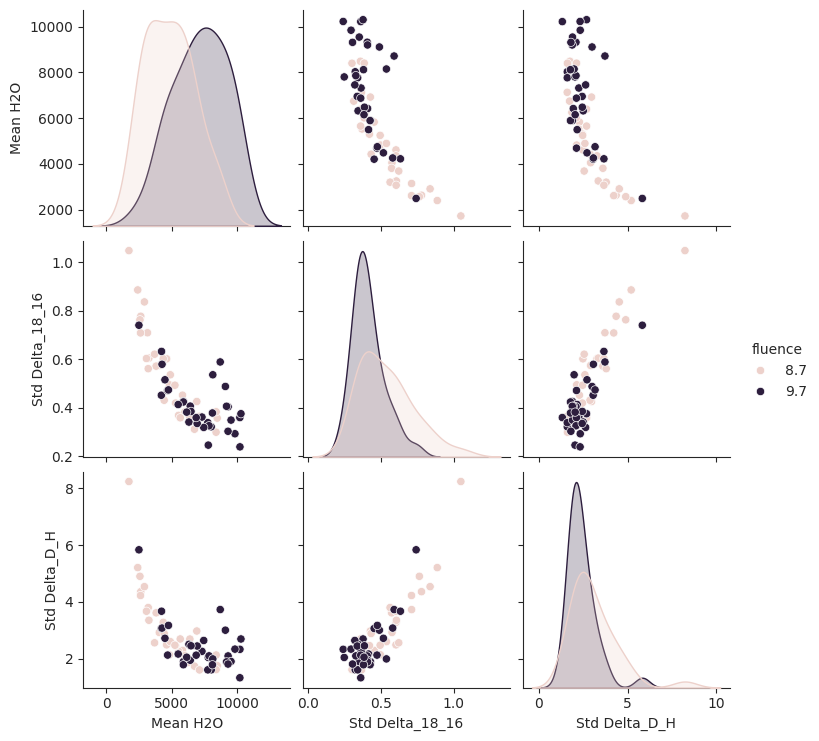

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, pearsonr, spearmanr
df=combined_df.copy()
# Group data by fluence
groups = df.groupby('fluence')

# Analyze each group
results = []
for name, group in groups:
    # Check normality
    h2o_norm = shapiro(group['Mean H2O'])
    deltaO_norm = shapiro(group['Std Delta_18_16'])
    deltaD_norm = shapiro(group['Std Delta_D_H'])

    # Detect outliers
    for col in ['Mean H2O', 'Std Delta_18_16', 'Std Delta_D_H']:
        Q1 = group[col].quantile(0.25)
        Q3 = group[col].quantile(0.75)
        IQR = Q3 - Q1
        group = group[(group[col] >= (Q1 - 1.5 * IQR)) & (group[col] <= (Q3 + 1.5 * IQR))]

    # Calculate correlations
    if h2o_norm.pvalue > 0.05 and deltaO_norm.pvalue > 0.05:
        corr_deltaO = pearsonr(group['Mean H2O'], group['Std Delta_18_16'])
    else:
        corr_deltaO = spearmanr(group['Mean H2O'], group['Std Delta_18_16'])

    if h2o_norm.pvalue > 0.05 and deltaD_norm.pvalue > 0.05:
        corr_deltaD = pearsonr(group['Mean H2O'], group['Std Delta_D_H'])
    else:
        corr_deltaD = spearmanr(group['Mean H2O'], group['Std Delta_D_H'])

    results.append((name, corr_deltaO, corr_deltaD, h2o_norm, deltaO_norm, deltaD_norm))

# Print results
for result in results:
    print(f"Fluence: {result[0]}")
    print(f"Pearson/Spearman correlation (H2O vs Std Delta_18_16): {result[1]}")
    print(f"Pearson/Spearman correlation (H2O vs Std Delta_D_H): {result[2]}")
    print(f"Shapiro Test H2O: {result[3]}")
    print(f"Shapiro Test Std Delta_18_16: {result[4]}")
    print(f"Shapiro Test Std Delta_D_H: {result[5]}\n")

# Optionally, plot data
sns.pairplot(df, hue='fluence', vars=['Mean H2O', 'Std Delta_18_16', 'Std Delta_D_H'])
plt.show()

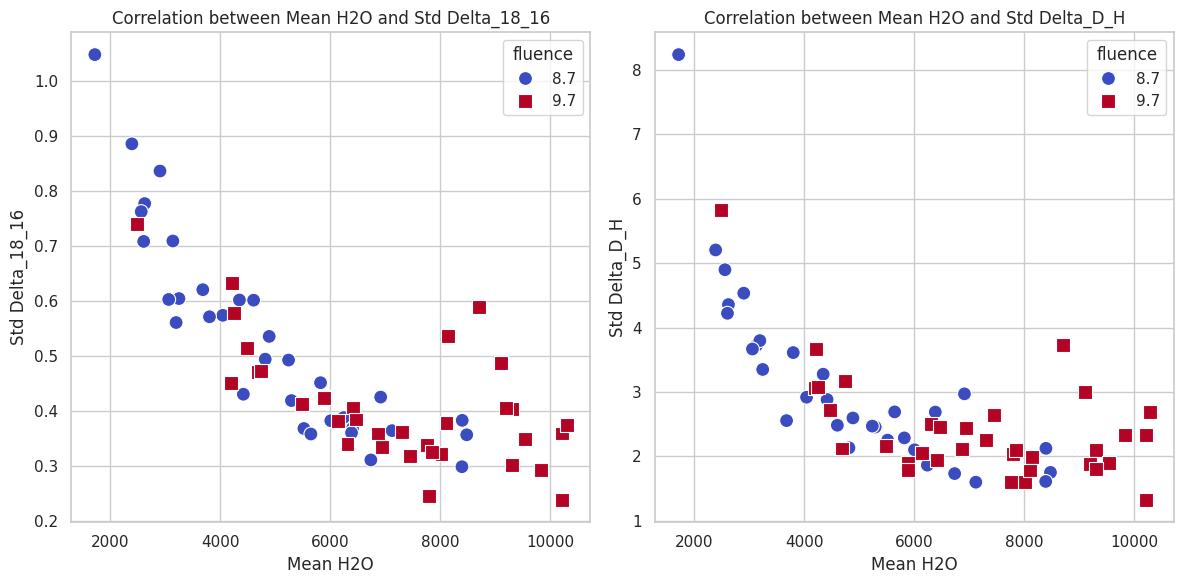

In [ ]:
df=combined_df.copy()
# Create a grid of plots with seaborn
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot first subplot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Mean H2O', y='Std Delta_18_16', hue='fluence', style='fluence', palette='coolwarm', markers=['o', 's'], s=100)
plt.title('Correlation between Mean H2O and Std Delta_18_16')
plt.xlabel('Mean H2O')
plt.ylabel('Std Delta_18_16')

# Plot second subplot
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Mean H2O', y='Std Delta_D_H', hue='fluence', style='fluence', palette='coolwarm', markers=['o', 's'], s=100)
plt.title('Correlation between Mean H2O and Std Delta_D_H')
plt.xlabel('Mean H2O')
plt.ylabel('Std Delta_D_H')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

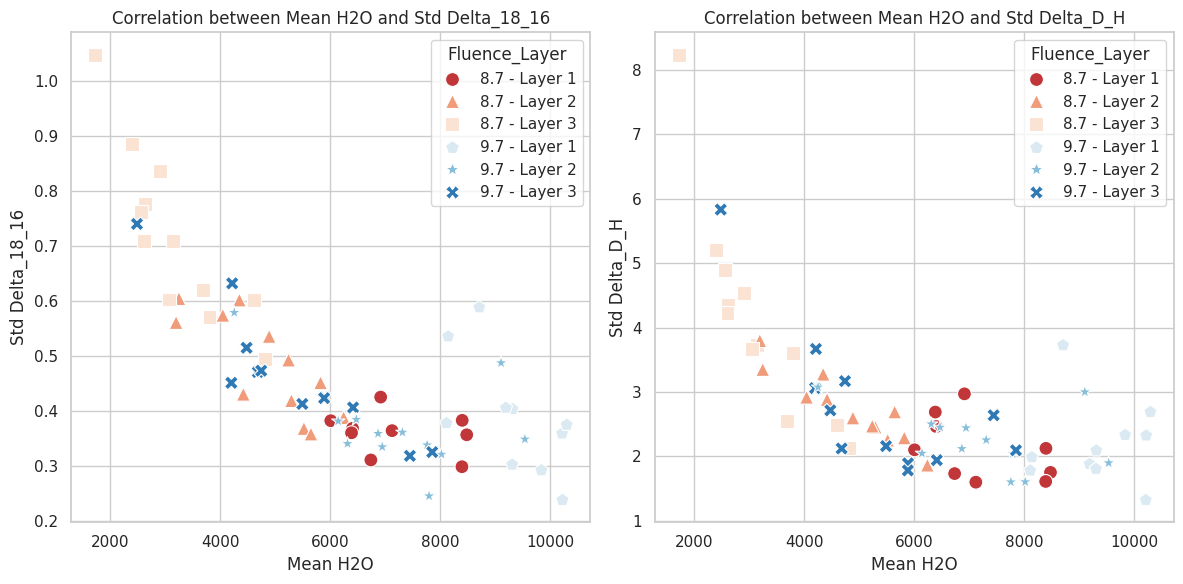

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data loading step (replace with your actual DataFrame loading step)
# df = pd.read_csv('path_to_your_data.csv')

# Extract layer from the last character of the 'ID' column
df['Layer'] = df['ID'].str[-1]

# Create a new column that combines fluence and layer
df['Fluence_Layer'] = df['fluence'].astype(str) + ' - Layer ' + df['Layer']

# Create a grid of plots with seaborn
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot first subplot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Mean H2O', y='Std Delta_18_16', hue='Fluence_Layer', style='Fluence_Layer',
                palette='RdBu', markers=['o', '^', 's', 'p', '*', 'X'], s=100)
plt.title('Correlation between Mean H2O and Std Delta_18_16')
plt.xlabel('Mean H2O')
plt.ylabel('Std Delta_18_16')

# Plot second subplot
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Mean H2O', y='Std Delta_D_H', hue='Fluence_Layer', style='Fluence_Layer',
                palette='RdBu', markers=['o', '^', 's', 'p', '*', 'X'], s=100)
plt.title('Correlation between Mean H2O and Std Delta_D_H')
plt.xlabel('Mean H2O')
plt.ylabel('Std Delta_D_H')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


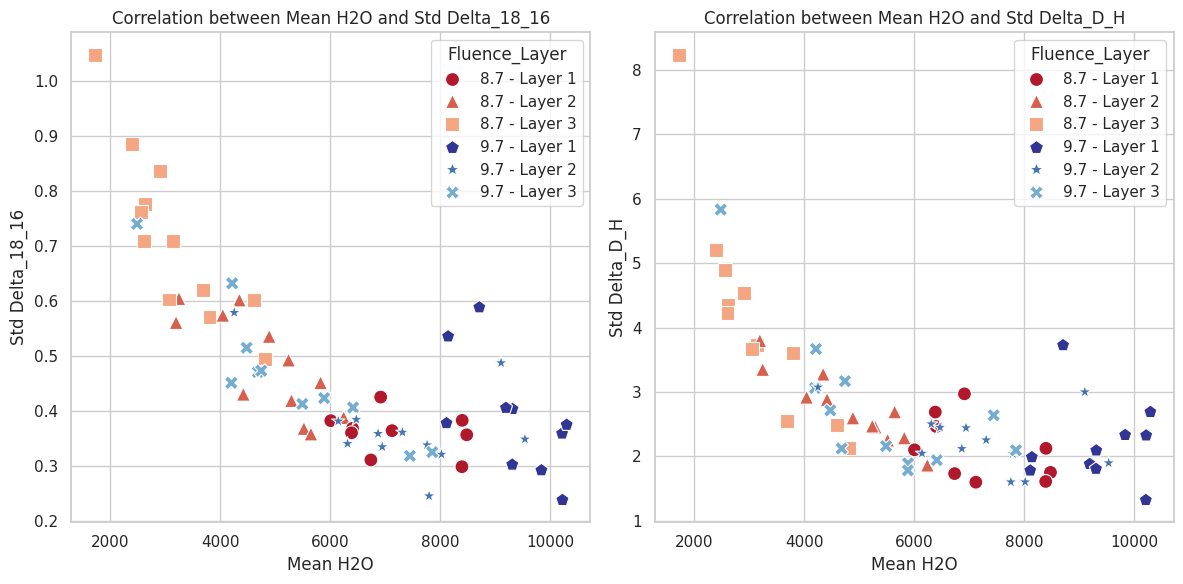

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom palette definition
# Assuming '8.7' is a lower fluence and '9.7' is a higher fluence
colors = {
    '8.7 - Layer 1': '#d73027',  # Deep red
    '8.7 - Layer 2': '#fc8d59',  # Lighter red
    '8.7 - Layer 3': '#fee08b',  # Lightest red
    '9.7 - Layer 1': '#4575b4',  # Deep blue
    '9.7 - Layer 2': '#91bfdb',  # Lighter blue
    '9.7 - Layer 3': '#e0f3f8'   # Lightest blue
}


colors = {
    '8.7 - Layer 1': '#d73027',  # Deep red
    '8.7 - Layer 2': '#fc8d59',  # Lighter red
    '8.7 - Layer 3': '#fee08b',  # Lightest red
    '9.7 - Layer 1': '#313695',  # Deep blue
    '9.7 - Layer 2': '#4575b4',  # Medium blue
    '9.7 - Layer 3': '#74add1'   # Lighter blue
}


colors = {
    '8.7 - Layer 1': '#b2182b',  # Deep red
    '8.7 - Layer 2': '#d6604d',  # Medium red
    '8.7 - Layer 3': '#f4a582',  # Light red
    '9.7 - Layer 1': '#313695',  # Deep blue
    '9.7 - Layer 2': '#4575b4',  # Medium blue
    '9.7 - Layer 3': '#74add1'   # Light blue
}

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot for Std Delta_18_16
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Mean H2O', y='Std Delta_18_16', hue='Fluence_Layer', style='Fluence_Layer',
                palette=colors, markers=['o', '^', 's', 'p', '*', 'X'], s=100)
plt.title('Correlation between Mean H2O and Std Delta_18_16')
plt.xlabel('Mean H2O')
plt.ylabel('Std Delta_18_16')

# Plot for Std Delta_D_H
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Mean H2O', y='Std Delta_D_H', hue='Fluence_Layer', style='Fluence_Layer',
                palette=colors, markers=['o', '^', 's', 'p', '*', 'X'], s=100)
plt.title('Correlation between Mean H2O and Std Delta_D_H')
plt.xlabel('Mean H2O')
plt.ylabel('Std Delta_D_H')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


results_df1=results_df8_r.copy()
results_df2=results_df9_r.copy()
results_df1['fluence'] = 8.7
results_df2['fluence'] = 9.7


combined_df = pd.concat([results_df1, results_df2], ignore_index=False)

combined_df

# Reds for Std Delta_D_H
layer_colors_reds = {
    'Layer 1': '#d73027',  # Dark Red
    'Layer 2': '#fc4e2a',  # Medium Red
    'Layer 3': '#fd8d3c',  # Light Red
}

# Blues for Std Delta_18_16
layer_colors_blues = {
    'Layer 1': '#4575b4',  # Dark Blue
    'Layer 2': '#74add1',  # Medium Blue
    'Layer 3': '#abd9e9',  # Light Blue
}

# Using seaborn's style
sns.set_style("ticks")


tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "sans-serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "font.size": 14
}

plt.rcParams.update(tex_fonts)

df=combined_df.copy()

# Create a new column 'Layer' by extracting the last character from the 'ID'
df['Layer'] = df['ID'].apply(lambda x: 'Layer ' + x.split()[-1])

sns.set_style("ticks")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7), sharex='col', sharey='row')
fig.subplots_adjust(hspace=1, wspace=1)

# Plot 1: Fluence 8.7 with Std Delta_18_16
sns.scatterplot(data=df[df['fluence'] == 8.7], x='Mean H2O', y='Std Delta_18_16', hue='Layer', palette=layer_colors_blues, style='Layer', markers=['o', 's', 'D'], s=100, ax=axes[0, 0])
axes[0, 0].set_title(u'Fluence: 8.7 J/cm$^{2}$')
axes[0,0].set_ylabel(u'Std $\delta^{18}$O [‰]', color='#4575b4')
axes[0,0].tick_params(axis='y', labelcolor='#4575b4')
axes[0,0].tick_params(axis='both', which='major', direction='in', length=6, right=False, top=True, bottom=False)
axes[0,0].tick_params(axis='both', which='minor', direction='in', length=3, right=False, top=True, bottom=False)
axes[0,0].minorticks_on()
axes[0,0].grid(which='major', color='#DDDDDD', linewidth=1)
axes[0,0].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)
for spine in [ 'right', 'bottom']:
  axes[0,0].spines[spine].set_visible(False)



# axes[0, 0].set_title(u'Fluence: 8.7 J/cm$^{2}$')
# axes[0, 0].set_xlabel('Mean H2O')
# axes[0, 0].set_ylabel('Std Delta_18_16')
axes[0, 0].legend().remove()  # Optional: Remove legend from this plot
axes[0, 0].set_xlim(1000, 11000)

# Plot 2: Fluence 8.7 with Std Delta_D_H
sns.scatterplot(data=df[df['fluence'] == 8.7], x='Mean H2O', y='Std Delta_D_H', hue='Layer', palette=layer_colors_reds, style='Layer', markers=['o', 's', 'D'], s=100, ax=axes[1, 0])
axes[1, 0].set_title('')
axes[1, 0].set_xlabel(u'[H$_{2}$O][ppm]')
axes[1,0].set_ylabel(u'Std $\delta$D [‰]', color='#d73027')
axes[1,0].tick_params(axis='y', labelcolor='#d73027')
axes[1,0].tick_params(axis='both', which='major', direction='in', length=6, right=False, top=False, bottom=True)
axes[1,0].tick_params(axis='both', which='minor', direction='in', length=3, right=False, top=False, bottom=True)
axes[1,0].minorticks_on()
axes[1,0].grid(which='major', color='#DDDDDD', linewidth=1)
axes[1,0].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)
for spine in ['top', 'right']:
  axes[1,0].spines[spine].set_visible(False)
axes[1, 0].set_xlim(1000, 11000)
axes[1, 0].legend().remove()

# Plot 3: Fluence 9.7 with Std Delta_18_16
sns.scatterplot(data=df[df['fluence'] == 9.7], x='Mean H2O', y='Std Delta_18_16', hue='Layer', palette=layer_colors_blues, style='Layer', markers=['o', 's', 'D'], s=100, ax=axes[0, 1])
axes[0, 1].set_title(u'Fluence: 9.7 J/cm$^{2}$')
axes[0, 1].set_xlabel(u'[H$_{2}$O][ppm]')
axes[0,1].set_ylabel(u'Std $\delta^{18}$O [‰]', color='#4575b4')
axes[0,1].tick_params(axis='y', labelcolor='#4575b4')
axes[0,1].tick_params(axis='both', which='major', direction='in', length=6, left=False,right=True, top=True, bottom=False)
axes[0,1].tick_params(axis='both', which='minor', direction='in', length=3, left=False,right=True, top=True, bottom=False)
axes[0,1].minorticks_on()
axes[0,1].grid(which='major', color='#DDDDDD', linewidth=1)
axes[0,1].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)
for spine in ['left', 'bottom']:
  axes[0,1].spines[spine].set_visible(False)
axes[0, 1].legend(title=None)

axes[0, 1].set_xlim(1000, 11000)

# Plot 4: Fluence 9.7 with Std Delta_D_H
sns.scatterplot(data=df[df['fluence'] == 9.7], x='Mean H2O', y='Std Delta_D_H', hue='Layer', palette=layer_colors_reds, style='Layer', markers=['o', 's', 'D'], s=100, ax=axes[1, 1])
axes[1, 1].set_title('')
axes[1, 1].set_xlabel(u'[H$_{2}$O][ppm]')

axes[1,1].set_ylabel(u'Std $\delta$D [‰]', color='#d73027')
axes[1,1].tick_params(axis='y', labelcolor='#d73027')
axes[1,1].tick_params(axis='both', which='major', direction='in', length=6, left=False,right=True, top=False, bottom=True)
axes[1,1].tick_params(axis='both', which='minor', direction='in', length=3, left=False,right=True, top=False, bottom=True)
axes[1,1].minorticks_on()
axes[1,1].grid(which='major', color='#DDDDDD', linewidth=1)
axes[1,1].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)
for spine in ['top', 'left']:
  axes[1,1].spines[spine].set_visible(False)
axes[1, 1].set_xlim(1000, 11000)
axes[1, 1].legend(title=None)

plt.tight_layout()
plt.show()

fig.savefig('std_plot_standards.eps', format='eps', bbox_inches='tight')


NameError: name 'results_df8_r' is not defined

In [ ]:
results_df2

,ID,Mean H2O,Std H2O,Mean Delta_18_16,Std Delta_18_16,Mean Delta_D_H,Std Delta_D_H,Accuracy Delta_18_16,Z-Score Delta_18_16,Accuracy Delta_D_H,Z-Score Delta_D_H,fluence
0,TETRIST 1,5175,83.093756,-23.18,0.409534,-172.04,2.996977,1.84,-4.49,6.64,-2.22,9.7
1,TETRIST 2,5593,104.095122,-23.01,0.440482,-174.87,2.875953,1.67,-3.79,9.47,-3.29,9.7
2,TETRIST 3,4596,57.815889,-23.33,0.552145,-177.35,3.311717,1.99,-3.61,11.95,-3.61,9.7
3,TETRIST 4,4831,194.365828,-23.07,0.363437,-177.40,3.148198,1.73,-4.77,12.00,-3.81,9.7
4,TETRIST 5,5576,61.900798,-22.32,0.440689,-173.33,2.813825,0.98,-2.22,7.93,-2.82,9.7
5,TETRIST 6,6200,172.013936,-21.47,0.399643,-169.25,2.614204,0.13,-0.33,3.85,-1.47,9.7
6,TETRIST 7,5303,76.538856,-22.22,0.454179,-174.04,2.689140,0.88,-1.93,8.64,-3.21,9.7
7,TETRIST 8,4426,248.760692,-22.96,0.471032,-176.60,2.882920,1.62,-3.44,11.20,-3.89,9.7
8,TETRIST 9,5261,41.935288,-21.98,0.432643,-174.23,2.884521,0.64,-1.48,8.83,-3.06,9.7


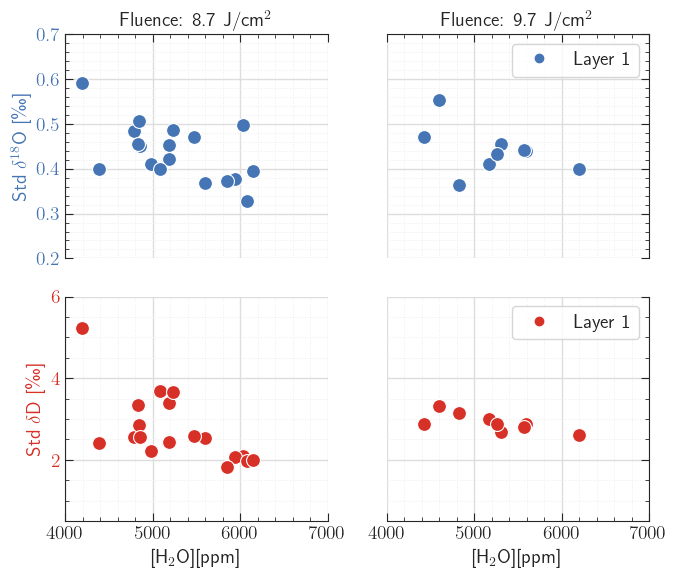

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df1=results_df8_i.copy()
results_df2=results_df9_i.copy()
results_df1['fluence'] = 8.7
results_df2['fluence'] = 9.7


combined_df = pd.concat([results_df1, results_df2], ignore_index=False)

combined_df
df=combined_df.copy()
# Using seaborn's style
sns.set_style("ticks")

# Setup LaTeX style text rendering
tex_fonts = {
    "text.usetex": True,
    "font.family": "sans-serif",
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "font.size": 14
}
plt.rcParams.update(tex_fonts)

df['Layer'] = 'Layer 1'  # Assign all data to Layer 1 for legend purposes


# Define single colors for each type of plot for simplicity
color_blue = '#4575b4'  # Blue for all Std Delta_18_16 plots
color_red = '#d73027'   # Red for all Std Delta_D_H plots

# Create figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 6), sharex='col', sharey='row')
fig.subplots_adjust(hspace=1, wspace=1)

# Define a custom legend handler
import matplotlib.lines as mlines
blue_dot = mlines.Line2D([], [], color=color_blue, marker='o', linestyle='None', markersize=6, label='Layer 1')
red_dot = mlines.Line2D([], [], color=color_red, marker='o', linestyle='None', markersize=6, label='Layer 1')


# Plot for Fluence 8.7 with Std Delta_18_16
sns.scatterplot(data=df[df['fluence'] == 8.7], x='Mean H2O', y='Std Delta_18_16', color=color_blue, marker='o', s=100, ax=axes[0, 0])
axes[0, 0].set_title('Fluence: 8.7 J/cm$^{2}$')
axes[0, 0].set_ylabel('Std $\delta^{18}$O [‰]', color=color_blue)
axes[0, 0].tick_params(axis='y', labelcolor=color_blue)
axes[0,0].tick_params(axis='both', which='major', direction='in', length=6, right=False, top=True, bottom=False)
axes[0,0].tick_params(axis='both', which='minor', direction='in', length=3, right=False, top=True, bottom=False)
axes[0,0].minorticks_on()
axes[0,0].grid(which='major', color='#DDDDDD', linewidth=1)
axes[0,0].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)
for spine in [ 'right', 'bottom']:
  axes[0,0].spines[spine].set_visible(False)
axes[0, 0].set_ylim(0.2,0.7)

# Plot for Fluence 8.7 with Std Delta_D_H
sns.scatterplot(data=df[df['fluence'] == 8.7], x='Mean H2O', y='Std Delta_D_H', color=color_red, marker='o', s=100, ax=axes[1, 0])
axes[1, 0].set_title('')
axes[1, 0].set_xlabel(u'[H$_{2}$O][ppm]')
axes[1,0].set_ylabel(u'Std $\delta$D [‰]', color=color_red)
axes[1,0].tick_params(axis='y', labelcolor=color_red)
axes[1,0].tick_params(axis='both', which='major', direction='in', length=6, right=False, top=False, bottom=True)
axes[1,0].tick_params(axis='both', which='minor', direction='in', length=3, right=False, top=False, bottom=True)
axes[1,0].minorticks_on()
axes[1,0].grid(which='major', color='#DDDDDD', linewidth=1)
axes[1,0].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)
for spine in ['top', 'right']:
  axes[1,0].spines[spine].set_visible(False)
axes[1, 0].set_ylim(0.5,6)
axes[1, 0].set_xlim(4000, 7000)
axes[1, 0].legend().remove()

# Plot for Fluence 9.7 with Std Delta_18_16
sns.scatterplot(data=df[df['fluence'] == 9.7], x='Mean H2O', y='Std Delta_18_16', color=color_blue, marker='o', s=100, ax=axes[0, 1])
axes[0, 1].set_title('Fluence: 9.7 J/cm$^{2}$')
axes[0, 1].set_xlabel('[H$_{2}$O][ppm]')
axes[0,1].tick_params(axis='both', which='major', direction='in', length=6, left=False,right=True, top=True, bottom=False)
axes[0,1].tick_params(axis='both', which='minor', direction='in', length=3, left=False,right=True, top=True, bottom=False)
axes[0,1].minorticks_on()
axes[0,1].grid(which='major', color='#DDDDDD', linewidth=1)
axes[0,1].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)
for spine in ['left', 'bottom']:
  axes[0,1].spines[spine].set_visible(False)
axes[0, 1].legend(handles=[blue_dot])


axes[0, 1].set_xlim(4000, 7000)

# Plot for Fluence 9.7 with Std Delta_D_H
sns.scatterplot(data=df[df['fluence'] == 9.7], x='Mean H2O', y='Std Delta_D_H', color=color_red, marker='o', s=100, ax=axes[1, 1])
axes[1, 1].set_xlabel('[H$_{2}$O][ppm]')
axes[1,1].tick_params(axis='both', which='major', direction='in', length=6, left=False,right=True, top=False, bottom=True)
axes[1,1].tick_params(axis='both', which='minor', direction='in', length=3, left=False,right=True, top=False, bottom=True)
axes[1,1].minorticks_on()
axes[1,1].grid(which='major', color='#DDDDDD', linewidth=1)
axes[1,1].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)
for spine in ['top', 'left']:
  axes[1,1].spines[spine].set_visible(False)

axes[1, 1].set_ylim(0.5,6)
axes[1, 1].set_xlim(4000, 7000)
axes[1, 1].legend(handles=[red_dot])


plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('std_plot_ice.eps', format='eps', bbox_inches='tight')


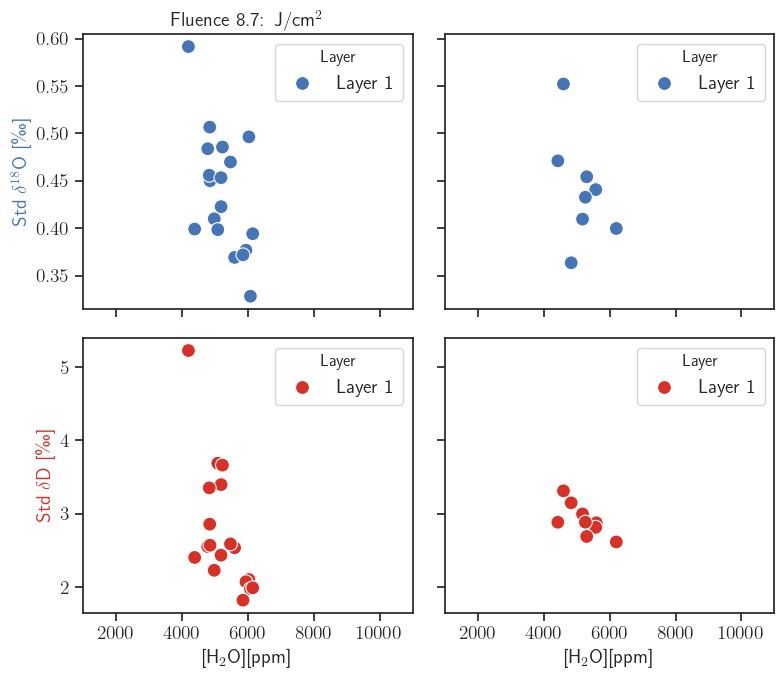

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reds for Std Delta_D_H
layer_colors_reds = {
    'Layer 1': '#d73027',  # Dark Red
    'Layer 2': '#fc4e2a',  # Medium Red
    'Layer 3': '#fd8d3c',  # Light Red
}

# Blues for Std Delta_18_16
layer_colors_blues = {
    'Layer 1': '#4575b4',  # Dark Blue
    'Layer 2': '#74add1',  # Medium Blue
    'Layer 3': '#abd9e9',  # Light Blue
}

# Using seaborn's style
sns.set_style("ticks")

# Setup LaTeX style text rendering
tex_fonts = {
    "text.usetex": True,
    "font.family": "sans-serif",
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "font.size": 14
}
plt.rcParams.update(tex_fonts)

df = combined_df.copy()
df['Layer'] = 'Layer 1'  # Assign all data to Layer 1 for legend purposes

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7), sharex='col', sharey='row')
fig.subplots_adjust(hspace=1, wspace=1)

# Define the specific settings for the plot
plot_settings = {
    'x': 'Mean H2O',
    'y': 'Std Delta_18_16',
    'hue': 'Layer',
    'palette': [layer_colors_blues['Layer 1']],
    'marker': 'o',
    's': 100
}

# Plot 1: Fluence 8.7 with Std Delta_18_16
sns.scatterplot(data=df[df['fluence'] == 8.7], ax=axes[0, 0], **plot_settings)
axes[0, 0].set_title('Fluence 8.7: J/cm$^{2}$')
axes[0, 0].set_ylabel('Std $\delta^{18}$O [‰]', color='#4575b4')
axes[0, 0].set_xlim(1000, 11000)
axes[0, 0].legend(title='Layer')

# Modify the settings for Delta_D_H
plot_settings['y'] = 'Std Delta_D_H'
plot_settings['palette'] = [layer_colors_reds['Layer 1']]

# Plot 2: Fluence 8.7 with Std Delta_D_H
sns.scatterplot(data=df[df['fluence'] == 8.7], ax=axes[1, 0], **plot_settings)
axes[1, 0].set_xlabel('[H$_{2}$O][ppm]')
axes[1, 0].set_ylabel('Std $\delta$D [‰]', color='#d73027')
axes[1, 0].set_xlim(1000, 11000)
axes[1, 0].legend(title='Layer')

# Adjust settings back for Std Delta_18_16
plot_settings['y'] = 'Std Delta_18_16'
plot_settings['palette'] = [layer_colors_blues['Layer 1']]

# Repeat for Fluence 9.7
# Plot 3: Fluence 9.7 with Std Delta_18_16
sns.scatterplot(data=df[df['fluence'] == 9.7], ax=axes[0, 1], **plot_settings)
axes[0, 1].set_xlabel('[H$_{2}$O][ppm]')
axes[0, 1].set_xlim(1000, 11000)
axes[0, 1].legend(title='Layer')

# Adjust settings for Std Delta_D_H
plot_settings['y'] = 'Std Delta_D_H'
plot_settings['palette'] = [layer_colors_reds['Layer 1']]

# Plot 4: Fluence 9.7 with Std Delta_D_H
sns.scatterplot(data=df[df['fluence'] == 9.7], ax=axes[1, 1], **plot_settings)
axes[1, 1].set_xlabel('[H$_{2}$O][ppm]')
axes[1, 1].set_xlim(1000, 11000)
axes[1, 1].legend(title='Layer')

plt.tight_layout()
plt.show()

# Save the figure if necessary
fig.savefig('std_plot_ice.eps', format='eps', bbox_inches='tight')


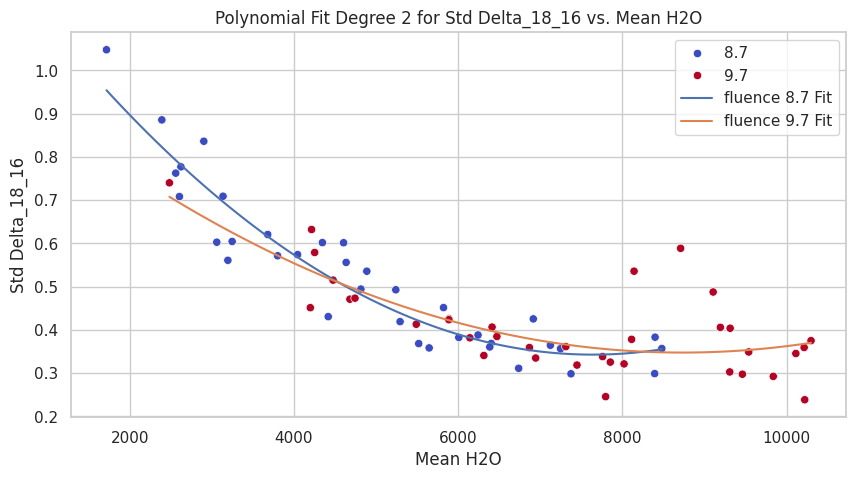

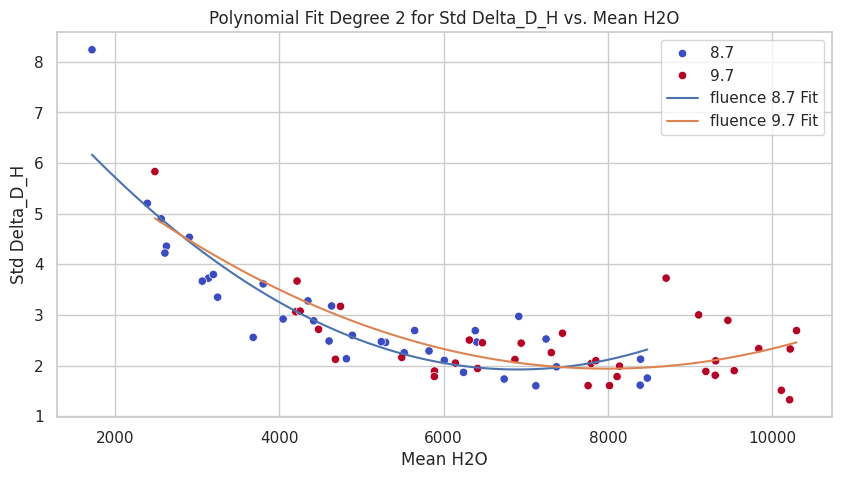

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming df is your DataFrame

# Function to apply polynomial regression and plot
def poly_fit_and_plot(df, x, y, degree, hue, palette):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, palette=palette)

    for fluence in df[hue].unique():
        sub_df = df[df[hue] == fluence]
        # Polynomial features
        X = np.column_stack([sub_df[x]**i for i in range(1, degree + 1)])
        X = sm.add_constant(X)  # adding a constant for the intercept
        model = sm.OLS(sub_df[y], X).fit()

        # Predict for plotting
        x_fit = np.linspace(sub_df[x].min(), sub_df[x].max(), 100)
        X_fit = np.column_stack([x_fit**i for i in range(1, degree + 1)])
        X_fit = sm.add_constant(X_fit)
        y_fit = model.predict(X_fit)

        plt.plot(x_fit, y_fit, label=f'fluence {fluence} Fit')

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Polynomial Fit Degree {degree} for {y} vs. {x}')
    plt.legend()
    plt.show()

# Example usage
poly_fit_and_plot(df, 'Mean H2O', 'Std Delta_18_16', 2, 'fluence', 'coolwarm')
poly_fit_and_plot(df, 'Mean H2O', 'Std Delta_D_H', 2, 'fluence', 'coolwarm')


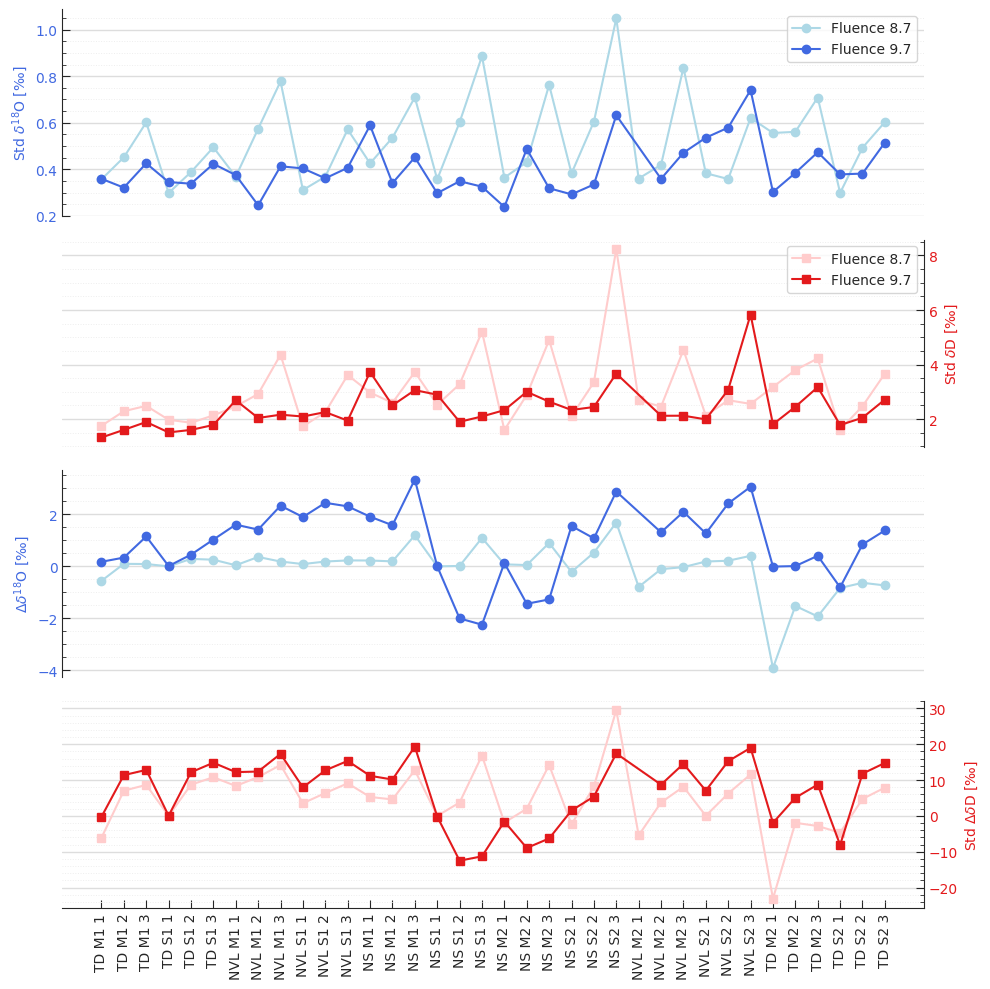

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'combined_df' is already loaded and properly formatted
# Create a single column layout with four rows
fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

# Iterate over each fluence group and plot
fluences = combined_df['fluence'].unique()
colors = ['blue', 'red']  # Different colors for each fluence
marker_styles = ['o', 's']  # Different markers for each fluence
colors = {8.7: ('#add8e6', '#ffcccc'), 9.7: ('royalblue', '#e31a1c')}  # Pale blue for 8.7, blue for 9.7; Pale red for 8.7, red for 9.7

for i, fluence in enumerate(fluences):
    df_fluence = combined_df[combined_df['fluence'] == fluence]
    color_18o, color_dh = colors[fluence]

    # Standard Deviation Delta 18O
    axs[0].plot(df_fluence['ID'], df_fluence['Std Delta_18_16'], color=color_18o, marker='o', linestyle='-', label=f'Fluence {fluence}')
    axs[0].set_ylabel(u'Std $\delta^{18}$O [‰]', color='royalblue')
    axs[0].tick_params(axis='y', labelcolor='royalblue')
    axs[0].tick_params(axis='both', which='major', direction='in', length=6, right=False, top=False, bottom=False)
    axs[0].tick_params(axis='both', which='minor', direction='in', length=3, right=False, top=False, bottom=False)
    axs[0].minorticks_on()
    axs[0].grid(which='major', color='#DDDDDD', linewidth=1)
    axs[0].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)
    for spine in ['top', 'right', 'bottom']:
        axs[0].spines[spine].set_visible(False)

    # Standard Deviation Delta D
    axs[1].plot(df_fluence['ID'], df_fluence['Std Delta_D_H'], color=color_dh, marker='s', linestyle='-', label=f'Fluence {fluence}')
    axs[1].set_ylabel(u'Std $\delta$D [‰]', color='#e31a1c')
    axs[1].tick_params(axis='y', labelcolor='#e31a1c')
    axs[1].tick_params(axis='both', which='major', direction='in', length=6, right=False, top=False, bottom=False)
    axs[1].tick_params(axis='both', which='minor', direction='in', length=3, right=False, top=False, bottom=False)
    axs[1].minorticks_on()
    axs[1].grid(which='major', color='#DDDDDD', linewidth=1)
    axs[1].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)
    for spine in ['top', 'left', 'bottom']:
        axs[1].spines[spine].set_visible(False)

    # Accuracy Delta 18O
    axs[2].plot(df_fluence['ID'], df_fluence['Accuracy Delta_18_16'], color=color_18o, marker='o', linestyle='-', label=f'Fluence {fluence}')
    axs[2].set_ylabel(u'$\Delta\delta^{18}$O [‰]', color='royalblue')
    axs[2].tick_params(axis='y', labelcolor='royalblue')
    axs[2].tick_params(axis='both', which='major', direction='in', length=6, right=False, top=False, bottom=False)
    axs[2].tick_params(axis='both', which='minor', direction='in', length=3, right=False, top=False, bottom=False)
    axs[2].minorticks_on()
    axs[2].grid(which='major', color='#DDDDDD', linewidth=1)
    axs[2].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)

    for spine in ['top', 'right', 'bottom']:
        axs[2].spines[spine].set_visible(False)

    # Accuracy Delta D
    axs[3].plot(df_fluence['ID'], df_fluence['Accuracy Delta_D_H'], color=color_dh, marker='s', linestyle='-', label=f'Fluence {fluence}')
    axs[3].set_ylabel(u'Std $\Delta\delta$D [‰]', color='#e31a1c')
    axs[3].tick_params(axis='y', labelcolor='#e31a1c')
    axs[3].tick_params(axis='both', which='major', direction='in', length=6, right=False, top=False, bottom=True)
    axs[3].tick_params(axis='both', which='minor', direction='in', length=3, right=False, top=False, bottom=False)
    axs[3].minorticks_on()
    axs[3].grid(which='major', color='#DDDDDD', linewidth=1)
    axs[3].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.7)
    axs[3].grid(which='both', axis='x', linestyle='')
    for spine in ['top', 'left']:
        axs[3].spines[spine].set_visible(False)


axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[3].yaxis.set_label_position("right")
axs[3].yaxis.tick_right()

# Remove x-axis from the first plot
axs[0].set_xticks([])  # Remove x-axis ticks
axs[0].set_xticklabels([])  # Remove x-axis tick labels
axs[0].xaxis.set_visible(False)  # Hide the x-axis completely
axs[1].set_xticks([])  # Remove x-axis ticks
axs[1].set_xticklabels([])  # Remove x-axis tick labels
axs[1].xaxis.set_visible(False)  # Hide the x-axis completely
axs[2].set_xticks([])  # Remove x-axis ticks
axs[2].set_xticklabels([])  # Remove x-axis tick labels
axs[2].xaxis.set_visible(False)  # Hide the x-axis completely



# Setting x-axis labels for the bottom graph only
axs[3].set_xticks(range(len(combined_df['ID'].unique())))
axs[3].set_xticklabels(combined_df['ID'].unique(), rotation=90)

# Add legends to the first two plots only
for ax in axs[:2]:
    ax.legend(loc='best')

# Adjust layout to ensure all elements fit and are not overlapping
fig.tight_layout()
plt.show()
fig.savefig('results.eps', format='eps', bbox_inches='tight')


In [ ]:
import pandas as pd

def calculate_overall_metrics(results_df):
    # Calculate the mean of the standard deviations for each isotope (precision measure)
    precision_d18 = results_df['Std Delta_18_16'].mean()
    precision_dD = results_df['Std Delta_D_H'].mean()

    # Calculate the mean of the accuracies for each isotope (accuracy measure)
    accuracy_d18 = results_df['Accuracy Delta_18_16'].mean()
    accuracy_dD = results_df['Accuracy Delta_D_H'].mean()

    # Create a DataFrame to display these results
    metrics_df = pd.DataFrame({
        'Isotope': ['Delta_18_16', 'Delta_D_H'],
        'Mean Precision (std dev)': [precision_d18, precision_dD],
        'Mean Accuracy': [accuracy_d18, accuracy_dD]
    })

    return metrics_df
true_values = {
    'TD': {'d18': -38.82, 'dD': -307.00},
    'NS': {'d18': -15.36, 'dD': -112.62},
    'NVL': {'d18': -31.15, 'dD': -240.02}
}
# Assuming results_df is the DataFrame containing the analysis results
results_df8 = analyze_intervals(df8_processed, df8_seconds, true_values)
results_df9 = analyze_intervals(df9_processed, df9_seconds, true_values)

# Calculate the metrics for both DataFrames
metrics_df8 = calculate_overall_metrics(results_ice_df8)
metrics_df9 = calculate_overall_metrics(results_ice_df9)

# Print the resulting DataFrames
print("Overall Metrics for df8:")
print(metrics_df8)
print("\nOverall Metrics for df9:")
print(metrics_df9)


NameError: name 'results_ice_df8' is not defined

In [ ]:


# Additionally, you might want to see these stats by group (TD, NS, NVL)
def group_precision_accuracy(results_df):
    # Group by the first two letters of ID to identify sample type
    grouped_stats = results_df.groupby(results_df['ID'].str[:2]).agg({
        'Mean Delta_18_16': ['mean', 'std'],
        'Mean Delta_D_H': ['mean', 'std'],
        'Accuracy Delta_18_16': 'mean',
        'Accuracy Delta_D_H': 'mean'
    })
    return grouped_stats

# Apply the function to your results DataFrame
grouped_stats = group_precision_accuracy(results_df9)
grouped_stats


Mean Delta_18_16           Mean Delta_D_H            Accuracy Delta_18_16  \
               mean       std           mean        std                 mean   
ID                                                                             
NS       -15.820102  1.893727    -114.648586  10.841626             0.460102   
NV       -33.166283  0.569371    -252.979240   3.837827             2.016283   
TD       -39.235734  0.610779    -313.786164   7.628174             0.415734   

   Accuracy Delta_D_H  
                 mean  
ID                     
NS           2.028586  
NV          12.959240  
TD           6.786164